In [43]:
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt

import lsst.pipe.base as pipeBase
from lsst.afw.image.utils import getDistortedWcs

import lsst.afw.math as afwMath

import numpy as np
import lsst.daf.persistence as dafPersist

%matplotlib inline

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"

butler = dafPersist.Butler(DATADIR+"calexp_t") 

In [4]:
test_dataId = {"visit":784518,"filter":'r', "ccd":14}
calexp_test = butler.get("calexp", dataId=test_dataId)

In [7]:
psf = calexp_test.getPsf()
shape = psf.computeShape()

print shape

(ixx=2.39599266349, iyy=2.60446722989, ixy=-0.0519026029322)


In [16]:
shape.getDeterminantRadius()
shape.getIxx()

2.3959926634871778

In [26]:
import pickle

psfs = pickle.load( open( "/datadec/cppm/jpreyes/CFHT_Production/psfs.p", "rb" ) )


In [27]:
total_psfs = []
for key in psfs.keys():
    for subkey in psfs[key].keys():
        total_psfs.append(psfs[key][subkey])

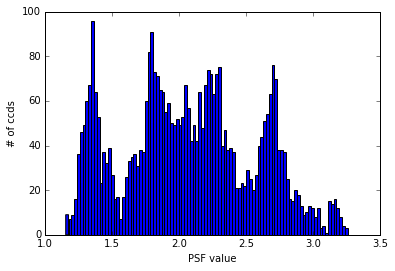

In [44]:
plt.hist(total_psfs, bins=100)
plt.xlabel("PSF value")
plt.ylabel("# of ccds")
plt.show()

In [34]:
np.mean(total_psfs)

2.0701335686284597

In [29]:
skmap = pickle.load( open("/datadec/cppm/jpreyes/CFHT_Production/detect_prod/deepCoadd/skyMap.pickle","r"))

In [31]:
patch_dict = {}
for visit in psfs.keys():
    for ccd in psfs[visit].keys():
        calexp =butler.get("calexp", dataId={"visit":visit, "ccd":ccd, "filter":"r"})
        wcs = calexp.getWcs()
        coord1 = wcs.pixelToSky(0,0)
        coord2 = wcs.pixelToSky(2048,4612)
        info = skmap.findTractPatchList([coord1, coord2])
        tract_info = info[0]
        patch_info = tract_info[1]
        
        for patch in patch_info:
            patch_index =  patch.getIndex()
            print patch_index, visit, ccd
            
            if patch_index not in patch_dict.keys():
                patch_dict.update({patch_index:{visit:{ccd:psfs[visit][ccd]}}})
            elif visit not in patch_dict[patch_index].keys():
                patch_dict[patch_index].update({visit:{ccd:psfs[visit][ccd]}})
            elif ccd not in patch_dict[patch_index][visit].keys():
                patch_dict[patch_index][visit].update({ccd:psfs[visit][ccd]})
                
                                                       
                
                                                       

(5, 19) 982187 0
(5, 20) 982187 0
(5, 21) 982187 0
(5, 22) 982187 0
(5, 23) 982187 0
(5, 24) 982187 0
(6, 19) 982187 0
(6, 20) 982187 0
(6, 21) 982187 0
(6, 22) 982187 0
(6, 23) 982187 0
(6, 24) 982187 0
(7, 19) 982187 0
(7, 20) 982187 0
(7, 21) 982187 0
(7, 22) 982187 0
(7, 23) 982187 0
(7, 24) 982187 0
(7, 19) 982187 1
(7, 20) 982187 1
(7, 21) 982187 1
(7, 22) 982187 1
(7, 23) 982187 1
(7, 24) 982187 1
(8, 19) 982187 1
(8, 20) 982187 1
(8, 21) 982187 1
(8, 22) 982187 1
(8, 23) 982187 1
(8, 24) 982187 1
(9, 19) 982187 1
(9, 20) 982187 1
(9, 21) 982187 1
(9, 22) 982187 1
(9, 23) 982187 1
(9, 24) 982187 1
(9, 19) 982187 2
(9, 20) 982187 2
(9, 21) 982187 2
(9, 22) 982187 2
(9, 23) 982187 2
(9, 24) 982187 2
(10, 19) 982187 2
(10, 20) 982187 2
(10, 21) 982187 2
(10, 22) 982187 2
(10, 23) 982187 2
(10, 24) 982187 2
(11, 19) 982187 2
(11, 20) 982187 2
(11, 21) 982187 2
(11, 22) 982187 2
(11, 23) 982187 2
(11, 24) 982187 2
(11, 19) 982187 3
(11, 20) 982187 3
(11, 21) 982187 3
(11, 22) 982187 

(18, 10) 982187 24
(18, 11) 982187 24
(18, 12) 982187 24
(18, 13) 982187 24
(18, 14) 982187 24
(18, 15) 982187 24
(19, 10) 982187 24
(19, 11) 982187 24
(19, 12) 982187 24
(19, 13) 982187 24
(19, 14) 982187 24
(19, 15) 982187 24
(20, 10) 982187 24
(20, 11) 982187 24
(20, 12) 982187 24
(20, 13) 982187 24
(20, 14) 982187 24
(20, 15) 982187 24
(20, 10) 982187 25
(20, 11) 982187 25
(20, 12) 982187 25
(20, 13) 982187 25
(20, 14) 982187 25
(20, 15) 982187 25
(21, 10) 982187 25
(21, 11) 982187 25
(21, 12) 982187 25
(21, 13) 982187 25
(21, 14) 982187 25
(21, 15) 982187 25
(22, 10) 982187 25
(22, 11) 982187 25
(22, 12) 982187 25
(22, 13) 982187 25
(22, 14) 982187 25
(22, 15) 982187 25
(22, 10) 982187 26
(22, 11) 982187 26
(22, 12) 982187 26
(22, 13) 982187 26
(22, 14) 982187 26
(22, 15) 982187 26
(23, 10) 982187 26
(23, 11) 982187 26
(23, 12) 982187 26
(23, 13) 982187 26
(23, 14) 982187 26
(23, 15) 982187 26
(24, 10) 982187 26
(24, 11) 982187 26
(24, 12) 982187 26
(24, 13) 982187 26
(24, 14) 982

(16, 17) 967852 14
(16, 18) 967852 14
(16, 19) 967852 14
(16, 20) 967852 14
(17, 15) 967852 14
(17, 16) 967852 14
(17, 17) 967852 14
(17, 18) 967852 14
(17, 19) 967852 14
(17, 20) 967852 14
(18, 15) 967852 14
(18, 16) 967852 14
(18, 17) 967852 14
(18, 18) 967852 14
(18, 19) 967852 14
(18, 20) 967852 14
(18, 15) 967852 15
(18, 16) 967852 15
(18, 17) 967852 15
(18, 18) 967852 15
(18, 19) 967852 15
(18, 20) 967852 15
(19, 15) 967852 15
(19, 16) 967852 15
(19, 17) 967852 15
(19, 18) 967852 15
(19, 19) 967852 15
(19, 20) 967852 15
(20, 15) 967852 15
(20, 16) 967852 15
(20, 17) 967852 15
(20, 18) 967852 15
(20, 19) 967852 15
(20, 20) 967852 15
(20, 15) 967852 16
(20, 16) 967852 16
(20, 17) 967852 16
(20, 18) 967852 16
(20, 19) 967852 16
(20, 20) 967852 16
(21, 15) 967852 16
(21, 16) 967852 16
(21, 17) 967852 16
(21, 18) 967852 16
(21, 19) 967852 16
(21, 20) 967852 16
(22, 15) 967852 16
(22, 16) 967852 16
(22, 17) 967852 16
(22, 18) 967852 16
(22, 19) 967852 16
(22, 20) 967852 16
(22, 15) 967

(23, 20) 973326 8
(23, 21) 973326 8
(23, 22) 973326 8
(23, 23) 973326 8
(23, 24) 973326 8
(23, 25) 973326 8
(24, 20) 973326 8
(24, 21) 973326 8
(24, 22) 973326 8
(24, 23) 973326 8
(24, 24) 973326 8
(24, 25) 973326 8
(5, 15) 973326 9
(5, 16) 973326 9
(5, 17) 973326 9
(5, 18) 973326 9
(5, 19) 973326 9
(5, 20) 973326 9
(6, 15) 973326 9
(6, 16) 973326 9
(6, 17) 973326 9
(6, 18) 973326 9
(6, 19) 973326 9
(6, 20) 973326 9
(7, 15) 973326 9
(7, 16) 973326 9
(7, 17) 973326 9
(7, 18) 973326 9
(7, 19) 973326 9
(7, 20) 973326 9
(7, 15) 973326 10
(7, 16) 973326 10
(7, 17) 973326 10
(7, 18) 973326 10
(7, 19) 973326 10
(7, 20) 973326 10
(8, 15) 973326 10
(8, 16) 973326 10
(8, 17) 973326 10
(8, 18) 973326 10
(8, 19) 973326 10
(8, 20) 973326 10
(9, 15) 973326 10
(9, 16) 973326 10
(9, 17) 973326 10
(9, 18) 973326 10
(9, 19) 973326 10
(9, 20) 973326 10
(9, 15) 973326 11
(9, 16) 973326 11
(9, 17) 973326 11
(9, 18) 973326 11
(9, 19) 973326 11
(9, 20) 973326 11
(10, 15) 973326 11
(10, 16) 973326 11
(10, 17)

(6, 23) 973327 0
(6, 24) 973327 0
(6, 25) 973327 0
(7, 20) 973327 0
(7, 21) 973327 0
(7, 22) 973327 0
(7, 23) 973327 0
(7, 24) 973327 0
(7, 25) 973327 0
(7, 20) 973327 1
(7, 21) 973327 1
(7, 22) 973327 1
(7, 23) 973327 1
(7, 24) 973327 1
(7, 25) 973327 1
(8, 20) 973327 1
(8, 21) 973327 1
(8, 22) 973327 1
(8, 23) 973327 1
(8, 24) 973327 1
(8, 25) 973327 1
(9, 20) 973327 1
(9, 21) 973327 1
(9, 22) 973327 1
(9, 23) 973327 1
(9, 24) 973327 1
(9, 25) 973327 1
(9, 20) 973327 2
(9, 21) 973327 2
(9, 22) 973327 2
(9, 23) 973327 2
(9, 24) 973327 2
(9, 25) 973327 2
(10, 20) 973327 2
(10, 21) 973327 2
(10, 22) 973327 2
(10, 23) 973327 2
(10, 24) 973327 2
(10, 25) 973327 2
(11, 20) 973327 2
(11, 21) 973327 2
(11, 22) 973327 2
(11, 23) 973327 2
(11, 24) 973327 2
(11, 25) 973327 2
(12, 20) 973327 2
(12, 21) 973327 2
(12, 22) 973327 2
(12, 23) 973327 2
(12, 24) 973327 2
(12, 25) 973327 2
(11, 20) 973327 3
(11, 21) 973327 3
(11, 22) 973327 3
(11, 23) 973327 3
(11, 24) 973327 3
(11, 25) 973327 3
(12, 20

(13, 6) 973327 30
(13, 7) 973327 30
(13, 8) 973327 30
(13, 9) 973327 30
(13, 10) 973327 30
(14, 5) 973327 30
(14, 6) 973327 30
(14, 7) 973327 30
(14, 8) 973327 30
(14, 9) 973327 30
(14, 10) 973327 30
(13, 5) 973327 31
(13, 6) 973327 31
(13, 7) 973327 31
(13, 8) 973327 31
(13, 9) 973327 31
(13, 10) 973327 31
(14, 5) 973327 31
(14, 6) 973327 31
(14, 7) 973327 31
(14, 8) 973327 31
(14, 9) 973327 31
(14, 10) 973327 31
(15, 5) 973327 31
(15, 6) 973327 31
(15, 7) 973327 31
(15, 8) 973327 31
(15, 9) 973327 31
(15, 10) 973327 31
(16, 5) 973327 31
(16, 6) 973327 31
(16, 7) 973327 31
(16, 8) 973327 31
(16, 9) 973327 31
(16, 10) 973327 31
(16, 5) 973327 32
(16, 6) 973327 32
(16, 7) 973327 32
(16, 8) 973327 32
(16, 9) 973327 32
(16, 10) 973327 32
(17, 5) 973327 32
(17, 6) 973327 32
(17, 7) 973327 32
(17, 8) 973327 32
(17, 9) 973327 32
(17, 10) 973327 32
(18, 5) 973327 32
(18, 6) 973327 32
(18, 7) 973327 32
(18, 8) 973327 32
(18, 9) 973327 32
(18, 10) 973327 32
(18, 5) 973327 33
(18, 6) 973327 33
(

(14, 10) 973328 22
(14, 11) 973328 22
(14, 12) 973328 22
(14, 13) 973328 22
(14, 14) 973328 22
(14, 15) 973328 22
(15, 10) 973328 22
(15, 11) 973328 22
(15, 12) 973328 22
(15, 13) 973328 22
(15, 14) 973328 22
(15, 15) 973328 22
(16, 10) 973328 22
(16, 11) 973328 22
(16, 12) 973328 22
(16, 13) 973328 22
(16, 14) 973328 22
(16, 15) 973328 22
(15, 10) 973328 23
(15, 11) 973328 23
(15, 12) 973328 23
(15, 13) 973328 23
(15, 14) 973328 23
(15, 15) 973328 23
(16, 10) 973328 23
(16, 11) 973328 23
(16, 12) 973328 23
(16, 13) 973328 23
(16, 14) 973328 23
(16, 15) 973328 23
(17, 10) 973328 23
(17, 11) 973328 23
(17, 12) 973328 23
(17, 13) 973328 23
(17, 14) 973328 23
(17, 15) 973328 23
(18, 10) 973328 23
(18, 11) 973328 23
(18, 12) 973328 23
(18, 13) 973328 23
(18, 14) 973328 23
(18, 15) 973328 23
(18, 10) 973328 24
(18, 11) 973328 24
(18, 12) 973328 24
(18, 13) 973328 24
(18, 14) 973328 24
(18, 15) 973328 24
(19, 10) 973328 24
(19, 11) 973328 24
(19, 12) 973328 24
(19, 13) 973328 24
(19, 14) 973

(19, 17) 973329 15
(19, 18) 973329 15
(19, 19) 973329 15
(19, 20) 973329 15
(20, 15) 973329 15
(20, 16) 973329 15
(20, 17) 973329 15
(20, 18) 973329 15
(20, 19) 973329 15
(20, 20) 973329 15
(20, 15) 973329 16
(20, 16) 973329 16
(20, 17) 973329 16
(20, 18) 973329 16
(20, 19) 973329 16
(20, 20) 973329 16
(21, 15) 973329 16
(21, 16) 973329 16
(21, 17) 973329 16
(21, 18) 973329 16
(21, 19) 973329 16
(21, 20) 973329 16
(22, 15) 973329 16
(22, 16) 973329 16
(22, 17) 973329 16
(22, 18) 973329 16
(22, 19) 973329 16
(22, 20) 973329 16
(22, 15) 973329 17
(22, 16) 973329 17
(22, 17) 973329 17
(22, 18) 973329 17
(22, 19) 973329 17
(22, 20) 973329 17
(23, 15) 973329 17
(23, 16) 973329 17
(23, 17) 973329 17
(23, 18) 973329 17
(23, 19) 973329 17
(23, 20) 973329 17
(24, 15) 973329 17
(24, 16) 973329 17
(24, 17) 973329 17
(24, 18) 973329 17
(24, 19) 973329 17
(24, 20) 973329 17
(5, 10) 973329 18
(5, 11) 973329 18
(5, 12) 973329 18
(5, 13) 973329 18
(5, 14) 973329 18
(5, 15) 973329 18
(6, 10) 973329 18


(7, 19) 973330 9
(7, 20) 973330 9
(7, 15) 973330 10
(7, 16) 973330 10
(7, 17) 973330 10
(7, 18) 973330 10
(7, 19) 973330 10
(7, 20) 973330 10
(8, 15) 973330 10
(8, 16) 973330 10
(8, 17) 973330 10
(8, 18) 973330 10
(8, 19) 973330 10
(8, 20) 973330 10
(9, 15) 973330 10
(9, 16) 973330 10
(9, 17) 973330 10
(9, 18) 973330 10
(9, 19) 973330 10
(9, 20) 973330 10
(9, 15) 973330 11
(9, 16) 973330 11
(9, 17) 973330 11
(9, 18) 973330 11
(9, 19) 973330 11
(9, 20) 973330 11
(10, 15) 973330 11
(10, 16) 973330 11
(10, 17) 973330 11
(10, 18) 973330 11
(10, 19) 973330 11
(10, 20) 973330 11
(11, 15) 973330 11
(11, 16) 973330 11
(11, 17) 973330 11
(11, 18) 973330 11
(11, 19) 973330 11
(11, 20) 973330 11
(11, 15) 973330 12
(11, 16) 973330 12
(11, 17) 973330 12
(11, 18) 973330 12
(11, 19) 973330 12
(11, 20) 973330 12
(12, 15) 973330 12
(12, 16) 973330 12
(12, 17) 973330 12
(12, 18) 973330 12
(12, 19) 973330 12
(12, 20) 973330 12
(13, 15) 973330 12
(13, 16) 973330 12
(13, 17) 973330 12
(13, 18) 973330 12
(1

(12, 20) 995364 3
(12, 21) 995364 3
(12, 22) 995364 3
(12, 23) 995364 3
(12, 24) 995364 3
(12, 25) 995364 3
(13, 20) 995364 3
(13, 21) 995364 3
(13, 22) 995364 3
(13, 23) 995364 3
(13, 24) 995364 3
(13, 25) 995364 3
(14, 20) 995364 3
(14, 21) 995364 3
(14, 22) 995364 3
(14, 23) 995364 3
(14, 24) 995364 3
(14, 25) 995364 3
(13, 20) 995364 4
(13, 21) 995364 4
(13, 22) 995364 4
(13, 23) 995364 4
(13, 24) 995364 4
(13, 25) 995364 4
(14, 20) 995364 4
(14, 21) 995364 4
(14, 22) 995364 4
(14, 23) 995364 4
(14, 24) 995364 4
(14, 25) 995364 4
(15, 20) 995364 4
(15, 21) 995364 4
(15, 22) 995364 4
(15, 23) 995364 4
(15, 24) 995364 4
(15, 25) 995364 4
(16, 20) 995364 4
(16, 21) 995364 4
(16, 22) 995364 4
(16, 23) 995364 4
(16, 24) 995364 4
(16, 25) 995364 4
(16, 20) 995364 5
(16, 21) 995364 5
(16, 22) 995364 5
(16, 23) 995364 5
(16, 24) 995364 5
(16, 25) 995364 5
(17, 20) 995364 5
(17, 21) 995364 5
(17, 22) 995364 5
(17, 23) 995364 5
(17, 24) 995364 5
(17, 25) 995364 5
(18, 20) 995364 5
(18, 21) 9

(7, 7) 995364 28
(7, 8) 995364 28
(7, 9) 995364 28
(7, 10) 995364 28
(8, 5) 995364 28
(8, 6) 995364 28
(8, 7) 995364 28
(8, 8) 995364 28
(8, 9) 995364 28
(8, 10) 995364 28
(9, 5) 995364 28
(9, 6) 995364 28
(9, 7) 995364 28
(9, 8) 995364 28
(9, 9) 995364 28
(9, 10) 995364 28
(9, 5) 995364 29
(9, 6) 995364 29
(9, 7) 995364 29
(9, 8) 995364 29
(9, 9) 995364 29
(9, 10) 995364 29
(10, 5) 995364 29
(10, 6) 995364 29
(10, 7) 995364 29
(10, 8) 995364 29
(10, 9) 995364 29
(10, 10) 995364 29
(11, 5) 995364 29
(11, 6) 995364 29
(11, 7) 995364 29
(11, 8) 995364 29
(11, 9) 995364 29
(11, 10) 995364 29
(11, 5) 995364 30
(11, 6) 995364 30
(11, 7) 995364 30
(11, 8) 995364 30
(11, 9) 995364 30
(11, 10) 995364 30
(12, 5) 995364 30
(12, 6) 995364 30
(12, 7) 995364 30
(12, 8) 995364 30
(12, 9) 995364 30
(12, 10) 995364 30
(13, 5) 995364 30
(13, 6) 995364 30
(13, 7) 995364 30
(13, 8) 995364 30
(13, 9) 995364 30
(13, 10) 995364 30
(14, 5) 995364 30
(14, 6) 995364 30
(14, 7) 995364 30
(14, 8) 995364 30
(14, 

(15, 11) 995365 22
(15, 12) 995365 22
(15, 13) 995365 22
(15, 14) 995365 22
(15, 15) 995365 22
(16, 10) 995365 22
(16, 11) 995365 22
(16, 12) 995365 22
(16, 13) 995365 22
(16, 14) 995365 22
(16, 15) 995365 22
(16, 10) 995365 23
(16, 11) 995365 23
(16, 12) 995365 23
(16, 13) 995365 23
(16, 14) 995365 23
(16, 15) 995365 23
(17, 10) 995365 23
(17, 11) 995365 23
(17, 12) 995365 23
(17, 13) 995365 23
(17, 14) 995365 23
(17, 15) 995365 23
(18, 10) 995365 23
(18, 11) 995365 23
(18, 12) 995365 23
(18, 13) 995365 23
(18, 14) 995365 23
(18, 15) 995365 23
(18, 10) 995365 24
(18, 11) 995365 24
(18, 12) 995365 24
(18, 13) 995365 24
(18, 14) 995365 24
(18, 15) 995365 24
(19, 10) 995365 24
(19, 11) 995365 24
(19, 12) 995365 24
(19, 13) 995365 24
(19, 14) 995365 24
(19, 15) 995365 24
(20, 10) 995365 24
(20, 11) 995365 24
(20, 12) 995365 24
(20, 13) 995365 24
(20, 14) 995365 24
(20, 15) 995365 24
(20, 10) 995365 25
(20, 11) 995365 25
(20, 12) 995365 25
(20, 13) 995365 25
(20, 14) 995365 25
(20, 15) 995

(20, 14) 995366 15
(20, 15) 995366 15
(20, 16) 995366 15
(20, 17) 995366 15
(20, 18) 995366 15
(20, 19) 995366 15
(20, 14) 995366 16
(20, 15) 995366 16
(20, 16) 995366 16
(20, 17) 995366 16
(20, 18) 995366 16
(20, 19) 995366 16
(21, 14) 995366 16
(21, 15) 995366 16
(21, 16) 995366 16
(21, 17) 995366 16
(21, 18) 995366 16
(21, 19) 995366 16
(22, 14) 995366 16
(22, 15) 995366 16
(22, 16) 995366 16
(22, 17) 995366 16
(22, 18) 995366 16
(22, 19) 995366 16
(22, 14) 995366 17
(22, 15) 995366 17
(22, 16) 995366 17
(22, 17) 995366 17
(22, 18) 995366 17
(22, 19) 995366 17
(23, 14) 995366 17
(23, 15) 995366 17
(23, 16) 995366 17
(23, 17) 995366 17
(23, 18) 995366 17
(23, 19) 995366 17
(24, 14) 995366 17
(24, 15) 995366 17
(24, 16) 995366 17
(24, 17) 995366 17
(24, 18) 995366 17
(24, 19) 995366 17
(5, 10) 995366 18
(5, 11) 995366 18
(5, 12) 995366 18
(5, 13) 995366 18
(5, 14) 995366 18
(5, 15) 995366 18
(6, 10) 995366 18
(6, 11) 995366 18
(6, 12) 995366 18
(6, 13) 995366 18
(6, 14) 995366 18
(6, 

(22, 20) 995367 8
(22, 21) 995367 8
(22, 22) 995367 8
(22, 23) 995367 8
(22, 24) 995367 8
(22, 25) 995367 8
(23, 20) 995367 8
(23, 21) 995367 8
(23, 22) 995367 8
(23, 23) 995367 8
(23, 24) 995367 8
(23, 25) 995367 8
(24, 20) 995367 8
(24, 21) 995367 8
(24, 22) 995367 8
(24, 23) 995367 8
(24, 24) 995367 8
(24, 25) 995367 8
(5, 15) 995367 9
(5, 16) 995367 9
(5, 17) 995367 9
(5, 18) 995367 9
(5, 19) 995367 9
(5, 20) 995367 9
(6, 15) 995367 9
(6, 16) 995367 9
(6, 17) 995367 9
(6, 18) 995367 9
(6, 19) 995367 9
(6, 20) 995367 9
(7, 15) 995367 9
(7, 16) 995367 9
(7, 17) 995367 9
(7, 18) 995367 9
(7, 19) 995367 9
(7, 20) 995367 9
(7, 15) 995367 10
(7, 16) 995367 10
(7, 17) 995367 10
(7, 18) 995367 10
(7, 19) 995367 10
(7, 20) 995367 10
(8, 15) 995367 10
(8, 16) 995367 10
(8, 17) 995367 10
(8, 18) 995367 10
(8, 19) 995367 10
(8, 20) 995367 10
(9, 15) 995367 10
(9, 16) 995367 10
(9, 17) 995367 10
(9, 18) 995367 10
(9, 19) 995367 10
(9, 20) 995367 10
(9, 15) 995367 11
(9, 16) 995367 11
(9, 17) 99

(22, 5) 995367 35
(22, 6) 995367 35
(22, 7) 995367 35
(22, 8) 995367 35
(22, 9) 995367 35
(22, 10) 995367 35
(23, 5) 995367 35
(23, 6) 995367 35
(23, 7) 995367 35
(23, 8) 995367 35
(23, 9) 995367 35
(23, 10) 995367 35
(24, 5) 995367 35
(24, 6) 995367 35
(24, 7) 995367 35
(24, 8) 995367 35
(24, 9) 995367 35
(24, 10) 995367 35
(5, 20) 995368 0
(5, 21) 995368 0
(5, 22) 995368 0
(5, 23) 995368 0
(5, 24) 995368 0
(5, 25) 995368 0
(6, 20) 995368 0
(6, 21) 995368 0
(6, 22) 995368 0
(6, 23) 995368 0
(6, 24) 995368 0
(6, 25) 995368 0
(7, 20) 995368 0
(7, 21) 995368 0
(7, 22) 995368 0
(7, 23) 995368 0
(7, 24) 995368 0
(7, 25) 995368 0
(7, 20) 995368 1
(7, 21) 995368 1
(7, 22) 995368 1
(7, 23) 995368 1
(7, 24) 995368 1
(7, 25) 995368 1
(8, 20) 995368 1
(8, 21) 995368 1
(8, 22) 995368 1
(8, 23) 995368 1
(8, 24) 995368 1
(8, 25) 995368 1
(9, 20) 995368 1
(9, 21) 995368 1
(9, 22) 995368 1
(9, 23) 995368 1
(9, 24) 995368 1
(9, 25) 995368 1
(9, 20) 995368 2
(9, 21) 995368 2
(9, 22) 995368 2
(9, 23) 99

(17, 14) 995368 23
(17, 15) 995368 23
(17, 16) 995368 23
(18, 11) 995368 23
(18, 12) 995368 23
(18, 13) 995368 23
(18, 14) 995368 23
(18, 15) 995368 23
(18, 16) 995368 23
(18, 11) 995368 24
(18, 12) 995368 24
(18, 13) 995368 24
(18, 14) 995368 24
(18, 15) 995368 24
(18, 16) 995368 24
(19, 11) 995368 24
(19, 12) 995368 24
(19, 13) 995368 24
(19, 14) 995368 24
(19, 15) 995368 24
(19, 16) 995368 24
(20, 11) 995368 24
(20, 12) 995368 24
(20, 13) 995368 24
(20, 14) 995368 24
(20, 15) 995368 24
(20, 16) 995368 24
(20, 11) 995368 25
(20, 12) 995368 25
(20, 13) 995368 25
(20, 14) 995368 25
(20, 15) 995368 25
(20, 16) 995368 25
(21, 11) 995368 25
(21, 12) 995368 25
(21, 13) 995368 25
(21, 14) 995368 25
(21, 15) 995368 25
(21, 16) 995368 25
(22, 11) 995368 25
(22, 12) 995368 25
(22, 13) 995368 25
(22, 14) 995368 25
(22, 15) 995368 25
(22, 16) 995368 25
(22, 11) 995368 26
(22, 12) 995368 26
(22, 13) 995368 26
(22, 14) 995368 26
(22, 15) 995368 26
(22, 16) 995368 26
(23, 11) 995368 26
(23, 12) 995

(15, 14) 973903 14
(15, 15) 973903 14
(15, 16) 973903 14
(15, 17) 973903 14
(15, 18) 973903 14
(15, 19) 973903 14
(16, 14) 973903 14
(16, 15) 973903 14
(16, 16) 973903 14
(16, 17) 973903 14
(16, 18) 973903 14
(16, 19) 973903 14
(17, 14) 973903 14
(17, 15) 973903 14
(17, 16) 973903 14
(17, 17) 973903 14
(17, 18) 973903 14
(17, 19) 973903 14
(18, 14) 973903 14
(18, 15) 973903 14
(18, 16) 973903 14
(18, 17) 973903 14
(18, 18) 973903 14
(18, 19) 973903 14
(18, 14) 973903 15
(18, 15) 973903 15
(18, 16) 973903 15
(18, 17) 973903 15
(18, 18) 973903 15
(18, 19) 973903 15
(19, 14) 973903 15
(19, 15) 973903 15
(19, 16) 973903 15
(19, 17) 973903 15
(19, 18) 973903 15
(19, 19) 973903 15
(20, 14) 973903 15
(20, 15) 973903 15
(20, 16) 973903 15
(20, 17) 973903 15
(20, 18) 973903 15
(20, 19) 973903 15
(20, 14) 973903 16
(20, 15) 973903 16
(20, 16) 973903 16
(20, 17) 973903 16
(20, 18) 973903 16
(20, 19) 973903 16
(21, 14) 973903 16
(21, 15) 973903 16
(21, 16) 973903 16
(21, 17) 973903 16
(21, 18) 973

(14, 24) 979510 3
(14, 25) 979510 3
(13, 20) 979510 4
(13, 21) 979510 4
(13, 22) 979510 4
(13, 23) 979510 4
(13, 24) 979510 4
(13, 25) 979510 4
(14, 20) 979510 4
(14, 21) 979510 4
(14, 22) 979510 4
(14, 23) 979510 4
(14, 24) 979510 4
(14, 25) 979510 4
(15, 20) 979510 4
(15, 21) 979510 4
(15, 22) 979510 4
(15, 23) 979510 4
(15, 24) 979510 4
(15, 25) 979510 4
(16, 20) 979510 4
(16, 21) 979510 4
(16, 22) 979510 4
(16, 23) 979510 4
(16, 24) 979510 4
(16, 25) 979510 4
(16, 20) 979510 5
(16, 21) 979510 5
(16, 22) 979510 5
(16, 23) 979510 5
(16, 24) 979510 5
(16, 25) 979510 5
(17, 20) 979510 5
(17, 21) 979510 5
(17, 22) 979510 5
(17, 23) 979510 5
(17, 24) 979510 5
(17, 25) 979510 5
(18, 20) 979510 5
(18, 21) 979510 5
(18, 22) 979510 5
(18, 23) 979510 5
(18, 24) 979510 5
(18, 25) 979510 5
(18, 20) 979510 6
(18, 21) 979510 6
(18, 22) 979510 6
(18, 23) 979510 6
(18, 24) 979510 6
(18, 25) 979510 6
(19, 20) 979510 6
(19, 21) 979510 6
(19, 22) 979510 6
(19, 23) 979510 6
(19, 24) 979510 6
(19, 25) 9

(7, 9) 979510 27
(7, 10) 979510 27
(7, 5) 979510 28
(7, 6) 979510 28
(7, 7) 979510 28
(7, 8) 979510 28
(7, 9) 979510 28
(7, 10) 979510 28
(8, 5) 979510 28
(8, 6) 979510 28
(8, 7) 979510 28
(8, 8) 979510 28
(8, 9) 979510 28
(8, 10) 979510 28
(9, 5) 979510 28
(9, 6) 979510 28
(9, 7) 979510 28
(9, 8) 979510 28
(9, 9) 979510 28
(9, 10) 979510 28
(9, 5) 979510 29
(9, 6) 979510 29
(9, 7) 979510 29
(9, 8) 979510 29
(9, 9) 979510 29
(9, 10) 979510 29
(10, 5) 979510 29
(10, 6) 979510 29
(10, 7) 979510 29
(10, 8) 979510 29
(10, 9) 979510 29
(10, 10) 979510 29
(11, 5) 979510 29
(11, 6) 979510 29
(11, 7) 979510 29
(11, 8) 979510 29
(11, 9) 979510 29
(11, 10) 979510 29
(11, 5) 979510 30
(11, 6) 979510 30
(11, 7) 979510 30
(11, 8) 979510 30
(11, 9) 979510 30
(11, 10) 979510 30
(12, 5) 979510 30
(12, 6) 979510 30
(12, 7) 979510 30
(12, 8) 979510 30
(12, 9) 979510 30
(12, 10) 979510 30
(13, 5) 979510 30
(13, 6) 979510 30
(13, 7) 979510 30
(13, 8) 979510 30
(13, 9) 979510 30
(13, 10) 979510 30
(13, 5) 

(20, 20) 979511 15
(20, 15) 979511 16
(20, 16) 979511 16
(20, 17) 979511 16
(20, 18) 979511 16
(20, 19) 979511 16
(20, 20) 979511 16
(21, 15) 979511 16
(21, 16) 979511 16
(21, 17) 979511 16
(21, 18) 979511 16
(21, 19) 979511 16
(21, 20) 979511 16
(22, 15) 979511 16
(22, 16) 979511 16
(22, 17) 979511 16
(22, 18) 979511 16
(22, 19) 979511 16
(22, 20) 979511 16
(22, 15) 979511 17
(22, 16) 979511 17
(22, 17) 979511 17
(22, 18) 979511 17
(22, 19) 979511 17
(22, 20) 979511 17
(23, 15) 979511 17
(23, 16) 979511 17
(23, 17) 979511 17
(23, 18) 979511 17
(23, 19) 979511 17
(23, 20) 979511 17
(24, 15) 979511 17
(24, 16) 979511 17
(24, 17) 979511 17
(24, 18) 979511 17
(24, 19) 979511 17
(24, 20) 979511 17
(5, 10) 979511 18
(5, 11) 979511 18
(5, 12) 979511 18
(5, 13) 979511 18
(5, 14) 979511 18
(5, 15) 979511 18
(6, 10) 979511 18
(6, 11) 979511 18
(6, 12) 979511 18
(6, 13) 979511 18
(6, 14) 979511 18
(6, 15) 979511 18
(7, 10) 979511 18
(7, 11) 979511 18
(7, 12) 979511 18
(7, 13) 979511 18
(7, 14) 9

(14, 21) 979512 3
(14, 22) 979512 3
(14, 23) 979512 3
(14, 24) 979512 3
(13, 19) 979512 4
(13, 20) 979512 4
(13, 21) 979512 4
(13, 22) 979512 4
(13, 23) 979512 4
(13, 24) 979512 4
(14, 19) 979512 4
(14, 20) 979512 4
(14, 21) 979512 4
(14, 22) 979512 4
(14, 23) 979512 4
(14, 24) 979512 4
(15, 19) 979512 4
(15, 20) 979512 4
(15, 21) 979512 4
(15, 22) 979512 4
(15, 23) 979512 4
(15, 24) 979512 4
(16, 19) 979512 4
(16, 20) 979512 4
(16, 21) 979512 4
(16, 22) 979512 4
(16, 23) 979512 4
(16, 24) 979512 4
(16, 19) 979512 5
(16, 20) 979512 5
(16, 21) 979512 5
(16, 22) 979512 5
(16, 23) 979512 5
(16, 24) 979512 5
(17, 19) 979512 5
(17, 20) 979512 5
(17, 21) 979512 5
(17, 22) 979512 5
(17, 23) 979512 5
(17, 24) 979512 5
(18, 19) 979512 5
(18, 20) 979512 5
(18, 21) 979512 5
(18, 22) 979512 5
(18, 23) 979512 5
(18, 24) 979512 5
(18, 19) 979512 6
(18, 20) 979512 6
(18, 21) 979512 6
(18, 22) 979512 6
(18, 23) 979512 6
(18, 24) 979512 6
(19, 19) 979512 6
(19, 20) 979512 6
(19, 21) 979512 6
(19, 22) 9

(7, 6) 979512 27
(7, 7) 979512 27
(7, 8) 979512 27
(7, 9) 979512 27
(7, 10) 979512 27
(7, 5) 979512 28
(7, 6) 979512 28
(7, 7) 979512 28
(7, 8) 979512 28
(7, 9) 979512 28
(8, 5) 979512 28
(8, 6) 979512 28
(8, 7) 979512 28
(8, 8) 979512 28
(8, 9) 979512 28
(9, 5) 979512 28
(9, 6) 979512 28
(9, 7) 979512 28
(9, 8) 979512 28
(9, 9) 979512 28
(9, 5) 979512 29
(9, 6) 979512 29
(9, 7) 979512 29
(9, 8) 979512 29
(9, 9) 979512 29
(10, 5) 979512 29
(10, 6) 979512 29
(10, 7) 979512 29
(10, 8) 979512 29
(10, 9) 979512 29
(11, 5) 979512 29
(11, 6) 979512 29
(11, 7) 979512 29
(11, 8) 979512 29
(11, 9) 979512 29
(11, 5) 979512 30
(11, 6) 979512 30
(11, 7) 979512 30
(11, 8) 979512 30
(11, 9) 979512 30
(12, 5) 979512 30
(12, 6) 979512 30
(12, 7) 979512 30
(12, 8) 979512 30
(12, 9) 979512 30
(13, 5) 979512 30
(13, 6) 979512 30
(13, 7) 979512 30
(13, 8) 979512 30
(13, 9) 979512 30
(14, 5) 979512 30
(14, 6) 979512 30
(14, 7) 979512 30
(14, 8) 979512 30
(14, 9) 979512 30
(13, 5) 979512 31
(13, 6) 979512 3

(24, 15) 979513 17
(24, 16) 979513 17
(24, 17) 979513 17
(24, 18) 979513 17
(24, 19) 979513 17
(24, 20) 979513 17
(5, 10) 979513 18
(5, 11) 979513 18
(5, 12) 979513 18
(5, 13) 979513 18
(5, 14) 979513 18
(5, 15) 979513 18
(6, 10) 979513 18
(6, 11) 979513 18
(6, 12) 979513 18
(6, 13) 979513 18
(6, 14) 979513 18
(6, 15) 979513 18
(7, 10) 979513 18
(7, 11) 979513 18
(7, 12) 979513 18
(7, 13) 979513 18
(7, 14) 979513 18
(7, 15) 979513 18
(7, 10) 979513 19
(7, 11) 979513 19
(7, 12) 979513 19
(7, 13) 979513 19
(7, 14) 979513 19
(7, 15) 979513 19
(8, 10) 979513 19
(8, 11) 979513 19
(8, 12) 979513 19
(8, 13) 979513 19
(8, 14) 979513 19
(8, 15) 979513 19
(9, 10) 979513 19
(9, 11) 979513 19
(9, 12) 979513 19
(9, 13) 979513 19
(9, 14) 979513 19
(9, 15) 979513 19
(9, 10) 979513 20
(9, 11) 979513 20
(9, 12) 979513 20
(9, 13) 979513 20
(9, 14) 979513 20
(9, 15) 979513 20
(10, 10) 979513 20
(10, 11) 979513 20
(10, 12) 979513 20
(10, 13) 979513 20
(10, 14) 979513 20
(10, 15) 979513 20
(11, 10) 979513 

(18, 21) 979514 5
(18, 22) 979514 5
(18, 23) 979514 5
(18, 24) 979514 5
(18, 25) 979514 5
(18, 20) 979514 6
(18, 21) 979514 6
(18, 22) 979514 6
(18, 23) 979514 6
(18, 24) 979514 6
(18, 25) 979514 6
(19, 20) 979514 6
(19, 21) 979514 6
(19, 22) 979514 6
(19, 23) 979514 6
(19, 24) 979514 6
(19, 25) 979514 6
(20, 20) 979514 6
(20, 21) 979514 6
(20, 22) 979514 6
(20, 23) 979514 6
(20, 24) 979514 6
(20, 25) 979514 6
(20, 20) 979514 7
(20, 21) 979514 7
(20, 22) 979514 7
(20, 23) 979514 7
(20, 24) 979514 7
(20, 25) 979514 7
(21, 20) 979514 7
(21, 21) 979514 7
(21, 22) 979514 7
(21, 23) 979514 7
(21, 24) 979514 7
(21, 25) 979514 7
(22, 20) 979514 7
(22, 21) 979514 7
(22, 22) 979514 7
(22, 23) 979514 7
(22, 24) 979514 7
(22, 25) 979514 7
(22, 20) 979514 8
(22, 21) 979514 8
(22, 22) 979514 8
(22, 23) 979514 8
(22, 24) 979514 8
(22, 25) 979514 8
(23, 20) 979514 8
(23, 21) 979514 8
(23, 22) 979514 8
(23, 23) 979514 8
(23, 24) 979514 8
(23, 25) 979514 8
(24, 20) 979514 8
(24, 21) 979514 8
(24, 22) 9

(11, 9) 979514 30
(11, 10) 979514 30
(12, 6) 979514 30
(12, 7) 979514 30
(12, 8) 979514 30
(12, 9) 979514 30
(12, 10) 979514 30
(13, 6) 979514 30
(13, 7) 979514 30
(13, 8) 979514 30
(13, 9) 979514 30
(13, 10) 979514 30
(14, 6) 979514 30
(14, 7) 979514 30
(14, 8) 979514 30
(14, 9) 979514 30
(14, 10) 979514 30
(14, 6) 979514 31
(14, 7) 979514 31
(14, 8) 979514 31
(14, 9) 979514 31
(14, 10) 979514 31
(15, 6) 979514 31
(15, 7) 979514 31
(15, 8) 979514 31
(15, 9) 979514 31
(15, 10) 979514 31
(16, 6) 979514 31
(16, 7) 979514 31
(16, 8) 979514 31
(16, 9) 979514 31
(16, 10) 979514 31
(16, 6) 979514 32
(16, 7) 979514 32
(16, 8) 979514 32
(16, 9) 979514 32
(16, 10) 979514 32
(17, 6) 979514 32
(17, 7) 979514 32
(17, 8) 979514 32
(17, 9) 979514 32
(17, 10) 979514 32
(18, 6) 979514 32
(18, 7) 979514 32
(18, 8) 979514 32
(18, 9) 979514 32
(18, 10) 979514 32
(18, 6) 979514 33
(18, 7) 979514 33
(18, 8) 979514 33
(18, 9) 979514 33
(18, 10) 979514 33
(19, 6) 979514 33
(19, 7) 979514 33
(19, 8) 979514 33

(10, 14) 973901 20
(10, 15) 973901 20
(11, 10) 973901 20
(11, 11) 973901 20
(11, 12) 973901 20
(11, 13) 973901 20
(11, 14) 973901 20
(11, 15) 973901 20
(11, 10) 973901 21
(11, 11) 973901 21
(11, 12) 973901 21
(11, 13) 973901 21
(11, 14) 973901 21
(11, 15) 973901 21
(12, 10) 973901 21
(12, 11) 973901 21
(12, 12) 973901 21
(12, 13) 973901 21
(12, 14) 973901 21
(12, 15) 973901 21
(13, 10) 973901 21
(13, 11) 973901 21
(13, 12) 973901 21
(13, 13) 973901 21
(13, 14) 973901 21
(13, 15) 973901 21
(13, 10) 973901 22
(13, 11) 973901 22
(13, 12) 973901 22
(13, 13) 973901 22
(13, 14) 973901 22
(13, 15) 973901 22
(14, 10) 973901 22
(14, 11) 973901 22
(14, 12) 973901 22
(14, 13) 973901 22
(14, 14) 973901 22
(14, 15) 973901 22
(15, 10) 973901 22
(15, 11) 973901 22
(15, 12) 973901 22
(15, 13) 973901 22
(15, 14) 973901 22
(15, 15) 973901 22
(16, 10) 973901 22
(16, 11) 973901 22
(16, 12) 973901 22
(16, 13) 973901 22
(16, 14) 973901 22
(16, 15) 973901 22
(15, 10) 973901 23
(15, 11) 973901 23
(15, 12) 973

(19, 19) 973902 15
(19, 20) 973902 15
(20, 15) 973902 15
(20, 16) 973902 15
(20, 17) 973902 15
(20, 18) 973902 15
(20, 19) 973902 15
(20, 20) 973902 15
(20, 15) 973902 16
(20, 16) 973902 16
(20, 17) 973902 16
(20, 18) 973902 16
(20, 19) 973902 16
(20, 20) 973902 16
(21, 15) 973902 16
(21, 16) 973902 16
(21, 17) 973902 16
(21, 18) 973902 16
(21, 19) 973902 16
(21, 20) 973902 16
(22, 15) 973902 16
(22, 16) 973902 16
(22, 17) 973902 16
(22, 18) 973902 16
(22, 19) 973902 16
(22, 20) 973902 16
(22, 15) 973902 17
(22, 16) 973902 17
(22, 17) 973902 17
(22, 18) 973902 17
(22, 19) 973902 17
(22, 20) 973902 17
(23, 15) 973902 17
(23, 16) 973902 17
(23, 17) 973902 17
(23, 18) 973902 17
(23, 19) 973902 17
(23, 20) 973902 17
(24, 15) 973902 17
(24, 16) 973902 17
(24, 17) 973902 17
(24, 18) 973902 17
(24, 19) 973902 17
(24, 20) 973902 17
(5, 10) 973902 18
(5, 11) 973902 18
(5, 12) 973902 18
(5, 13) 973902 18
(5, 14) 973902 18
(5, 15) 973902 18
(6, 10) 973902 18
(6, 11) 973902 18
(6, 12) 973902 18
(6

(20, 20) 981583 7
(20, 21) 981583 7
(20, 22) 981583 7
(20, 23) 981583 7
(20, 24) 981583 7
(20, 25) 981583 7
(21, 20) 981583 7
(21, 21) 981583 7
(21, 22) 981583 7
(21, 23) 981583 7
(21, 24) 981583 7
(21, 25) 981583 7
(22, 20) 981583 7
(22, 21) 981583 7
(22, 22) 981583 7
(22, 23) 981583 7
(22, 24) 981583 7
(22, 25) 981583 7
(22, 20) 981583 8
(22, 21) 981583 8
(22, 22) 981583 8
(22, 23) 981583 8
(22, 24) 981583 8
(22, 25) 981583 8
(23, 20) 981583 8
(23, 21) 981583 8
(23, 22) 981583 8
(23, 23) 981583 8
(23, 24) 981583 8
(23, 25) 981583 8
(24, 20) 981583 8
(24, 21) 981583 8
(24, 22) 981583 8
(24, 23) 981583 8
(24, 24) 981583 8
(24, 25) 981583 8
(5, 15) 981583 9
(5, 16) 981583 9
(5, 17) 981583 9
(5, 18) 981583 9
(5, 19) 981583 9
(5, 20) 981583 9
(6, 15) 981583 9
(6, 16) 981583 9
(6, 17) 981583 9
(6, 18) 981583 9
(6, 19) 981583 9
(6, 20) 981583 9
(7, 15) 981583 9
(7, 16) 981583 9
(7, 17) 981583 9
(7, 18) 981583 9
(7, 19) 981583 9
(7, 20) 981583 9
(7, 15) 981583 10
(7, 16) 981583 10
(7, 17) 98

(22, 6) 981583 34
(22, 7) 981583 34
(22, 8) 981583 34
(22, 9) 981583 34
(22, 10) 981583 34
(22, 5) 981583 35
(22, 6) 981583 35
(22, 7) 981583 35
(22, 8) 981583 35
(22, 9) 981583 35
(22, 10) 981583 35
(23, 5) 981583 35
(23, 6) 981583 35
(23, 7) 981583 35
(23, 8) 981583 35
(23, 9) 981583 35
(23, 10) 981583 35
(24, 5) 981583 35
(24, 6) 981583 35
(24, 7) 981583 35
(24, 8) 981583 35
(24, 9) 981583 35
(24, 10) 981583 35
(5, 20) 973904 0
(5, 21) 973904 0
(5, 22) 973904 0
(5, 23) 973904 0
(5, 24) 973904 0
(5, 25) 973904 0
(6, 20) 973904 0
(6, 21) 973904 0
(6, 22) 973904 0
(6, 23) 973904 0
(6, 24) 973904 0
(6, 25) 973904 0
(7, 20) 973904 0
(7, 21) 973904 0
(7, 22) 973904 0
(7, 23) 973904 0
(7, 24) 973904 0
(7, 25) 973904 0
(7, 20) 973904 1
(7, 21) 973904 1
(7, 22) 973904 1
(7, 23) 973904 1
(7, 24) 973904 1
(7, 25) 973904 1
(8, 20) 973904 1
(8, 21) 973904 1
(8, 22) 973904 1
(8, 23) 973904 1
(8, 24) 973904 1
(8, 25) 973904 1
(9, 20) 973904 1
(9, 21) 973904 1
(9, 22) 973904 1
(9, 23) 973904 1
(9, 

(22, 13) 973904 26
(22, 14) 973904 26
(22, 15) 973904 26
(23, 10) 973904 26
(23, 11) 973904 26
(23, 12) 973904 26
(23, 13) 973904 26
(23, 14) 973904 26
(23, 15) 973904 26
(24, 10) 973904 26
(24, 11) 973904 26
(24, 12) 973904 26
(24, 13) 973904 26
(24, 14) 973904 26
(24, 15) 973904 26
(5, 5) 973904 27
(5, 6) 973904 27
(5, 7) 973904 27
(5, 8) 973904 27
(5, 9) 973904 27
(5, 10) 973904 27
(6, 5) 973904 27
(6, 6) 973904 27
(6, 7) 973904 27
(6, 8) 973904 27
(6, 9) 973904 27
(6, 10) 973904 27
(7, 5) 973904 27
(7, 6) 973904 27
(7, 7) 973904 27
(7, 8) 973904 27
(7, 9) 973904 27
(7, 10) 973904 27
(7, 5) 973904 28
(7, 6) 973904 28
(7, 7) 973904 28
(7, 8) 973904 28
(7, 9) 973904 28
(7, 10) 973904 28
(8, 5) 973904 28
(8, 6) 973904 28
(8, 7) 973904 28
(8, 8) 973904 28
(8, 9) 973904 28
(8, 10) 973904 28
(9, 5) 973904 28
(9, 6) 973904 28
(9, 7) 973904 28
(9, 8) 973904 28
(9, 9) 973904 28
(9, 10) 973904 28
(9, 5) 973904 29
(9, 6) 973904 29
(9, 7) 973904 29
(9, 8) 973904 29
(9, 9) 973904 29
(9, 10) 9739

(5, 11) 981585 18
(5, 12) 981585 18
(5, 13) 981585 18
(5, 14) 981585 18
(5, 15) 981585 18
(6, 10) 981585 18
(6, 11) 981585 18
(6, 12) 981585 18
(6, 13) 981585 18
(6, 14) 981585 18
(6, 15) 981585 18
(7, 10) 981585 18
(7, 11) 981585 18
(7, 12) 981585 18
(7, 13) 981585 18
(7, 14) 981585 18
(7, 15) 981585 18
(7, 10) 981585 19
(7, 11) 981585 19
(7, 12) 981585 19
(7, 13) 981585 19
(7, 14) 981585 19
(7, 15) 981585 19
(8, 10) 981585 19
(8, 11) 981585 19
(8, 12) 981585 19
(8, 13) 981585 19
(8, 14) 981585 19
(8, 15) 981585 19
(9, 10) 981585 19
(9, 11) 981585 19
(9, 12) 981585 19
(9, 13) 981585 19
(9, 14) 981585 19
(9, 15) 981585 19
(9, 10) 981585 20
(9, 11) 981585 20
(9, 12) 981585 20
(9, 13) 981585 20
(9, 14) 981585 20
(9, 15) 981585 20
(10, 10) 981585 20
(10, 11) 981585 20
(10, 12) 981585 20
(10, 13) 981585 20
(10, 14) 981585 20
(10, 15) 981585 20
(11, 10) 981585 20
(11, 11) 981585 20
(11, 12) 981585 20
(11, 13) 981585 20
(11, 14) 981585 20
(11, 15) 981585 20
(11, 10) 981585 21
(11, 11) 981585

(22, 24) 981586 8
(22, 25) 981586 8
(23, 20) 981586 8
(23, 21) 981586 8
(23, 22) 981586 8
(23, 23) 981586 8
(23, 24) 981586 8
(23, 25) 981586 8
(24, 20) 981586 8
(24, 21) 981586 8
(24, 22) 981586 8
(24, 23) 981586 8
(24, 24) 981586 8
(24, 25) 981586 8
(5, 15) 981586 9
(5, 16) 981586 9
(5, 17) 981586 9
(5, 18) 981586 9
(5, 19) 981586 9
(5, 20) 981586 9
(6, 15) 981586 9
(6, 16) 981586 9
(6, 17) 981586 9
(6, 18) 981586 9
(6, 19) 981586 9
(6, 20) 981586 9
(7, 15) 981586 9
(7, 16) 981586 9
(7, 17) 981586 9
(7, 18) 981586 9
(7, 19) 981586 9
(7, 20) 981586 9
(7, 15) 981586 10
(7, 16) 981586 10
(7, 17) 981586 10
(7, 18) 981586 10
(7, 19) 981586 10
(7, 20) 981586 10
(8, 15) 981586 10
(8, 16) 981586 10
(8, 17) 981586 10
(8, 18) 981586 10
(8, 19) 981586 10
(8, 20) 981586 10
(9, 15) 981586 10
(9, 16) 981586 10
(9, 17) 981586 10
(9, 18) 981586 10
(9, 19) 981586 10
(9, 20) 981586 10
(9, 15) 981586 11
(9, 16) 981586 11
(9, 17) 981586 11
(9, 18) 981586 11
(9, 19) 981586 11
(9, 20) 981586 11
(10, 15) 9

(16, 10) 981586 32
(17, 5) 981586 32
(17, 6) 981586 32
(17, 7) 981586 32
(17, 8) 981586 32
(17, 9) 981586 32
(17, 10) 981586 32
(18, 5) 981586 32
(18, 6) 981586 32
(18, 7) 981586 32
(18, 8) 981586 32
(18, 9) 981586 32
(18, 10) 981586 32
(18, 5) 981586 33
(18, 6) 981586 33
(18, 7) 981586 33
(18, 8) 981586 33
(18, 9) 981586 33
(18, 10) 981586 33
(19, 5) 981586 33
(19, 6) 981586 33
(19, 7) 981586 33
(19, 8) 981586 33
(19, 9) 981586 33
(19, 10) 981586 33
(20, 5) 981586 33
(20, 6) 981586 33
(20, 7) 981586 33
(20, 8) 981586 33
(20, 9) 981586 33
(20, 10) 981586 33
(20, 5) 981586 34
(20, 6) 981586 34
(20, 7) 981586 34
(20, 8) 981586 34
(20, 9) 981586 34
(20, 10) 981586 34
(21, 5) 981586 34
(21, 6) 981586 34
(21, 7) 981586 34
(21, 8) 981586 34
(21, 9) 981586 34
(21, 10) 981586 34
(22, 5) 981586 34
(22, 6) 981586 34
(22, 7) 981586 34
(22, 8) 981586 34
(22, 9) 981586 34
(22, 10) 981586 34
(22, 5) 981586 35
(22, 6) 981586 35
(22, 7) 981586 35
(22, 8) 981586 35
(22, 9) 981586 35
(22, 10) 981586 35


(11, 15) 981587 20
(11, 16) 981587 20
(11, 11) 981587 21
(11, 12) 981587 21
(11, 13) 981587 21
(11, 14) 981587 21
(11, 15) 981587 21
(11, 16) 981587 21
(12, 11) 981587 21
(12, 12) 981587 21
(12, 13) 981587 21
(12, 14) 981587 21
(12, 15) 981587 21
(12, 16) 981587 21
(13, 11) 981587 21
(13, 12) 981587 21
(13, 13) 981587 21
(13, 14) 981587 21
(13, 15) 981587 21
(13, 16) 981587 21
(14, 11) 981587 21
(14, 12) 981587 21
(14, 13) 981587 21
(14, 14) 981587 21
(14, 15) 981587 21
(14, 16) 981587 21
(13, 11) 981587 22
(13, 12) 981587 22
(13, 13) 981587 22
(13, 14) 981587 22
(13, 15) 981587 22
(13, 16) 981587 22
(14, 11) 981587 22
(14, 12) 981587 22
(14, 13) 981587 22
(14, 14) 981587 22
(14, 15) 981587 22
(14, 16) 981587 22
(15, 11) 981587 22
(15, 12) 981587 22
(15, 13) 981587 22
(15, 14) 981587 22
(15, 15) 981587 22
(15, 16) 981587 22
(16, 11) 981587 22
(16, 12) 981587 22
(16, 13) 981587 22
(16, 14) 981587 22
(16, 15) 981587 22
(16, 16) 981587 22
(16, 11) 981587 23
(16, 12) 981587 23
(16, 13) 981

(9, 15) 987220 11
(9, 16) 987220 11
(9, 17) 987220 11
(9, 18) 987220 11
(9, 19) 987220 11
(9, 20) 987220 11
(10, 15) 987220 11
(10, 16) 987220 11
(10, 17) 987220 11
(10, 18) 987220 11
(10, 19) 987220 11
(10, 20) 987220 11
(11, 15) 987220 11
(11, 16) 987220 11
(11, 17) 987220 11
(11, 18) 987220 11
(11, 19) 987220 11
(11, 20) 987220 11
(12, 15) 987220 11
(12, 16) 987220 11
(12, 17) 987220 11
(12, 18) 987220 11
(12, 19) 987220 11
(12, 20) 987220 11
(11, 15) 987220 12
(11, 16) 987220 12
(11, 17) 987220 12
(11, 18) 987220 12
(11, 19) 987220 12
(11, 20) 987220 12
(12, 15) 987220 12
(12, 16) 987220 12
(12, 17) 987220 12
(12, 18) 987220 12
(12, 19) 987220 12
(12, 20) 987220 12
(13, 15) 987220 12
(13, 16) 987220 12
(13, 17) 987220 12
(13, 18) 987220 12
(13, 19) 987220 12
(13, 20) 987220 12
(14, 15) 987220 12
(14, 16) 987220 12
(14, 17) 987220 12
(14, 18) 987220 12
(14, 19) 987220 12
(14, 20) 987220 12
(14, 15) 987220 13
(14, 16) 987220 13
(14, 17) 987220 13
(14, 18) 987220 13
(14, 19) 987220 13

(22, 8) 987220 34
(22, 9) 987220 34
(22, 10) 987220 34
(22, 5) 987220 35
(22, 6) 987220 35
(22, 7) 987220 35
(22, 8) 987220 35
(22, 9) 987220 35
(22, 10) 987220 35
(23, 5) 987220 35
(23, 6) 987220 35
(23, 7) 987220 35
(23, 8) 987220 35
(23, 9) 987220 35
(23, 10) 987220 35
(24, 5) 987220 35
(24, 6) 987220 35
(24, 7) 987220 35
(24, 8) 987220 35
(24, 9) 987220 35
(24, 10) 987220 35
(5, 20) 987221 0
(5, 21) 987221 0
(5, 22) 987221 0
(5, 23) 987221 0
(5, 24) 987221 0
(6, 20) 987221 0
(6, 21) 987221 0
(6, 22) 987221 0
(6, 23) 987221 0
(6, 24) 987221 0
(7, 20) 987221 0
(7, 21) 987221 0
(7, 22) 987221 0
(7, 23) 987221 0
(7, 24) 987221 0
(7, 20) 987221 1
(7, 21) 987221 1
(7, 22) 987221 1
(7, 23) 987221 1
(7, 24) 987221 1
(8, 20) 987221 1
(8, 21) 987221 1
(8, 22) 987221 1
(8, 23) 987221 1
(8, 24) 987221 1
(9, 20) 987221 1
(9, 21) 987221 1
(9, 22) 987221 1
(9, 23) 987221 1
(9, 24) 987221 1
(9, 20) 987221 2
(9, 21) 987221 2
(9, 22) 987221 2
(9, 23) 987221 2
(9, 24) 987221 2
(10, 20) 987221 2
(10, 

(20, 13) 987221 24
(20, 14) 987221 24
(20, 15) 987221 24
(20, 10) 987221 25
(20, 11) 987221 25
(20, 12) 987221 25
(20, 13) 987221 25
(20, 14) 987221 25
(20, 15) 987221 25
(21, 10) 987221 25
(21, 11) 987221 25
(21, 12) 987221 25
(21, 13) 987221 25
(21, 14) 987221 25
(21, 15) 987221 25
(22, 10) 987221 25
(22, 11) 987221 25
(22, 12) 987221 25
(22, 13) 987221 25
(22, 14) 987221 25
(22, 15) 987221 25
(22, 10) 987221 26
(22, 11) 987221 26
(22, 12) 987221 26
(22, 13) 987221 26
(22, 14) 987221 26
(22, 15) 987221 26
(23, 10) 987221 26
(23, 11) 987221 26
(23, 12) 987221 26
(23, 13) 987221 26
(23, 14) 987221 26
(23, 15) 987221 26
(24, 10) 987221 26
(24, 11) 987221 26
(24, 12) 987221 26
(24, 13) 987221 26
(24, 14) 987221 26
(24, 15) 987221 26
(5, 5) 987221 27
(5, 6) 987221 27
(5, 7) 987221 27
(5, 8) 987221 27
(5, 9) 987221 27
(5, 10) 987221 27
(6, 5) 987221 27
(6, 6) 987221 27
(6, 7) 987221 27
(6, 8) 987221 27
(6, 9) 987221 27
(6, 10) 987221 27
(7, 5) 987221 27
(7, 6) 987221 27
(7, 7) 987221 27
(7

(13, 15) 987222 13
(13, 16) 987222 13
(13, 17) 987222 13
(13, 18) 987222 13
(13, 19) 987222 13
(13, 20) 987222 13
(14, 15) 987222 13
(14, 16) 987222 13
(14, 17) 987222 13
(14, 18) 987222 13
(14, 19) 987222 13
(14, 20) 987222 13
(15, 15) 987222 13
(15, 16) 987222 13
(15, 17) 987222 13
(15, 18) 987222 13
(15, 19) 987222 13
(15, 20) 987222 13
(16, 15) 987222 13
(16, 16) 987222 13
(16, 17) 987222 13
(16, 18) 987222 13
(16, 19) 987222 13
(16, 20) 987222 13
(15, 15) 987222 14
(15, 16) 987222 14
(15, 17) 987222 14
(15, 18) 987222 14
(15, 19) 987222 14
(15, 20) 987222 14
(16, 15) 987222 14
(16, 16) 987222 14
(16, 17) 987222 14
(16, 18) 987222 14
(16, 19) 987222 14
(16, 20) 987222 14
(17, 15) 987222 14
(17, 16) 987222 14
(17, 17) 987222 14
(17, 18) 987222 14
(17, 19) 987222 14
(17, 20) 987222 14
(18, 15) 987222 14
(18, 16) 987222 14
(18, 17) 987222 14
(18, 18) 987222 14
(18, 19) 987222 14
(18, 20) 987222 14
(18, 15) 987222 15
(18, 16) 987222 15
(18, 17) 987222 15
(18, 18) 987222 15
(18, 19) 987

(7, 21) 987223 1
(7, 22) 987223 1
(7, 23) 987223 1
(7, 24) 987223 1
(7, 25) 987223 1
(8, 21) 987223 1
(8, 22) 987223 1
(8, 23) 987223 1
(8, 24) 987223 1
(8, 25) 987223 1
(9, 21) 987223 1
(9, 22) 987223 1
(9, 23) 987223 1
(9, 24) 987223 1
(9, 25) 987223 1
(9, 21) 987223 2
(9, 22) 987223 2
(9, 23) 987223 2
(9, 24) 987223 2
(9, 25) 987223 2
(10, 21) 987223 2
(10, 22) 987223 2
(10, 23) 987223 2
(10, 24) 987223 2
(10, 25) 987223 2
(11, 21) 987223 2
(11, 22) 987223 2
(11, 23) 987223 2
(11, 24) 987223 2
(11, 25) 987223 2
(11, 21) 987223 3
(11, 22) 987223 3
(11, 23) 987223 3
(11, 24) 987223 3
(11, 25) 987223 3
(12, 21) 987223 3
(12, 22) 987223 3
(12, 23) 987223 3
(12, 24) 987223 3
(12, 25) 987223 3
(13, 21) 987223 3
(13, 22) 987223 3
(13, 23) 987223 3
(13, 24) 987223 3
(13, 25) 987223 3
(14, 21) 987223 3
(14, 22) 987223 3
(14, 23) 987223 3
(14, 24) 987223 3
(14, 25) 987223 3
(13, 21) 987223 4
(13, 22) 987223 4
(13, 23) 987223 4
(13, 24) 987223 4
(13, 25) 987223 4
(14, 21) 987223 4
(14, 22) 987

(5, 6) 987223 27
(5, 7) 987223 27
(5, 8) 987223 27
(5, 9) 987223 27
(5, 10) 987223 27
(5, 11) 987223 27
(6, 6) 987223 27
(6, 7) 987223 27
(6, 8) 987223 27
(6, 9) 987223 27
(6, 10) 987223 27
(6, 11) 987223 27
(7, 6) 987223 27
(7, 7) 987223 27
(7, 8) 987223 27
(7, 9) 987223 27
(7, 10) 987223 27
(7, 11) 987223 27
(7, 6) 987223 28
(7, 7) 987223 28
(7, 8) 987223 28
(7, 9) 987223 28
(7, 10) 987223 28
(7, 11) 987223 28
(8, 6) 987223 28
(8, 7) 987223 28
(8, 8) 987223 28
(8, 9) 987223 28
(8, 10) 987223 28
(8, 11) 987223 28
(9, 6) 987223 28
(9, 7) 987223 28
(9, 8) 987223 28
(9, 9) 987223 28
(9, 10) 987223 28
(9, 11) 987223 28
(9, 6) 987223 29
(9, 7) 987223 29
(9, 8) 987223 29
(9, 9) 987223 29
(9, 10) 987223 29
(9, 11) 987223 29
(10, 6) 987223 29
(10, 7) 987223 29
(10, 8) 987223 29
(10, 9) 987223 29
(10, 10) 987223 29
(10, 11) 987223 29
(11, 6) 987223 29
(11, 7) 987223 29
(11, 8) 987223 29
(11, 9) 987223 29
(11, 10) 987223 29
(11, 11) 987223 29
(11, 6) 987223 30
(11, 7) 987223 30
(11, 8) 987223 3

(17, 19) 975440 14
(18, 14) 975440 14
(18, 15) 975440 14
(18, 16) 975440 14
(18, 17) 975440 14
(18, 18) 975440 14
(18, 19) 975440 14
(18, 14) 975440 15
(18, 15) 975440 15
(18, 16) 975440 15
(18, 17) 975440 15
(18, 18) 975440 15
(18, 19) 975440 15
(19, 14) 975440 15
(19, 15) 975440 15
(19, 16) 975440 15
(19, 17) 975440 15
(19, 18) 975440 15
(19, 19) 975440 15
(20, 14) 975440 15
(20, 15) 975440 15
(20, 16) 975440 15
(20, 17) 975440 15
(20, 18) 975440 15
(20, 19) 975440 15
(20, 14) 975440 16
(20, 15) 975440 16
(20, 16) 975440 16
(20, 17) 975440 16
(20, 18) 975440 16
(20, 19) 975440 16
(21, 14) 975440 16
(21, 15) 975440 16
(21, 16) 975440 16
(21, 17) 975440 16
(21, 18) 975440 16
(21, 19) 975440 16
(22, 14) 975440 16
(22, 15) 975440 16
(22, 16) 975440 16
(22, 17) 975440 16
(22, 18) 975440 16
(22, 19) 975440 16
(22, 14) 975440 17
(22, 15) 975440 17
(22, 16) 975440 17
(22, 17) 975440 17
(22, 18) 975440 17
(22, 19) 975440 17
(23, 14) 975440 17
(23, 15) 975440 17
(23, 16) 975440 17
(23, 17) 975

(16, 23) 975441 4
(16, 24) 975441 4
(16, 25) 975441 4
(15, 20) 975441 5
(15, 21) 975441 5
(15, 22) 975441 5
(15, 23) 975441 5
(15, 24) 975441 5
(15, 25) 975441 5
(16, 20) 975441 5
(16, 21) 975441 5
(16, 22) 975441 5
(16, 23) 975441 5
(16, 24) 975441 5
(16, 25) 975441 5
(17, 20) 975441 5
(17, 21) 975441 5
(17, 22) 975441 5
(17, 23) 975441 5
(17, 24) 975441 5
(17, 25) 975441 5
(18, 20) 975441 5
(18, 21) 975441 5
(18, 22) 975441 5
(18, 23) 975441 5
(18, 24) 975441 5
(18, 25) 975441 5
(18, 20) 975441 6
(18, 21) 975441 6
(18, 22) 975441 6
(18, 23) 975441 6
(18, 24) 975441 6
(18, 25) 975441 6
(19, 20) 975441 6
(19, 21) 975441 6
(19, 22) 975441 6
(19, 23) 975441 6
(19, 24) 975441 6
(19, 25) 975441 6
(20, 20) 975441 6
(20, 21) 975441 6
(20, 22) 975441 6
(20, 23) 975441 6
(20, 24) 975441 6
(20, 25) 975441 6
(20, 20) 975441 7
(20, 21) 975441 7
(20, 22) 975441 7
(20, 23) 975441 7
(20, 24) 975441 7
(20, 25) 975441 7
(21, 20) 975441 7
(21, 21) 975441 7
(21, 22) 975441 7
(21, 23) 975441 7
(21, 24) 9

(9, 9) 975441 28
(9, 10) 975441 28
(9, 5) 975441 29
(9, 6) 975441 29
(9, 7) 975441 29
(9, 8) 975441 29
(9, 9) 975441 29
(9, 10) 975441 29
(10, 5) 975441 29
(10, 6) 975441 29
(10, 7) 975441 29
(10, 8) 975441 29
(10, 9) 975441 29
(10, 10) 975441 29
(11, 5) 975441 29
(11, 6) 975441 29
(11, 7) 975441 29
(11, 8) 975441 29
(11, 9) 975441 29
(11, 10) 975441 29
(11, 5) 975441 30
(11, 6) 975441 30
(11, 7) 975441 30
(11, 8) 975441 30
(11, 9) 975441 30
(11, 10) 975441 30
(12, 5) 975441 30
(12, 6) 975441 30
(12, 7) 975441 30
(12, 8) 975441 30
(12, 9) 975441 30
(12, 10) 975441 30
(13, 5) 975441 30
(13, 6) 975441 30
(13, 7) 975441 30
(13, 8) 975441 30
(13, 9) 975441 30
(13, 10) 975441 30
(13, 5) 975441 31
(13, 6) 975441 31
(13, 7) 975441 31
(13, 8) 975441 31
(13, 9) 975441 31
(13, 10) 975441 31
(14, 5) 975441 31
(14, 6) 975441 31
(14, 7) 975441 31
(14, 8) 975441 31
(14, 9) 975441 31
(14, 10) 975441 31
(15, 5) 975441 31
(15, 6) 975441 31
(15, 7) 975441 31
(15, 8) 975441 31
(15, 9) 975441 31
(15, 10) 

(22, 19) 982180 16
(22, 20) 982180 16
(22, 15) 982180 17
(22, 16) 982180 17
(22, 17) 982180 17
(22, 18) 982180 17
(22, 19) 982180 17
(22, 20) 982180 17
(23, 15) 982180 17
(23, 16) 982180 17
(23, 17) 982180 17
(23, 18) 982180 17
(23, 19) 982180 17
(23, 20) 982180 17
(24, 15) 982180 17
(24, 16) 982180 17
(24, 17) 982180 17
(24, 18) 982180 17
(24, 19) 982180 17
(24, 20) 982180 17
(5, 10) 982180 18
(5, 11) 982180 18
(5, 12) 982180 18
(5, 13) 982180 18
(5, 14) 982180 18
(5, 15) 982180 18
(6, 10) 982180 18
(6, 11) 982180 18
(6, 12) 982180 18
(6, 13) 982180 18
(6, 14) 982180 18
(6, 15) 982180 18
(7, 10) 982180 18
(7, 11) 982180 18
(7, 12) 982180 18
(7, 13) 982180 18
(7, 14) 982180 18
(7, 15) 982180 18
(7, 10) 982180 19
(7, 11) 982180 19
(7, 12) 982180 19
(7, 13) 982180 19
(7, 14) 982180 19
(7, 15) 982180 19
(8, 10) 982180 19
(8, 11) 982180 19
(8, 12) 982180 19
(8, 13) 982180 19
(8, 14) 982180 19
(8, 15) 982180 19
(9, 10) 982180 19
(9, 11) 982180 19
(9, 12) 982180 19
(9, 13) 982180 19
(9, 14) 

(16, 21) 982181 4
(16, 22) 982181 4
(16, 23) 982181 4
(16, 24) 982181 4
(16, 25) 982181 4
(16, 20) 982181 5
(16, 21) 982181 5
(16, 22) 982181 5
(16, 23) 982181 5
(16, 24) 982181 5
(16, 25) 982181 5
(17, 20) 982181 5
(17, 21) 982181 5
(17, 22) 982181 5
(17, 23) 982181 5
(17, 24) 982181 5
(17, 25) 982181 5
(18, 20) 982181 5
(18, 21) 982181 5
(18, 22) 982181 5
(18, 23) 982181 5
(18, 24) 982181 5
(18, 25) 982181 5
(18, 20) 982181 6
(18, 21) 982181 6
(18, 22) 982181 6
(18, 23) 982181 6
(18, 24) 982181 6
(18, 25) 982181 6
(19, 20) 982181 6
(19, 21) 982181 6
(19, 22) 982181 6
(19, 23) 982181 6
(19, 24) 982181 6
(19, 25) 982181 6
(20, 20) 982181 6
(20, 21) 982181 6
(20, 22) 982181 6
(20, 23) 982181 6
(20, 24) 982181 6
(20, 25) 982181 6
(20, 20) 982181 7
(20, 21) 982181 7
(20, 22) 982181 7
(20, 23) 982181 7
(20, 24) 982181 7
(20, 25) 982181 7
(21, 20) 982181 7
(21, 21) 982181 7
(21, 22) 982181 7
(21, 23) 982181 7
(21, 24) 982181 7
(21, 25) 982181 7
(22, 20) 982181 7
(22, 21) 982181 7
(22, 22) 9

(9, 5) 982181 28
(9, 6) 982181 28
(9, 7) 982181 28
(9, 8) 982181 28
(9, 9) 982181 28
(9, 10) 982181 28
(9, 5) 982181 29
(9, 6) 982181 29
(9, 7) 982181 29
(9, 8) 982181 29
(9, 9) 982181 29
(9, 10) 982181 29
(10, 5) 982181 29
(10, 6) 982181 29
(10, 7) 982181 29
(10, 8) 982181 29
(10, 9) 982181 29
(10, 10) 982181 29
(11, 5) 982181 29
(11, 6) 982181 29
(11, 7) 982181 29
(11, 8) 982181 29
(11, 9) 982181 29
(11, 10) 982181 29
(11, 5) 982181 30
(11, 6) 982181 30
(11, 7) 982181 30
(11, 8) 982181 30
(11, 9) 982181 30
(11, 10) 982181 30
(12, 5) 982181 30
(12, 6) 982181 30
(12, 7) 982181 30
(12, 8) 982181 30
(12, 9) 982181 30
(12, 10) 982181 30
(13, 5) 982181 30
(13, 6) 982181 30
(13, 7) 982181 30
(13, 8) 982181 30
(13, 9) 982181 30
(13, 10) 982181 30
(14, 5) 982181 30
(14, 6) 982181 30
(14, 7) 982181 30
(14, 8) 982181 30
(14, 9) 982181 30
(14, 10) 982181 30
(13, 5) 982181 31
(13, 6) 982181 31
(13, 7) 982181 31
(13, 8) 982181 31
(13, 9) 982181 31
(13, 10) 982181 31
(14, 5) 982181 31
(14, 6) 98218

(22, 17) 982182 17
(22, 18) 982182 17
(22, 19) 982182 17
(23, 14) 982182 17
(23, 15) 982182 17
(23, 16) 982182 17
(23, 17) 982182 17
(23, 18) 982182 17
(23, 19) 982182 17
(24, 14) 982182 17
(24, 15) 982182 17
(24, 16) 982182 17
(24, 17) 982182 17
(24, 18) 982182 17
(24, 19) 982182 17
(5, 10) 982182 18
(5, 11) 982182 18
(5, 12) 982182 18
(5, 13) 982182 18
(5, 14) 982182 18
(5, 15) 982182 18
(6, 10) 982182 18
(6, 11) 982182 18
(6, 12) 982182 18
(6, 13) 982182 18
(6, 14) 982182 18
(6, 15) 982182 18
(7, 10) 982182 18
(7, 11) 982182 18
(7, 12) 982182 18
(7, 13) 982182 18
(7, 14) 982182 18
(7, 15) 982182 18
(7, 10) 982182 19
(7, 11) 982182 19
(7, 12) 982182 19
(7, 13) 982182 19
(7, 14) 982182 19
(7, 15) 982182 19
(8, 10) 982182 19
(8, 11) 982182 19
(8, 12) 982182 19
(8, 13) 982182 19
(8, 14) 982182 19
(8, 15) 982182 19
(9, 10) 982182 19
(9, 11) 982182 19
(9, 12) 982182 19
(9, 13) 982182 19
(9, 14) 982182 19
(9, 15) 982182 19
(9, 10) 982182 20
(9, 11) 982182 20
(9, 12) 982182 20
(9, 13) 98218

(22, 21) 982183 7
(22, 22) 982183 7
(22, 23) 982183 7
(22, 24) 982183 7
(22, 25) 982183 7
(22, 20) 982183 8
(22, 21) 982183 8
(22, 22) 982183 8
(22, 23) 982183 8
(22, 24) 982183 8
(22, 25) 982183 8
(23, 20) 982183 8
(23, 21) 982183 8
(23, 22) 982183 8
(23, 23) 982183 8
(23, 24) 982183 8
(23, 25) 982183 8
(24, 20) 982183 8
(24, 21) 982183 8
(24, 22) 982183 8
(24, 23) 982183 8
(24, 24) 982183 8
(24, 25) 982183 8
(5, 15) 982183 9
(5, 16) 982183 9
(5, 17) 982183 9
(5, 18) 982183 9
(5, 19) 982183 9
(5, 20) 982183 9
(6, 15) 982183 9
(6, 16) 982183 9
(6, 17) 982183 9
(6, 18) 982183 9
(6, 19) 982183 9
(6, 20) 982183 9
(7, 15) 982183 9
(7, 16) 982183 9
(7, 17) 982183 9
(7, 18) 982183 9
(7, 19) 982183 9
(7, 20) 982183 9
(7, 15) 982183 10
(7, 16) 982183 10
(7, 17) 982183 10
(7, 18) 982183 10
(7, 19) 982183 10
(7, 20) 982183 10
(8, 15) 982183 10
(8, 16) 982183 10
(8, 17) 982183 10
(8, 18) 982183 10
(8, 19) 982183 10
(8, 20) 982183 10
(9, 15) 982183 10
(9, 16) 982183 10
(9, 17) 982183 10
(9, 18) 98

(15, 10) 982183 31
(16, 5) 982183 31
(16, 6) 982183 31
(16, 7) 982183 31
(16, 8) 982183 31
(16, 9) 982183 31
(16, 10) 982183 31
(15, 5) 982183 32
(15, 6) 982183 32
(15, 7) 982183 32
(15, 8) 982183 32
(15, 9) 982183 32
(15, 10) 982183 32
(16, 5) 982183 32
(16, 6) 982183 32
(16, 7) 982183 32
(16, 8) 982183 32
(16, 9) 982183 32
(16, 10) 982183 32
(17, 5) 982183 32
(17, 6) 982183 32
(17, 7) 982183 32
(17, 8) 982183 32
(17, 9) 982183 32
(17, 10) 982183 32
(18, 5) 982183 32
(18, 6) 982183 32
(18, 7) 982183 32
(18, 8) 982183 32
(18, 9) 982183 32
(18, 10) 982183 32
(17, 5) 982183 33
(17, 6) 982183 33
(17, 7) 982183 33
(17, 8) 982183 33
(17, 9) 982183 33
(17, 10) 982183 33
(18, 5) 982183 33
(18, 6) 982183 33
(18, 7) 982183 33
(18, 8) 982183 33
(18, 9) 982183 33
(18, 10) 982183 33
(19, 5) 982183 33
(19, 6) 982183 33
(19, 7) 982183 33
(19, 8) 982183 33
(19, 9) 982183 33
(19, 10) 982183 33
(20, 5) 982183 33
(20, 6) 982183 33
(20, 7) 982183 33
(20, 8) 982183 33
(20, 9) 982183 33
(20, 10) 982183 33


(9, 12) 982184 19
(9, 13) 982184 19
(9, 14) 982184 19
(9, 15) 982184 19
(9, 16) 982184 19
(9, 11) 982184 20
(9, 12) 982184 20
(9, 13) 982184 20
(9, 14) 982184 20
(9, 15) 982184 20
(9, 16) 982184 20
(10, 11) 982184 20
(10, 12) 982184 20
(10, 13) 982184 20
(10, 14) 982184 20
(10, 15) 982184 20
(10, 16) 982184 20
(11, 11) 982184 20
(11, 12) 982184 20
(11, 13) 982184 20
(11, 14) 982184 20
(11, 15) 982184 20
(11, 16) 982184 20
(11, 11) 982184 21
(11, 12) 982184 21
(11, 13) 982184 21
(11, 14) 982184 21
(11, 15) 982184 21
(11, 16) 982184 21
(12, 11) 982184 21
(12, 12) 982184 21
(12, 13) 982184 21
(12, 14) 982184 21
(12, 15) 982184 21
(12, 16) 982184 21
(13, 11) 982184 21
(13, 12) 982184 21
(13, 13) 982184 21
(13, 14) 982184 21
(13, 15) 982184 21
(13, 16) 982184 21
(14, 11) 982184 21
(14, 12) 982184 21
(14, 13) 982184 21
(14, 14) 982184 21
(14, 15) 982184 21
(14, 16) 982184 21
(13, 11) 982184 22
(13, 12) 982184 22
(13, 13) 982184 22
(13, 14) 982184 22
(13, 15) 982184 22
(13, 16) 982184 22
(14,

(7, 17) 982185 9
(7, 18) 982185 9
(7, 19) 982185 9
(7, 20) 982185 9
(7, 15) 982185 10
(7, 16) 982185 10
(7, 17) 982185 10
(7, 18) 982185 10
(7, 19) 982185 10
(7, 20) 982185 10
(8, 15) 982185 10
(8, 16) 982185 10
(8, 17) 982185 10
(8, 18) 982185 10
(8, 19) 982185 10
(8, 20) 982185 10
(9, 15) 982185 10
(9, 16) 982185 10
(9, 17) 982185 10
(9, 18) 982185 10
(9, 19) 982185 10
(9, 20) 982185 10
(9, 15) 982185 11
(9, 16) 982185 11
(9, 17) 982185 11
(9, 18) 982185 11
(9, 19) 982185 11
(9, 20) 982185 11
(10, 15) 982185 11
(10, 16) 982185 11
(10, 17) 982185 11
(10, 18) 982185 11
(10, 19) 982185 11
(10, 20) 982185 11
(11, 15) 982185 11
(11, 16) 982185 11
(11, 17) 982185 11
(11, 18) 982185 11
(11, 19) 982185 11
(11, 20) 982185 11
(11, 15) 982185 12
(11, 16) 982185 12
(11, 17) 982185 12
(11, 18) 982185 12
(11, 19) 982185 12
(11, 20) 982185 12
(12, 15) 982185 12
(12, 16) 982185 12
(12, 17) 982185 12
(12, 18) 982185 12
(12, 19) 982185 12
(12, 20) 982185 12
(13, 15) 982185 12
(13, 16) 982185 12
(13, 1

(19, 6) 982185 33
(19, 7) 982185 33
(19, 8) 982185 33
(19, 9) 982185 33
(19, 10) 982185 33
(20, 5) 982185 33
(20, 6) 982185 33
(20, 7) 982185 33
(20, 8) 982185 33
(20, 9) 982185 33
(20, 10) 982185 33
(20, 5) 982185 34
(20, 6) 982185 34
(20, 7) 982185 34
(20, 8) 982185 34
(20, 9) 982185 34
(20, 10) 982185 34
(21, 5) 982185 34
(21, 6) 982185 34
(21, 7) 982185 34
(21, 8) 982185 34
(21, 9) 982185 34
(21, 10) 982185 34
(22, 5) 982185 34
(22, 6) 982185 34
(22, 7) 982185 34
(22, 8) 982185 34
(22, 9) 982185 34
(22, 10) 982185 34
(22, 5) 982185 35
(22, 6) 982185 35
(22, 7) 982185 35
(22, 8) 982185 35
(22, 9) 982185 35
(22, 10) 982185 35
(23, 5) 982185 35
(23, 6) 982185 35
(23, 7) 982185 35
(23, 8) 982185 35
(23, 9) 982185 35
(23, 10) 982185 35
(24, 5) 982185 35
(24, 6) 982185 35
(24, 7) 982185 35
(24, 8) 982185 35
(24, 9) 982185 35
(24, 10) 982185 35
(5, 19) 967850 0
(5, 20) 967850 0
(5, 21) 967850 0
(5, 22) 967850 0
(5, 23) 967850 0
(5, 24) 967850 0
(6, 19) 967850 0
(6, 20) 967850 0
(6, 21) 96

(13, 10) 967850 22
(13, 11) 967850 22
(13, 12) 967850 22
(13, 13) 967850 22
(13, 14) 967850 22
(14, 10) 967850 22
(14, 11) 967850 22
(14, 12) 967850 22
(14, 13) 967850 22
(14, 14) 967850 22
(15, 10) 967850 22
(15, 11) 967850 22
(15, 12) 967850 22
(15, 13) 967850 22
(15, 14) 967850 22
(16, 10) 967850 22
(16, 11) 967850 22
(16, 12) 967850 22
(16, 13) 967850 22
(16, 14) 967850 22
(15, 10) 967850 23
(15, 11) 967850 23
(15, 12) 967850 23
(15, 13) 967850 23
(15, 14) 967850 23
(16, 10) 967850 23
(16, 11) 967850 23
(16, 12) 967850 23
(16, 13) 967850 23
(16, 14) 967850 23
(17, 10) 967850 23
(17, 11) 967850 23
(17, 12) 967850 23
(17, 13) 967850 23
(17, 14) 967850 23
(18, 10) 967850 23
(18, 11) 967850 23
(18, 12) 967850 23
(18, 13) 967850 23
(18, 14) 967850 23
(18, 10) 967850 24
(18, 11) 967850 24
(18, 12) 967850 24
(18, 13) 967850 24
(18, 14) 967850 24
(19, 10) 967850 24
(19, 11) 967850 24
(19, 12) 967850 24
(19, 13) 967850 24
(19, 14) 967850 24
(20, 10) 967850 24
(20, 11) 967850 24
(20, 12) 967

(11, 20) 967851 11
(11, 15) 967851 12
(11, 16) 967851 12
(11, 17) 967851 12
(11, 18) 967851 12
(11, 19) 967851 12
(11, 20) 967851 12
(12, 15) 967851 12
(12, 16) 967851 12
(12, 17) 967851 12
(12, 18) 967851 12
(12, 19) 967851 12
(12, 20) 967851 12
(13, 15) 967851 12
(13, 16) 967851 12
(13, 17) 967851 12
(13, 18) 967851 12
(13, 19) 967851 12
(13, 20) 967851 12
(13, 15) 967851 13
(13, 16) 967851 13
(13, 17) 967851 13
(13, 18) 967851 13
(13, 19) 967851 13
(13, 20) 967851 13
(14, 15) 967851 13
(14, 16) 967851 13
(14, 17) 967851 13
(14, 18) 967851 13
(14, 19) 967851 13
(14, 20) 967851 13
(15, 15) 967851 13
(15, 16) 967851 13
(15, 17) 967851 13
(15, 18) 967851 13
(15, 19) 967851 13
(15, 20) 967851 13
(16, 15) 967851 13
(16, 16) 967851 13
(16, 17) 967851 13
(16, 18) 967851 13
(16, 19) 967851 13
(16, 20) 967851 13
(15, 15) 967851 14
(15, 16) 967851 14
(15, 17) 967851 14
(15, 18) 967851 14
(15, 19) 967851 14
(15, 20) 967851 14
(16, 15) 967851 14
(16, 16) 967851 14
(16, 17) 967851 14
(16, 18) 967

(24, 8) 967851 35
(24, 9) 967851 35
(24, 10) 967851 35
(5, 20) 982188 0
(5, 21) 982188 0
(5, 22) 982188 0
(5, 23) 982188 0
(5, 24) 982188 0
(5, 25) 982188 0
(6, 20) 982188 0
(6, 21) 982188 0
(6, 22) 982188 0
(6, 23) 982188 0
(6, 24) 982188 0
(6, 25) 982188 0
(7, 20) 982188 0
(7, 21) 982188 0
(7, 22) 982188 0
(7, 23) 982188 0
(7, 24) 982188 0
(7, 25) 982188 0
(7, 20) 982188 1
(7, 21) 982188 1
(7, 22) 982188 1
(7, 23) 982188 1
(7, 24) 982188 1
(7, 25) 982188 1
(8, 20) 982188 1
(8, 21) 982188 1
(8, 22) 982188 1
(8, 23) 982188 1
(8, 24) 982188 1
(8, 25) 982188 1
(9, 20) 982188 1
(9, 21) 982188 1
(9, 22) 982188 1
(9, 23) 982188 1
(9, 24) 982188 1
(9, 25) 982188 1
(9, 20) 982188 2
(9, 21) 982188 2
(9, 22) 982188 2
(9, 23) 982188 2
(9, 24) 982188 2
(9, 25) 982188 2
(10, 20) 982188 2
(10, 21) 982188 2
(10, 22) 982188 2
(10, 23) 982188 2
(10, 24) 982188 2
(10, 25) 982188 2
(11, 20) 982188 2
(11, 21) 982188 2
(11, 22) 982188 2
(11, 23) 982188 2
(11, 24) 982188 2
(11, 25) 982188 2
(11, 20) 982188

(9, 20) 982189 10
(9, 15) 982189 11
(9, 16) 982189 11
(9, 17) 982189 11
(9, 18) 982189 11
(9, 19) 982189 11
(9, 20) 982189 11
(10, 15) 982189 11
(10, 16) 982189 11
(10, 17) 982189 11
(10, 18) 982189 11
(10, 19) 982189 11
(10, 20) 982189 11
(11, 15) 982189 11
(11, 16) 982189 11
(11, 17) 982189 11
(11, 18) 982189 11
(11, 19) 982189 11
(11, 20) 982189 11
(11, 15) 982189 12
(11, 16) 982189 12
(11, 17) 982189 12
(11, 18) 982189 12
(11, 19) 982189 12
(11, 20) 982189 12
(12, 15) 982189 12
(12, 16) 982189 12
(12, 17) 982189 12
(12, 18) 982189 12
(12, 19) 982189 12
(12, 20) 982189 12
(13, 15) 982189 12
(13, 16) 982189 12
(13, 17) 982189 12
(13, 18) 982189 12
(13, 19) 982189 12
(13, 20) 982189 12
(14, 15) 982189 12
(14, 16) 982189 12
(14, 17) 982189 12
(14, 18) 982189 12
(14, 19) 982189 12
(14, 20) 982189 12
(13, 15) 982189 13
(13, 16) 982189 13
(13, 17) 982189 13
(13, 18) 982189 13
(13, 19) 982189 13
(13, 20) 982189 13
(14, 15) 982189 13
(14, 16) 982189 13
(14, 17) 982189 13
(14, 18) 982189 13


(6, 23) 976050 0
(6, 24) 976050 0
(6, 25) 976050 0
(7, 20) 976050 0
(7, 21) 976050 0
(7, 22) 976050 0
(7, 23) 976050 0
(7, 24) 976050 0
(7, 25) 976050 0
(7, 20) 976050 1
(7, 21) 976050 1
(7, 22) 976050 1
(7, 23) 976050 1
(7, 24) 976050 1
(7, 25) 976050 1
(8, 20) 976050 1
(8, 21) 976050 1
(8, 22) 976050 1
(8, 23) 976050 1
(8, 24) 976050 1
(8, 25) 976050 1
(9, 20) 976050 1
(9, 21) 976050 1
(9, 22) 976050 1
(9, 23) 976050 1
(9, 24) 976050 1
(9, 25) 976050 1
(9, 20) 976050 2
(9, 21) 976050 2
(9, 22) 976050 2
(9, 23) 976050 2
(9, 24) 976050 2
(9, 25) 976050 2
(10, 20) 976050 2
(10, 21) 976050 2
(10, 22) 976050 2
(10, 23) 976050 2
(10, 24) 976050 2
(10, 25) 976050 2
(11, 20) 976050 2
(11, 21) 976050 2
(11, 22) 976050 2
(11, 23) 976050 2
(11, 24) 976050 2
(11, 25) 976050 2
(11, 20) 976050 3
(11, 21) 976050 3
(11, 22) 976050 3
(11, 23) 976050 3
(11, 24) 976050 3
(11, 25) 976050 3
(12, 20) 976050 3
(12, 21) 976050 3
(12, 22) 976050 3
(12, 23) 976050 3
(12, 24) 976050 3
(12, 25) 976050 3
(13, 20

(9, 7) 976050 29
(9, 8) 976050 29
(9, 9) 976050 29
(9, 10) 976050 29
(10, 5) 976050 29
(10, 6) 976050 29
(10, 7) 976050 29
(10, 8) 976050 29
(10, 9) 976050 29
(10, 10) 976050 29
(11, 5) 976050 29
(11, 6) 976050 29
(11, 7) 976050 29
(11, 8) 976050 29
(11, 9) 976050 29
(11, 10) 976050 29
(11, 5) 976050 30
(11, 6) 976050 30
(11, 7) 976050 30
(11, 8) 976050 30
(11, 9) 976050 30
(11, 10) 976050 30
(12, 5) 976050 30
(12, 6) 976050 30
(12, 7) 976050 30
(12, 8) 976050 30
(12, 9) 976050 30
(12, 10) 976050 30
(13, 5) 976050 30
(13, 6) 976050 30
(13, 7) 976050 30
(13, 8) 976050 30
(13, 9) 976050 30
(13, 10) 976050 30
(13, 5) 976050 31
(13, 6) 976050 31
(13, 7) 976050 31
(13, 8) 976050 31
(13, 9) 976050 31
(13, 10) 976050 31
(14, 5) 976050 31
(14, 6) 976050 31
(14, 7) 976050 31
(14, 8) 976050 31
(14, 9) 976050 31
(14, 10) 976050 31
(15, 5) 976050 31
(15, 6) 976050 31
(15, 7) 976050 31
(15, 8) 976050 31
(15, 9) 976050 31
(15, 10) 976050 31
(16, 5) 976050 31
(16, 6) 976050 31
(16, 7) 976050 31
(16, 

(22, 15) 976051 17
(22, 16) 976051 17
(22, 17) 976051 17
(22, 18) 976051 17
(22, 19) 976051 17
(22, 20) 976051 17
(23, 15) 976051 17
(23, 16) 976051 17
(23, 17) 976051 17
(23, 18) 976051 17
(23, 19) 976051 17
(23, 20) 976051 17
(24, 15) 976051 17
(24, 16) 976051 17
(24, 17) 976051 17
(24, 18) 976051 17
(24, 19) 976051 17
(24, 20) 976051 17
(5, 10) 976051 18
(5, 11) 976051 18
(5, 12) 976051 18
(5, 13) 976051 18
(5, 14) 976051 18
(5, 15) 976051 18
(6, 10) 976051 18
(6, 11) 976051 18
(6, 12) 976051 18
(6, 13) 976051 18
(6, 14) 976051 18
(6, 15) 976051 18
(7, 10) 976051 18
(7, 11) 976051 18
(7, 12) 976051 18
(7, 13) 976051 18
(7, 14) 976051 18
(7, 15) 976051 18
(7, 10) 976051 19
(7, 11) 976051 19
(7, 12) 976051 19
(7, 13) 976051 19
(7, 14) 976051 19
(7, 15) 976051 19
(8, 10) 976051 19
(8, 11) 976051 19
(8, 12) 976051 19
(8, 13) 976051 19
(8, 14) 976051 19
(8, 15) 976051 19
(9, 10) 976051 19
(9, 11) 976051 19
(9, 12) 976051 19
(9, 13) 976051 19
(9, 14) 976051 19
(9, 15) 976051 19
(9, 10) 97

(20, 23) 976052 7
(20, 24) 976052 7
(21, 19) 976052 7
(21, 20) 976052 7
(21, 21) 976052 7
(21, 22) 976052 7
(21, 23) 976052 7
(21, 24) 976052 7
(22, 19) 976052 7
(22, 20) 976052 7
(22, 21) 976052 7
(22, 22) 976052 7
(22, 23) 976052 7
(22, 24) 976052 7
(22, 19) 976052 8
(22, 20) 976052 8
(22, 21) 976052 8
(22, 22) 976052 8
(22, 23) 976052 8
(22, 24) 976052 8
(23, 19) 976052 8
(23, 20) 976052 8
(23, 21) 976052 8
(23, 22) 976052 8
(23, 23) 976052 8
(23, 24) 976052 8
(24, 19) 976052 8
(24, 20) 976052 8
(24, 21) 976052 8
(24, 22) 976052 8
(24, 23) 976052 8
(24, 24) 976052 8
(5, 14) 976052 9
(5, 15) 976052 9
(5, 16) 976052 9
(5, 17) 976052 9
(5, 18) 976052 9
(5, 19) 976052 9
(6, 14) 976052 9
(6, 15) 976052 9
(6, 16) 976052 9
(6, 17) 976052 9
(6, 18) 976052 9
(6, 19) 976052 9
(7, 14) 976052 9
(7, 15) 976052 9
(7, 16) 976052 9
(7, 17) 976052 9
(7, 18) 976052 9
(7, 19) 976052 9
(7, 14) 976052 10
(7, 15) 976052 10
(7, 16) 976052 10
(7, 17) 976052 10
(7, 18) 976052 10
(7, 19) 976052 10
(8, 14) 97

(13, 7) 976052 31
(13, 8) 976052 31
(13, 9) 976052 31
(14, 5) 976052 31
(14, 6) 976052 31
(14, 7) 976052 31
(14, 8) 976052 31
(14, 9) 976052 31
(15, 5) 976052 31
(15, 6) 976052 31
(15, 7) 976052 31
(15, 8) 976052 31
(15, 9) 976052 31
(16, 5) 976052 31
(16, 6) 976052 31
(16, 7) 976052 31
(16, 8) 976052 31
(16, 9) 976052 31
(15, 5) 976052 32
(15, 6) 976052 32
(15, 7) 976052 32
(15, 8) 976052 32
(15, 9) 976052 32
(16, 5) 976052 32
(16, 6) 976052 32
(16, 7) 976052 32
(16, 8) 976052 32
(16, 9) 976052 32
(17, 5) 976052 32
(17, 6) 976052 32
(17, 7) 976052 32
(17, 8) 976052 32
(17, 9) 976052 32
(18, 5) 976052 32
(18, 6) 976052 32
(18, 7) 976052 32
(18, 8) 976052 32
(18, 9) 976052 32
(18, 5) 976052 33
(18, 6) 976052 33
(18, 7) 976052 33
(18, 8) 976052 33
(18, 9) 976052 33
(19, 5) 976052 33
(19, 6) 976052 33
(19, 7) 976052 33
(19, 8) 976052 33
(19, 9) 976052 33
(20, 5) 976052 33
(20, 6) 976052 33
(20, 7) 976052 33
(20, 8) 976052 33
(20, 9) 976052 33
(20, 5) 976052 34
(20, 6) 976052 34
(20, 7) 97

(9, 15) 976053 19
(9, 10) 976053 20
(9, 11) 976053 20
(9, 12) 976053 20
(9, 13) 976053 20
(9, 14) 976053 20
(9, 15) 976053 20
(10, 10) 976053 20
(10, 11) 976053 20
(10, 12) 976053 20
(10, 13) 976053 20
(10, 14) 976053 20
(10, 15) 976053 20
(11, 10) 976053 20
(11, 11) 976053 20
(11, 12) 976053 20
(11, 13) 976053 20
(11, 14) 976053 20
(11, 15) 976053 20
(11, 10) 976053 21
(11, 11) 976053 21
(11, 12) 976053 21
(11, 13) 976053 21
(11, 14) 976053 21
(11, 15) 976053 21
(12, 10) 976053 21
(12, 11) 976053 21
(12, 12) 976053 21
(12, 13) 976053 21
(12, 14) 976053 21
(12, 15) 976053 21
(13, 10) 976053 21
(13, 11) 976053 21
(13, 12) 976053 21
(13, 13) 976053 21
(13, 14) 976053 21
(13, 15) 976053 21
(13, 10) 976053 22
(13, 11) 976053 22
(13, 12) 976053 22
(13, 13) 976053 22
(13, 14) 976053 22
(13, 15) 976053 22
(14, 10) 976053 22
(14, 11) 976053 22
(14, 12) 976053 22
(14, 13) 976053 22
(14, 14) 976053 22
(14, 15) 976053 22
(15, 10) 976053 22
(15, 11) 976053 22
(15, 12) 976053 22
(15, 13) 976053 22


(20, 25) 976054 6
(20, 20) 976054 7
(20, 21) 976054 7
(20, 22) 976054 7
(20, 23) 976054 7
(20, 24) 976054 7
(20, 25) 976054 7
(21, 20) 976054 7
(21, 21) 976054 7
(21, 22) 976054 7
(21, 23) 976054 7
(21, 24) 976054 7
(21, 25) 976054 7
(22, 20) 976054 7
(22, 21) 976054 7
(22, 22) 976054 7
(22, 23) 976054 7
(22, 24) 976054 7
(22, 25) 976054 7
(22, 20) 976054 8
(22, 21) 976054 8
(22, 22) 976054 8
(22, 23) 976054 8
(22, 24) 976054 8
(22, 25) 976054 8
(23, 20) 976054 8
(23, 21) 976054 8
(23, 22) 976054 8
(23, 23) 976054 8
(23, 24) 976054 8
(23, 25) 976054 8
(24, 20) 976054 8
(24, 21) 976054 8
(24, 22) 976054 8
(24, 23) 976054 8
(24, 24) 976054 8
(24, 25) 976054 8
(5, 15) 976054 9
(5, 16) 976054 9
(5, 17) 976054 9
(5, 18) 976054 9
(5, 19) 976054 9
(5, 20) 976054 9
(6, 15) 976054 9
(6, 16) 976054 9
(6, 17) 976054 9
(6, 18) 976054 9
(6, 19) 976054 9
(6, 20) 976054 9
(7, 15) 976054 9
(7, 16) 976054 9
(7, 17) 976054 9
(7, 18) 976054 9
(7, 19) 976054 9
(7, 20) 976054 9
(7, 15) 976054 10
(7, 16) 97

(20, 8) 976054 33
(20, 9) 976054 33
(20, 10) 976054 33
(20, 6) 976054 34
(20, 7) 976054 34
(20, 8) 976054 34
(20, 9) 976054 34
(20, 10) 976054 34
(21, 6) 976054 34
(21, 7) 976054 34
(21, 8) 976054 34
(21, 9) 976054 34
(21, 10) 976054 34
(22, 6) 976054 34
(22, 7) 976054 34
(22, 8) 976054 34
(22, 9) 976054 34
(22, 10) 976054 34
(22, 6) 976054 35
(22, 7) 976054 35
(22, 8) 976054 35
(22, 9) 976054 35
(22, 10) 976054 35
(23, 6) 976054 35
(23, 7) 976054 35
(23, 8) 976054 35
(23, 9) 976054 35
(23, 10) 976054 35
(24, 6) 976054 35
(24, 7) 976054 35
(24, 8) 976054 35
(24, 9) 976054 35
(24, 10) 976054 35
(5, 20) 986881 0
(5, 21) 986881 0
(5, 22) 986881 0
(5, 23) 986881 0
(5, 24) 986881 0
(5, 25) 986881 0
(6, 20) 986881 0
(6, 21) 986881 0
(6, 22) 986881 0
(6, 23) 986881 0
(6, 24) 986881 0
(6, 25) 986881 0
(7, 20) 986881 0
(7, 21) 986881 0
(7, 22) 986881 0
(7, 23) 986881 0
(7, 24) 986881 0
(7, 25) 986881 0
(7, 20) 986881 1
(7, 21) 986881 1
(7, 22) 986881 1
(7, 23) 986881 1
(7, 24) 986881 1
(7, 25) 

(15, 14) 986881 22
(15, 15) 986881 22
(16, 10) 986881 22
(16, 11) 986881 22
(16, 12) 986881 22
(16, 13) 986881 22
(16, 14) 986881 22
(16, 15) 986881 22
(16, 10) 986881 23
(16, 11) 986881 23
(16, 12) 986881 23
(16, 13) 986881 23
(16, 14) 986881 23
(16, 15) 986881 23
(17, 10) 986881 23
(17, 11) 986881 23
(17, 12) 986881 23
(17, 13) 986881 23
(17, 14) 986881 23
(17, 15) 986881 23
(18, 10) 986881 23
(18, 11) 986881 23
(18, 12) 986881 23
(18, 13) 986881 23
(18, 14) 986881 23
(18, 15) 986881 23
(18, 10) 986881 24
(18, 11) 986881 24
(18, 12) 986881 24
(18, 13) 986881 24
(18, 14) 986881 24
(18, 15) 986881 24
(19, 10) 986881 24
(19, 11) 986881 24
(19, 12) 986881 24
(19, 13) 986881 24
(19, 14) 986881 24
(19, 15) 986881 24
(20, 10) 986881 24
(20, 11) 986881 24
(20, 12) 986881 24
(20, 13) 986881 24
(20, 14) 986881 24
(20, 15) 986881 24
(20, 10) 986881 25
(20, 11) 986881 25
(20, 12) 986881 25
(20, 13) 986881 25
(20, 14) 986881 25
(20, 15) 986881 25
(21, 10) 986881 25
(21, 11) 986881 25
(21, 12) 986

(10, 15) 986882 11
(10, 16) 986882 11
(10, 17) 986882 11
(10, 18) 986882 11
(10, 19) 986882 11
(10, 20) 986882 11
(11, 15) 986882 11
(11, 16) 986882 11
(11, 17) 986882 11
(11, 18) 986882 11
(11, 19) 986882 11
(11, 20) 986882 11
(12, 15) 986882 11
(12, 16) 986882 11
(12, 17) 986882 11
(12, 18) 986882 11
(12, 19) 986882 11
(12, 20) 986882 11
(11, 15) 986882 12
(11, 16) 986882 12
(11, 17) 986882 12
(11, 18) 986882 12
(11, 19) 986882 12
(11, 20) 986882 12
(12, 15) 986882 12
(12, 16) 986882 12
(12, 17) 986882 12
(12, 18) 986882 12
(12, 19) 986882 12
(12, 20) 986882 12
(13, 15) 986882 12
(13, 16) 986882 12
(13, 17) 986882 12
(13, 18) 986882 12
(13, 19) 986882 12
(13, 20) 986882 12
(14, 15) 986882 12
(14, 16) 986882 12
(14, 17) 986882 12
(14, 18) 986882 12
(14, 19) 986882 12
(14, 20) 986882 12
(14, 15) 986882 13
(14, 16) 986882 13
(14, 17) 986882 13
(14, 18) 986882 13
(14, 19) 986882 13
(14, 20) 986882 13
(15, 15) 986882 13
(15, 16) 986882 13
(15, 17) 986882 13
(15, 18) 986882 13
(15, 19) 986

(11, 20) 986883 2
(11, 21) 986883 2
(11, 22) 986883 2
(11, 23) 986883 2
(11, 24) 986883 2
(11, 20) 986883 3
(11, 21) 986883 3
(11, 22) 986883 3
(11, 23) 986883 3
(11, 24) 986883 3
(12, 20) 986883 3
(12, 21) 986883 3
(12, 22) 986883 3
(12, 23) 986883 3
(12, 24) 986883 3
(13, 20) 986883 3
(13, 21) 986883 3
(13, 22) 986883 3
(13, 23) 986883 3
(13, 24) 986883 3
(13, 20) 986883 4
(13, 21) 986883 4
(13, 22) 986883 4
(13, 23) 986883 4
(13, 24) 986883 4
(14, 20) 986883 4
(14, 21) 986883 4
(14, 22) 986883 4
(14, 23) 986883 4
(14, 24) 986883 4
(15, 20) 986883 4
(15, 21) 986883 4
(15, 22) 986883 4
(15, 23) 986883 4
(15, 24) 986883 4
(16, 20) 986883 4
(16, 21) 986883 4
(16, 22) 986883 4
(16, 23) 986883 4
(16, 24) 986883 4
(15, 20) 986883 5
(15, 21) 986883 5
(15, 22) 986883 5
(15, 23) 986883 5
(15, 24) 986883 5
(16, 20) 986883 5
(16, 21) 986883 5
(16, 22) 986883 5
(16, 23) 986883 5
(16, 24) 986883 5
(17, 20) 986883 5
(17, 21) 986883 5
(17, 22) 986883 5
(17, 23) 986883 5
(17, 24) 986883 5
(18, 20) 9

(20, 10) 986883 33
(20, 5) 986883 34
(20, 6) 986883 34
(20, 7) 986883 34
(20, 8) 986883 34
(20, 9) 986883 34
(20, 10) 986883 34
(21, 5) 986883 34
(21, 6) 986883 34
(21, 7) 986883 34
(21, 8) 986883 34
(21, 9) 986883 34
(21, 10) 986883 34
(22, 5) 986883 34
(22, 6) 986883 34
(22, 7) 986883 34
(22, 8) 986883 34
(22, 9) 986883 34
(22, 10) 986883 34
(22, 5) 986883 35
(22, 6) 986883 35
(22, 7) 986883 35
(22, 8) 986883 35
(22, 9) 986883 35
(22, 10) 986883 35
(23, 5) 986883 35
(23, 6) 986883 35
(23, 7) 986883 35
(23, 8) 986883 35
(23, 9) 986883 35
(23, 10) 986883 35
(24, 5) 986883 35
(24, 6) 986883 35
(24, 7) 986883 35
(24, 8) 986883 35
(24, 9) 986883 35
(24, 10) 986883 35
(5, 20) 986884 0
(5, 21) 986884 0
(5, 22) 986884 0
(5, 23) 986884 0
(5, 24) 986884 0
(5, 25) 986884 0
(6, 20) 986884 0
(6, 21) 986884 0
(6, 22) 986884 0
(6, 23) 986884 0
(6, 24) 986884 0
(6, 25) 986884 0
(7, 20) 986884 0
(7, 21) 986884 0
(7, 22) 986884 0
(7, 23) 986884 0
(7, 24) 986884 0
(7, 25) 986884 0
(7, 20) 986884 1
(7, 

(7, 5) 986884 28
(7, 6) 986884 28
(7, 7) 986884 28
(7, 8) 986884 28
(7, 9) 986884 28
(7, 10) 986884 28
(8, 5) 986884 28
(8, 6) 986884 28
(8, 7) 986884 28
(8, 8) 986884 28
(8, 9) 986884 28
(8, 10) 986884 28
(9, 5) 986884 28
(9, 6) 986884 28
(9, 7) 986884 28
(9, 8) 986884 28
(9, 9) 986884 28
(9, 10) 986884 28
(9, 5) 986884 29
(9, 6) 986884 29
(9, 7) 986884 29
(9, 8) 986884 29
(9, 9) 986884 29
(9, 10) 986884 29
(10, 5) 986884 29
(10, 6) 986884 29
(10, 7) 986884 29
(10, 8) 986884 29
(10, 9) 986884 29
(10, 10) 986884 29
(11, 5) 986884 29
(11, 6) 986884 29
(11, 7) 986884 29
(11, 8) 986884 29
(11, 9) 986884 29
(11, 10) 986884 29
(11, 5) 986884 30
(11, 6) 986884 30
(11, 7) 986884 30
(11, 8) 986884 30
(11, 9) 986884 30
(11, 10) 986884 30
(12, 5) 986884 30
(12, 6) 986884 30
(12, 7) 986884 30
(12, 8) 986884 30
(12, 9) 986884 30
(12, 10) 986884 30
(13, 5) 986884 30
(13, 6) 986884 30
(13, 7) 986884 30
(13, 8) 986884 30
(13, 9) 986884 30
(13, 10) 986884 30
(13, 5) 986884 31
(13, 6) 986884 31
(13, 7)

(10, 11) 986885 20
(10, 12) 986885 20
(10, 13) 986885 20
(10, 14) 986885 20
(10, 15) 986885 20
(10, 16) 986885 20
(11, 11) 986885 20
(11, 12) 986885 20
(11, 13) 986885 20
(11, 14) 986885 20
(11, 15) 986885 20
(11, 16) 986885 20
(11, 11) 986885 21
(11, 12) 986885 21
(11, 13) 986885 21
(11, 14) 986885 21
(11, 15) 986885 21
(11, 16) 986885 21
(12, 11) 986885 21
(12, 12) 986885 21
(12, 13) 986885 21
(12, 14) 986885 21
(12, 15) 986885 21
(12, 16) 986885 21
(13, 11) 986885 21
(13, 12) 986885 21
(13, 13) 986885 21
(13, 14) 986885 21
(13, 15) 986885 21
(13, 16) 986885 21
(14, 11) 986885 21
(14, 12) 986885 21
(14, 13) 986885 21
(14, 14) 986885 21
(14, 15) 986885 21
(14, 16) 986885 21
(13, 11) 986885 22
(13, 12) 986885 22
(13, 13) 986885 22
(13, 14) 986885 22
(13, 15) 986885 22
(13, 16) 986885 22
(14, 11) 986885 22
(14, 12) 986885 22
(14, 13) 986885 22
(14, 14) 986885 22
(14, 15) 986885 22
(14, 16) 986885 22
(15, 11) 986885 22
(15, 12) 986885 22
(15, 13) 986885 22
(15, 14) 986885 22
(15, 15) 986

(23, 24) 986886 8
(23, 25) 986886 8
(24, 20) 986886 8
(24, 21) 986886 8
(24, 22) 986886 8
(24, 23) 986886 8
(24, 24) 986886 8
(24, 25) 986886 8
(5, 15) 986886 9
(5, 16) 986886 9
(5, 17) 986886 9
(5, 18) 986886 9
(5, 19) 986886 9
(5, 20) 986886 9
(6, 15) 986886 9
(6, 16) 986886 9
(6, 17) 986886 9
(6, 18) 986886 9
(6, 19) 986886 9
(6, 20) 986886 9
(7, 15) 986886 9
(7, 16) 986886 9
(7, 17) 986886 9
(7, 18) 986886 9
(7, 19) 986886 9
(7, 20) 986886 9
(7, 15) 986886 10
(7, 16) 986886 10
(7, 17) 986886 10
(7, 18) 986886 10
(7, 19) 986886 10
(7, 20) 986886 10
(8, 15) 986886 10
(8, 16) 986886 10
(8, 17) 986886 10
(8, 18) 986886 10
(8, 19) 986886 10
(8, 20) 986886 10
(9, 15) 986886 10
(9, 16) 986886 10
(9, 17) 986886 10
(9, 18) 986886 10
(9, 19) 986886 10
(9, 20) 986886 10
(9, 15) 986886 11
(9, 16) 986886 11
(9, 17) 986886 11
(9, 18) 986886 11
(9, 19) 986886 11
(9, 20) 986886 11
(10, 15) 986886 11
(10, 16) 986886 11
(10, 17) 986886 11
(10, 18) 986886 11
(10, 19) 986886 11
(10, 20) 986886 11
(11,

(16, 6) 986886 32
(16, 7) 986886 32
(16, 8) 986886 32
(16, 9) 986886 32
(16, 10) 986886 32
(17, 5) 986886 32
(17, 6) 986886 32
(17, 7) 986886 32
(17, 8) 986886 32
(17, 9) 986886 32
(17, 10) 986886 32
(18, 5) 986886 32
(18, 6) 986886 32
(18, 7) 986886 32
(18, 8) 986886 32
(18, 9) 986886 32
(18, 10) 986886 32
(18, 5) 986886 33
(18, 6) 986886 33
(18, 7) 986886 33
(18, 8) 986886 33
(18, 9) 986886 33
(18, 10) 986886 33
(19, 5) 986886 33
(19, 6) 986886 33
(19, 7) 986886 33
(19, 8) 986886 33
(19, 9) 986886 33
(19, 10) 986886 33
(20, 5) 986886 33
(20, 6) 986886 33
(20, 7) 986886 33
(20, 8) 986886 33
(20, 9) 986886 33
(20, 10) 986886 33
(20, 5) 986886 34
(20, 6) 986886 34
(20, 7) 986886 34
(20, 8) 986886 34
(20, 9) 986886 34
(20, 10) 986886 34
(21, 5) 986886 34
(21, 6) 986886 34
(21, 7) 986886 34
(21, 8) 986886 34
(21, 9) 986886 34
(21, 10) 986886 34
(22, 5) 986886 34
(22, 6) 986886 34
(22, 7) 986886 34
(22, 8) 986886 34
(22, 9) 986886 34
(22, 10) 986886 34
(22, 5) 986886 35
(22, 6) 986886 35
(

(24, 12) 986887 26
(24, 13) 986887 26
(24, 14) 986887 26
(24, 15) 986887 26
(5, 5) 986887 27
(5, 6) 986887 27
(5, 7) 986887 27
(5, 8) 986887 27
(5, 9) 986887 27
(5, 10) 986887 27
(6, 5) 986887 27
(6, 6) 986887 27
(6, 7) 986887 27
(6, 8) 986887 27
(6, 9) 986887 27
(6, 10) 986887 27
(7, 5) 986887 27
(7, 6) 986887 27
(7, 7) 986887 27
(7, 8) 986887 27
(7, 9) 986887 27
(7, 10) 986887 27
(7, 5) 986887 28
(7, 6) 986887 28
(7, 7) 986887 28
(7, 8) 986887 28
(7, 9) 986887 28
(7, 10) 986887 28
(8, 5) 986887 28
(8, 6) 986887 28
(8, 7) 986887 28
(8, 8) 986887 28
(8, 9) 986887 28
(8, 10) 986887 28
(9, 5) 986887 28
(9, 6) 986887 28
(9, 7) 986887 28
(9, 8) 986887 28
(9, 9) 986887 28
(9, 10) 986887 28
(9, 5) 986887 29
(9, 6) 986887 29
(9, 7) 986887 29
(9, 8) 986887 29
(9, 9) 986887 29
(9, 10) 986887 29
(10, 5) 986887 29
(10, 6) 986887 29
(10, 7) 986887 29
(10, 8) 986887 29
(10, 9) 986887 29
(10, 10) 986887 29
(11, 5) 986887 29
(11, 6) 986887 29
(11, 7) 986887 29
(11, 8) 986887 29
(11, 9) 986887 29
(11,

(18, 20) 981584 15
(19, 15) 981584 15
(19, 16) 981584 15
(19, 17) 981584 15
(19, 18) 981584 15
(19, 19) 981584 15
(19, 20) 981584 15
(20, 15) 981584 15
(20, 16) 981584 15
(20, 17) 981584 15
(20, 18) 981584 15
(20, 19) 981584 15
(20, 20) 981584 15
(20, 15) 981584 16
(20, 16) 981584 16
(20, 17) 981584 16
(20, 18) 981584 16
(20, 19) 981584 16
(20, 20) 981584 16
(21, 15) 981584 16
(21, 16) 981584 16
(21, 17) 981584 16
(21, 18) 981584 16
(21, 19) 981584 16
(21, 20) 981584 16
(22, 15) 981584 16
(22, 16) 981584 16
(22, 17) 981584 16
(22, 18) 981584 16
(22, 19) 981584 16
(22, 20) 981584 16
(22, 15) 981584 17
(22, 16) 981584 17
(22, 17) 981584 17
(22, 18) 981584 17
(22, 19) 981584 17
(22, 20) 981584 17
(23, 15) 981584 17
(23, 16) 981584 17
(23, 17) 981584 17
(23, 18) 981584 17
(23, 19) 981584 17
(23, 20) 981584 17
(24, 15) 981584 17
(24, 16) 981584 17
(24, 17) 981584 17
(24, 18) 981584 17
(24, 19) 981584 17
(24, 20) 981584 17
(5, 10) 981584 18
(5, 11) 981584 18
(5, 12) 981584 18
(5, 13) 981584 

(13, 20) 974652 3
(13, 21) 974652 3
(13, 22) 974652 3
(13, 23) 974652 3
(13, 24) 974652 3
(13, 25) 974652 3
(14, 20) 974652 3
(14, 21) 974652 3
(14, 22) 974652 3
(14, 23) 974652 3
(14, 24) 974652 3
(14, 25) 974652 3
(13, 20) 974652 4
(13, 21) 974652 4
(13, 22) 974652 4
(13, 23) 974652 4
(13, 24) 974652 4
(13, 25) 974652 4
(14, 20) 974652 4
(14, 21) 974652 4
(14, 22) 974652 4
(14, 23) 974652 4
(14, 24) 974652 4
(14, 25) 974652 4
(15, 20) 974652 4
(15, 21) 974652 4
(15, 22) 974652 4
(15, 23) 974652 4
(15, 24) 974652 4
(15, 25) 974652 4
(16, 20) 974652 4
(16, 21) 974652 4
(16, 22) 974652 4
(16, 23) 974652 4
(16, 24) 974652 4
(16, 25) 974652 4
(16, 20) 974652 5
(16, 21) 974652 5
(16, 22) 974652 5
(16, 23) 974652 5
(16, 24) 974652 5
(16, 25) 974652 5
(17, 20) 974652 5
(17, 21) 974652 5
(17, 22) 974652 5
(17, 23) 974652 5
(17, 24) 974652 5
(17, 25) 974652 5
(18, 20) 974652 5
(18, 21) 974652 5
(18, 22) 974652 5
(18, 23) 974652 5
(18, 24) 974652 5
(18, 25) 974652 5
(18, 20) 974652 6
(18, 21) 9

(9, 7) 974652 28
(9, 8) 974652 28
(9, 9) 974652 28
(9, 10) 974652 28
(9, 5) 974652 29
(9, 6) 974652 29
(9, 7) 974652 29
(9, 8) 974652 29
(9, 9) 974652 29
(9, 10) 974652 29
(10, 5) 974652 29
(10, 6) 974652 29
(10, 7) 974652 29
(10, 8) 974652 29
(10, 9) 974652 29
(10, 10) 974652 29
(11, 5) 974652 29
(11, 6) 974652 29
(11, 7) 974652 29
(11, 8) 974652 29
(11, 9) 974652 29
(11, 10) 974652 29
(11, 5) 974652 30
(11, 6) 974652 30
(11, 7) 974652 30
(11, 8) 974652 30
(11, 9) 974652 30
(11, 10) 974652 30
(12, 5) 974652 30
(12, 6) 974652 30
(12, 7) 974652 30
(12, 8) 974652 30
(12, 9) 974652 30
(12, 10) 974652 30
(13, 5) 974652 30
(13, 6) 974652 30
(13, 7) 974652 30
(13, 8) 974652 30
(13, 9) 974652 30
(13, 10) 974652 30
(13, 5) 974652 31
(13, 6) 974652 31
(13, 7) 974652 31
(13, 8) 974652 31
(13, 9) 974652 31
(13, 10) 974652 31
(14, 5) 974652 31
(14, 6) 974652 31
(14, 7) 974652 31
(14, 8) 974652 31
(14, 9) 974652 31
(14, 10) 974652 31
(15, 5) 974652 31
(15, 6) 974652 31
(15, 7) 974652 31
(15, 8) 974

(5, 15) 974653 18
(6, 10) 974653 18
(6, 11) 974653 18
(6, 12) 974653 18
(6, 13) 974653 18
(6, 14) 974653 18
(6, 15) 974653 18
(7, 10) 974653 18
(7, 11) 974653 18
(7, 12) 974653 18
(7, 13) 974653 18
(7, 14) 974653 18
(7, 15) 974653 18
(7, 10) 974653 19
(7, 11) 974653 19
(7, 12) 974653 19
(7, 13) 974653 19
(7, 14) 974653 19
(7, 15) 974653 19
(8, 10) 974653 19
(8, 11) 974653 19
(8, 12) 974653 19
(8, 13) 974653 19
(8, 14) 974653 19
(8, 15) 974653 19
(9, 10) 974653 19
(9, 11) 974653 19
(9, 12) 974653 19
(9, 13) 974653 19
(9, 14) 974653 19
(9, 15) 974653 19
(9, 10) 974653 20
(9, 11) 974653 20
(9, 12) 974653 20
(9, 13) 974653 20
(9, 14) 974653 20
(9, 15) 974653 20
(10, 10) 974653 20
(10, 11) 974653 20
(10, 12) 974653 20
(10, 13) 974653 20
(10, 14) 974653 20
(10, 15) 974653 20
(11, 10) 974653 20
(11, 11) 974653 20
(11, 12) 974653 20
(11, 13) 974653 20
(11, 14) 974653 20
(11, 15) 974653 20
(11, 10) 974653 21
(11, 11) 974653 21
(11, 12) 974653 21
(11, 13) 974653 21
(11, 14) 974653 21
(11, 15) 97

(20, 21) 974654 6
(20, 22) 974654 6
(20, 23) 974654 6
(20, 24) 974654 6
(20, 19) 974654 7
(20, 20) 974654 7
(20, 21) 974654 7
(20, 22) 974654 7
(20, 23) 974654 7
(20, 24) 974654 7
(21, 19) 974654 7
(21, 20) 974654 7
(21, 21) 974654 7
(21, 22) 974654 7
(21, 23) 974654 7
(21, 24) 974654 7
(22, 19) 974654 7
(22, 20) 974654 7
(22, 21) 974654 7
(22, 22) 974654 7
(22, 23) 974654 7
(22, 24) 974654 7
(22, 19) 974654 8
(22, 20) 974654 8
(22, 21) 974654 8
(22, 22) 974654 8
(22, 23) 974654 8
(22, 24) 974654 8
(23, 19) 974654 8
(23, 20) 974654 8
(23, 21) 974654 8
(23, 22) 974654 8
(23, 23) 974654 8
(23, 24) 974654 8
(24, 19) 974654 8
(24, 20) 974654 8
(24, 21) 974654 8
(24, 22) 974654 8
(24, 23) 974654 8
(24, 24) 974654 8
(5, 14) 974654 9
(5, 15) 974654 9
(5, 16) 974654 9
(5, 17) 974654 9
(5, 18) 974654 9
(5, 19) 974654 9
(6, 14) 974654 9
(6, 15) 974654 9
(6, 16) 974654 9
(6, 17) 974654 9
(6, 18) 974654 9
(6, 19) 974654 9
(7, 14) 974654 9
(7, 15) 974654 9
(7, 16) 974654 9
(7, 17) 974654 9
(7, 18) 

(13, 6) 974654 30
(13, 7) 974654 30
(13, 8) 974654 30
(13, 9) 974654 30
(13, 5) 974654 31
(13, 6) 974654 31
(13, 7) 974654 31
(13, 8) 974654 31
(13, 9) 974654 31
(14, 5) 974654 31
(14, 6) 974654 31
(14, 7) 974654 31
(14, 8) 974654 31
(14, 9) 974654 31
(15, 5) 974654 31
(15, 6) 974654 31
(15, 7) 974654 31
(15, 8) 974654 31
(15, 9) 974654 31
(16, 5) 974654 31
(16, 6) 974654 31
(16, 7) 974654 31
(16, 8) 974654 31
(16, 9) 974654 31
(15, 5) 974654 32
(15, 6) 974654 32
(15, 7) 974654 32
(15, 8) 974654 32
(15, 9) 974654 32
(16, 5) 974654 32
(16, 6) 974654 32
(16, 7) 974654 32
(16, 8) 974654 32
(16, 9) 974654 32
(17, 5) 974654 32
(17, 6) 974654 32
(17, 7) 974654 32
(17, 8) 974654 32
(17, 9) 974654 32
(18, 5) 974654 32
(18, 6) 974654 32
(18, 7) 974654 32
(18, 8) 974654 32
(18, 9) 974654 32
(18, 5) 974654 33
(18, 6) 974654 33
(18, 7) 974654 33
(18, 8) 974654 33
(18, 9) 974654 33
(19, 5) 974654 33
(19, 6) 974654 33
(19, 7) 974654 33
(19, 8) 974654 33
(19, 9) 974654 33
(20, 5) 974654 33
(20, 6) 97

(12, 14) 974655 21
(12, 15) 974655 21
(13, 10) 974655 21
(13, 11) 974655 21
(13, 12) 974655 21
(13, 13) 974655 21
(13, 14) 974655 21
(13, 15) 974655 21
(13, 10) 974655 22
(13, 11) 974655 22
(13, 12) 974655 22
(13, 13) 974655 22
(13, 14) 974655 22
(13, 15) 974655 22
(14, 10) 974655 22
(14, 11) 974655 22
(14, 12) 974655 22
(14, 13) 974655 22
(14, 14) 974655 22
(14, 15) 974655 22
(15, 10) 974655 22
(15, 11) 974655 22
(15, 12) 974655 22
(15, 13) 974655 22
(15, 14) 974655 22
(15, 15) 974655 22
(16, 10) 974655 22
(16, 11) 974655 22
(16, 12) 974655 22
(16, 13) 974655 22
(16, 14) 974655 22
(16, 15) 974655 22
(15, 10) 974655 23
(15, 11) 974655 23
(15, 12) 974655 23
(15, 13) 974655 23
(15, 14) 974655 23
(15, 15) 974655 23
(16, 10) 974655 23
(16, 11) 974655 23
(16, 12) 974655 23
(16, 13) 974655 23
(16, 14) 974655 23
(16, 15) 974655 23
(17, 10) 974655 23
(17, 11) 974655 23
(17, 12) 974655 23
(17, 13) 974655 23
(17, 14) 974655 23
(17, 15) 974655 23
(18, 10) 974655 23
(18, 11) 974655 23
(18, 12) 974

(10, 16) 974656 11
(10, 17) 974656 11
(10, 18) 974656 11
(10, 19) 974656 11
(10, 20) 974656 11
(11, 15) 974656 11
(11, 16) 974656 11
(11, 17) 974656 11
(11, 18) 974656 11
(11, 19) 974656 11
(11, 20) 974656 11
(11, 15) 974656 12
(11, 16) 974656 12
(11, 17) 974656 12
(11, 18) 974656 12
(11, 19) 974656 12
(11, 20) 974656 12
(12, 15) 974656 12
(12, 16) 974656 12
(12, 17) 974656 12
(12, 18) 974656 12
(12, 19) 974656 12
(12, 20) 974656 12
(13, 15) 974656 12
(13, 16) 974656 12
(13, 17) 974656 12
(13, 18) 974656 12
(13, 19) 974656 12
(13, 20) 974656 12
(14, 15) 974656 12
(14, 16) 974656 12
(14, 17) 974656 12
(14, 18) 974656 12
(14, 19) 974656 12
(14, 20) 974656 12
(13, 15) 974656 13
(13, 16) 974656 13
(13, 17) 974656 13
(13, 18) 974656 13
(13, 19) 974656 13
(13, 20) 974656 13
(14, 15) 974656 13
(14, 16) 974656 13
(14, 17) 974656 13
(14, 18) 974656 13
(14, 19) 974656 13
(14, 20) 974656 13
(15, 15) 974656 13
(15, 16) 974656 13
(15, 17) 974656 13
(15, 18) 974656 13
(15, 19) 974656 13
(15, 20) 974

(5, 22) 967498 0
(5, 23) 967498 0
(5, 24) 967498 0
(5, 25) 967498 0
(6, 20) 967498 0
(6, 21) 967498 0
(6, 22) 967498 0
(6, 23) 967498 0
(6, 24) 967498 0
(6, 25) 967498 0
(7, 20) 967498 0
(7, 21) 967498 0
(7, 22) 967498 0
(7, 23) 967498 0
(7, 24) 967498 0
(7, 25) 967498 0
(7, 20) 967498 1
(7, 21) 967498 1
(7, 22) 967498 1
(7, 23) 967498 1
(7, 24) 967498 1
(7, 25) 967498 1
(8, 20) 967498 1
(8, 21) 967498 1
(8, 22) 967498 1
(8, 23) 967498 1
(8, 24) 967498 1
(8, 25) 967498 1
(9, 20) 967498 1
(9, 21) 967498 1
(9, 22) 967498 1
(9, 23) 967498 1
(9, 24) 967498 1
(9, 25) 967498 1
(9, 20) 967498 2
(9, 21) 967498 2
(9, 22) 967498 2
(9, 23) 967498 2
(9, 24) 967498 2
(9, 25) 967498 2
(10, 20) 967498 2
(10, 21) 967498 2
(10, 22) 967498 2
(10, 23) 967498 2
(10, 24) 967498 2
(10, 25) 967498 2
(11, 20) 967498 2
(11, 21) 967498 2
(11, 22) 967498 2
(11, 23) 967498 2
(11, 24) 967498 2
(11, 25) 967498 2
(11, 20) 967498 3
(11, 21) 967498 3
(11, 22) 967498 3
(11, 23) 967498 3
(11, 24) 967498 3
(11, 25) 96749

(19, 14) 967498 24
(19, 15) 967498 24
(20, 10) 967498 24
(20, 11) 967498 24
(20, 12) 967498 24
(20, 13) 967498 24
(20, 14) 967498 24
(20, 15) 967498 24
(20, 10) 967498 25
(20, 11) 967498 25
(20, 12) 967498 25
(20, 13) 967498 25
(20, 14) 967498 25
(20, 15) 967498 25
(21, 10) 967498 25
(21, 11) 967498 25
(21, 12) 967498 25
(21, 13) 967498 25
(21, 14) 967498 25
(21, 15) 967498 25
(22, 10) 967498 25
(22, 11) 967498 25
(22, 12) 967498 25
(22, 13) 967498 25
(22, 14) 967498 25
(22, 15) 967498 25
(22, 10) 967498 26
(22, 11) 967498 26
(22, 12) 967498 26
(22, 13) 967498 26
(22, 14) 967498 26
(22, 15) 967498 26
(23, 10) 967498 26
(23, 11) 967498 26
(23, 12) 967498 26
(23, 13) 967498 26
(23, 14) 967498 26
(23, 15) 967498 26
(24, 10) 967498 26
(24, 11) 967498 26
(24, 12) 967498 26
(24, 13) 967498 26
(24, 14) 967498 26
(24, 15) 967498 26
(5, 5) 967498 27
(5, 6) 967498 27
(5, 7) 967498 27
(5, 8) 967498 27
(5, 9) 967498 27
(5, 10) 967498 27
(6, 5) 967498 27
(6, 6) 967498 27
(6, 7) 967498 27
(6, 8) 967

(14, 19) 967499 12
(14, 20) 967499 12
(13, 15) 967499 13
(13, 16) 967499 13
(13, 17) 967499 13
(13, 18) 967499 13
(13, 19) 967499 13
(13, 20) 967499 13
(14, 15) 967499 13
(14, 16) 967499 13
(14, 17) 967499 13
(14, 18) 967499 13
(14, 19) 967499 13
(14, 20) 967499 13
(15, 15) 967499 13
(15, 16) 967499 13
(15, 17) 967499 13
(15, 18) 967499 13
(15, 19) 967499 13
(15, 20) 967499 13
(16, 15) 967499 13
(16, 16) 967499 13
(16, 17) 967499 13
(16, 18) 967499 13
(16, 19) 967499 13
(16, 20) 967499 13
(16, 15) 967499 14
(16, 16) 967499 14
(16, 17) 967499 14
(16, 18) 967499 14
(16, 19) 967499 14
(16, 20) 967499 14
(17, 15) 967499 14
(17, 16) 967499 14
(17, 17) 967499 14
(17, 18) 967499 14
(17, 19) 967499 14
(17, 20) 967499 14
(18, 15) 967499 14
(18, 16) 967499 14
(18, 17) 967499 14
(18, 18) 967499 14
(18, 19) 967499 14
(18, 20) 967499 14
(18, 15) 967499 15
(18, 16) 967499 15
(18, 17) 967499 15
(18, 18) 967499 15
(18, 19) 967499 15
(18, 20) 967499 15
(19, 15) 967499 15
(19, 16) 967499 15
(19, 17) 967

(6, 19) 967500 0
(6, 20) 967500 0
(6, 21) 967500 0
(6, 22) 967500 0
(6, 23) 967500 0
(6, 24) 967500 0
(7, 19) 967500 0
(7, 20) 967500 0
(7, 21) 967500 0
(7, 22) 967500 0
(7, 23) 967500 0
(7, 24) 967500 0
(7, 19) 967500 1
(7, 20) 967500 1
(7, 21) 967500 1
(7, 22) 967500 1
(7, 23) 967500 1
(7, 24) 967500 1
(8, 19) 967500 1
(8, 20) 967500 1
(8, 21) 967500 1
(8, 22) 967500 1
(8, 23) 967500 1
(8, 24) 967500 1
(9, 19) 967500 1
(9, 20) 967500 1
(9, 21) 967500 1
(9, 22) 967500 1
(9, 23) 967500 1
(9, 24) 967500 1
(9, 19) 967500 2
(9, 20) 967500 2
(9, 21) 967500 2
(9, 22) 967500 2
(9, 23) 967500 2
(9, 24) 967500 2
(10, 19) 967500 2
(10, 20) 967500 2
(10, 21) 967500 2
(10, 22) 967500 2
(10, 23) 967500 2
(10, 24) 967500 2
(11, 19) 967500 2
(11, 20) 967500 2
(11, 21) 967500 2
(11, 22) 967500 2
(11, 23) 967500 2
(11, 24) 967500 2
(11, 19) 967500 3
(11, 20) 967500 3
(11, 21) 967500 3
(11, 22) 967500 3
(11, 23) 967500 3
(11, 24) 967500 3
(12, 19) 967500 3
(12, 20) 967500 3
(12, 21) 967500 3
(12, 22) 9

(22, 14) 967500 25
(22, 10) 967500 26
(22, 11) 967500 26
(22, 12) 967500 26
(22, 13) 967500 26
(22, 14) 967500 26
(23, 10) 967500 26
(23, 11) 967500 26
(23, 12) 967500 26
(23, 13) 967500 26
(23, 14) 967500 26
(24, 10) 967500 26
(24, 11) 967500 26
(24, 12) 967500 26
(24, 13) 967500 26
(24, 14) 967500 26
(5, 5) 967500 27
(5, 6) 967500 27
(5, 7) 967500 27
(5, 8) 967500 27
(5, 9) 967500 27
(6, 5) 967500 27
(6, 6) 967500 27
(6, 7) 967500 27
(6, 8) 967500 27
(6, 9) 967500 27
(7, 5) 967500 27
(7, 6) 967500 27
(7, 7) 967500 27
(7, 8) 967500 27
(7, 9) 967500 27
(7, 5) 967500 28
(7, 6) 967500 28
(7, 7) 967500 28
(7, 8) 967500 28
(7, 9) 967500 28
(8, 5) 967500 28
(8, 6) 967500 28
(8, 7) 967500 28
(8, 8) 967500 28
(8, 9) 967500 28
(9, 5) 967500 28
(9, 6) 967500 28
(9, 7) 967500 28
(9, 8) 967500 28
(9, 9) 967500 28
(9, 5) 967500 29
(9, 6) 967500 29
(9, 7) 967500 29
(9, 8) 967500 29
(9, 9) 967500 29
(10, 5) 967500 29
(10, 6) 967500 29
(10, 7) 967500 29
(10, 8) 967500 29
(10, 9) 967500 29
(11, 5) 967

(19, 20) 967501 15
(20, 15) 967501 15
(20, 16) 967501 15
(20, 17) 967501 15
(20, 18) 967501 15
(20, 19) 967501 15
(20, 20) 967501 15
(20, 15) 967501 16
(20, 16) 967501 16
(20, 17) 967501 16
(20, 18) 967501 16
(20, 19) 967501 16
(20, 20) 967501 16
(21, 15) 967501 16
(21, 16) 967501 16
(21, 17) 967501 16
(21, 18) 967501 16
(21, 19) 967501 16
(21, 20) 967501 16
(22, 15) 967501 16
(22, 16) 967501 16
(22, 17) 967501 16
(22, 18) 967501 16
(22, 19) 967501 16
(22, 20) 967501 16
(22, 15) 967501 17
(22, 16) 967501 17
(22, 17) 967501 17
(22, 18) 967501 17
(22, 19) 967501 17
(22, 20) 967501 17
(23, 15) 967501 17
(23, 16) 967501 17
(23, 17) 967501 17
(23, 18) 967501 17
(23, 19) 967501 17
(23, 20) 967501 17
(24, 15) 967501 17
(24, 16) 967501 17
(24, 17) 967501 17
(24, 18) 967501 17
(24, 19) 967501 17
(24, 20) 967501 17
(5, 10) 967501 18
(5, 11) 967501 18
(5, 12) 967501 18
(5, 13) 967501 18
(5, 14) 967501 18
(5, 15) 967501 18
(6, 10) 967501 18
(6, 11) 967501 18
(6, 12) 967501 18
(6, 13) 967501 18
(6,

(13, 24) 967502 3
(13, 25) 967502 3
(14, 20) 967502 3
(14, 21) 967502 3
(14, 22) 967502 3
(14, 23) 967502 3
(14, 24) 967502 3
(14, 25) 967502 3
(13, 20) 967502 4
(13, 21) 967502 4
(13, 22) 967502 4
(13, 23) 967502 4
(13, 24) 967502 4
(13, 25) 967502 4
(14, 20) 967502 4
(14, 21) 967502 4
(14, 22) 967502 4
(14, 23) 967502 4
(14, 24) 967502 4
(14, 25) 967502 4
(15, 20) 967502 4
(15, 21) 967502 4
(15, 22) 967502 4
(15, 23) 967502 4
(15, 24) 967502 4
(15, 25) 967502 4
(16, 20) 967502 4
(16, 21) 967502 4
(16, 22) 967502 4
(16, 23) 967502 4
(16, 24) 967502 4
(16, 25) 967502 4
(16, 20) 967502 5
(16, 21) 967502 5
(16, 22) 967502 5
(16, 23) 967502 5
(16, 24) 967502 5
(16, 25) 967502 5
(17, 20) 967502 5
(17, 21) 967502 5
(17, 22) 967502 5
(17, 23) 967502 5
(17, 24) 967502 5
(17, 25) 967502 5
(18, 20) 967502 5
(18, 21) 967502 5
(18, 22) 967502 5
(18, 23) 967502 5
(18, 24) 967502 5
(18, 25) 967502 5
(18, 20) 967502 6
(18, 21) 967502 6
(18, 22) 967502 6
(18, 23) 967502 6
(18, 24) 967502 6
(18, 25) 9

(7, 6) 967502 28
(7, 7) 967502 28
(7, 8) 967502 28
(7, 9) 967502 28
(7, 10) 967502 28
(8, 6) 967502 28
(8, 7) 967502 28
(8, 8) 967502 28
(8, 9) 967502 28
(8, 10) 967502 28
(9, 6) 967502 28
(9, 7) 967502 28
(9, 8) 967502 28
(9, 9) 967502 28
(9, 10) 967502 28
(9, 6) 967502 29
(9, 7) 967502 29
(9, 8) 967502 29
(9, 9) 967502 29
(9, 10) 967502 29
(10, 6) 967502 29
(10, 7) 967502 29
(10, 8) 967502 29
(10, 9) 967502 29
(10, 10) 967502 29
(11, 6) 967502 29
(11, 7) 967502 29
(11, 8) 967502 29
(11, 9) 967502 29
(11, 10) 967502 29
(11, 6) 967502 30
(11, 7) 967502 30
(11, 8) 967502 30
(11, 9) 967502 30
(11, 10) 967502 30
(12, 6) 967502 30
(12, 7) 967502 30
(12, 8) 967502 30
(12, 9) 967502 30
(12, 10) 967502 30
(13, 6) 967502 30
(13, 7) 967502 30
(13, 8) 967502 30
(13, 9) 967502 30
(13, 10) 967502 30
(14, 6) 967502 30
(14, 7) 967502 30
(14, 8) 967502 30
(14, 9) 967502 30
(14, 10) 967502 30
(13, 6) 967502 31
(13, 7) 967502 31
(13, 8) 967502 31
(13, 9) 967502 31
(13, 10) 967502 31
(14, 6) 967502 31
(

(5, 10) 996717 18
(5, 11) 996717 18
(5, 12) 996717 18
(5, 13) 996717 18
(5, 14) 996717 18
(5, 15) 996717 18
(6, 10) 996717 18
(6, 11) 996717 18
(6, 12) 996717 18
(6, 13) 996717 18
(6, 14) 996717 18
(6, 15) 996717 18
(7, 10) 996717 18
(7, 11) 996717 18
(7, 12) 996717 18
(7, 13) 996717 18
(7, 14) 996717 18
(7, 15) 996717 18
(7, 10) 996717 19
(7, 11) 996717 19
(7, 12) 996717 19
(7, 13) 996717 19
(7, 14) 996717 19
(7, 15) 996717 19
(8, 10) 996717 19
(8, 11) 996717 19
(8, 12) 996717 19
(8, 13) 996717 19
(8, 14) 996717 19
(8, 15) 996717 19
(9, 10) 996717 19
(9, 11) 996717 19
(9, 12) 996717 19
(9, 13) 996717 19
(9, 14) 996717 19
(9, 15) 996717 19
(9, 10) 996717 20
(9, 11) 996717 20
(9, 12) 996717 20
(9, 13) 996717 20
(9, 14) 996717 20
(9, 15) 996717 20
(10, 10) 996717 20
(10, 11) 996717 20
(10, 12) 996717 20
(10, 13) 996717 20
(10, 14) 996717 20
(10, 15) 996717 20
(11, 10) 996717 20
(11, 11) 996717 20
(11, 12) 996717 20
(11, 13) 996717 20
(11, 14) 996717 20
(11, 15) 996717 20
(11, 10) 996717 

(18, 20) 996718 6
(18, 21) 996718 6
(18, 22) 996718 6
(18, 23) 996718 6
(18, 24) 996718 6
(18, 25) 996718 6
(19, 20) 996718 6
(19, 21) 996718 6
(19, 22) 996718 6
(19, 23) 996718 6
(19, 24) 996718 6
(19, 25) 996718 6
(20, 20) 996718 6
(20, 21) 996718 6
(20, 22) 996718 6
(20, 23) 996718 6
(20, 24) 996718 6
(20, 25) 996718 6
(20, 20) 996718 7
(20, 21) 996718 7
(20, 22) 996718 7
(20, 23) 996718 7
(20, 24) 996718 7
(20, 25) 996718 7
(21, 20) 996718 7
(21, 21) 996718 7
(21, 22) 996718 7
(21, 23) 996718 7
(21, 24) 996718 7
(21, 25) 996718 7
(22, 20) 996718 7
(22, 21) 996718 7
(22, 22) 996718 7
(22, 23) 996718 7
(22, 24) 996718 7
(22, 25) 996718 7
(22, 20) 996718 8
(22, 21) 996718 8
(22, 22) 996718 8
(22, 23) 996718 8
(22, 24) 996718 8
(22, 25) 996718 8
(23, 20) 996718 8
(23, 21) 996718 8
(23, 22) 996718 8
(23, 23) 996718 8
(23, 24) 996718 8
(23, 25) 996718 8
(24, 20) 996718 8
(24, 21) 996718 8
(24, 22) 996718 8
(24, 23) 996718 8
(24, 24) 996718 8
(24, 25) 996718 8
(5, 15) 996718 9
(5, 16) 996

(12, 7) 996718 29
(12, 8) 996718 29
(12, 9) 996718 29
(12, 10) 996718 29
(11, 5) 996718 30
(11, 6) 996718 30
(11, 7) 996718 30
(11, 8) 996718 30
(11, 9) 996718 30
(11, 10) 996718 30
(12, 5) 996718 30
(12, 6) 996718 30
(12, 7) 996718 30
(12, 8) 996718 30
(12, 9) 996718 30
(12, 10) 996718 30
(13, 5) 996718 30
(13, 6) 996718 30
(13, 7) 996718 30
(13, 8) 996718 30
(13, 9) 996718 30
(13, 10) 996718 30
(14, 5) 996718 30
(14, 6) 996718 30
(14, 7) 996718 30
(14, 8) 996718 30
(14, 9) 996718 30
(14, 10) 996718 30
(14, 5) 996718 31
(14, 6) 996718 31
(14, 7) 996718 31
(14, 8) 996718 31
(14, 9) 996718 31
(14, 10) 996718 31
(15, 5) 996718 31
(15, 6) 996718 31
(15, 7) 996718 31
(15, 8) 996718 31
(15, 9) 996718 31
(15, 10) 996718 31
(16, 5) 996718 31
(16, 6) 996718 31
(16, 7) 996718 31
(16, 8) 996718 31
(16, 9) 996718 31
(16, 10) 996718 31
(16, 5) 996718 32
(16, 6) 996718 32
(16, 7) 996718 32
(16, 8) 996718 32
(16, 9) 996718 32
(16, 10) 996718 32
(17, 5) 996718 32
(17, 6) 996718 32
(17, 7) 996718 32
(

(5, 10) 996719 18
(5, 11) 996719 18
(5, 12) 996719 18
(5, 13) 996719 18
(5, 14) 996719 18
(5, 15) 996719 18
(6, 10) 996719 18
(6, 11) 996719 18
(6, 12) 996719 18
(6, 13) 996719 18
(6, 14) 996719 18
(6, 15) 996719 18
(7, 10) 996719 18
(7, 11) 996719 18
(7, 12) 996719 18
(7, 13) 996719 18
(7, 14) 996719 18
(7, 15) 996719 18
(7, 10) 996719 19
(7, 11) 996719 19
(7, 12) 996719 19
(7, 13) 996719 19
(7, 14) 996719 19
(7, 15) 996719 19
(8, 10) 996719 19
(8, 11) 996719 19
(8, 12) 996719 19
(8, 13) 996719 19
(8, 14) 996719 19
(8, 15) 996719 19
(9, 10) 996719 19
(9, 11) 996719 19
(9, 12) 996719 19
(9, 13) 996719 19
(9, 14) 996719 19
(9, 15) 996719 19
(9, 10) 996719 20
(9, 11) 996719 20
(9, 12) 996719 20
(9, 13) 996719 20
(9, 14) 996719 20
(9, 15) 996719 20
(10, 10) 996719 20
(10, 11) 996719 20
(10, 12) 996719 20
(10, 13) 996719 20
(10, 14) 996719 20
(10, 15) 996719 20
(11, 10) 996719 20
(11, 11) 996719 20
(11, 12) 996719 20
(11, 13) 996719 20
(11, 14) 996719 20
(11, 15) 996719 20
(11, 10) 996719 

(22, 20) 996720 8
(22, 21) 996720 8
(22, 22) 996720 8
(22, 23) 996720 8
(22, 24) 996720 8
(22, 25) 996720 8
(23, 20) 996720 8
(23, 21) 996720 8
(23, 22) 996720 8
(23, 23) 996720 8
(23, 24) 996720 8
(23, 25) 996720 8
(24, 20) 996720 8
(24, 21) 996720 8
(24, 22) 996720 8
(24, 23) 996720 8
(24, 24) 996720 8
(24, 25) 996720 8
(5, 15) 996720 9
(5, 16) 996720 9
(5, 17) 996720 9
(5, 18) 996720 9
(5, 19) 996720 9
(5, 20) 996720 9
(6, 15) 996720 9
(6, 16) 996720 9
(6, 17) 996720 9
(6, 18) 996720 9
(6, 19) 996720 9
(6, 20) 996720 9
(7, 15) 996720 9
(7, 16) 996720 9
(7, 17) 996720 9
(7, 18) 996720 9
(7, 19) 996720 9
(7, 20) 996720 9
(7, 15) 996720 10
(7, 16) 996720 10
(7, 17) 996720 10
(7, 18) 996720 10
(7, 19) 996720 10
(7, 20) 996720 10
(8, 15) 996720 10
(8, 16) 996720 10
(8, 17) 996720 10
(8, 18) 996720 10
(8, 19) 996720 10
(8, 20) 996720 10
(9, 15) 996720 10
(9, 16) 996720 10
(9, 17) 996720 10
(9, 18) 996720 10
(9, 19) 996720 10
(9, 20) 996720 10
(9, 15) 996720 11
(9, 16) 996720 11
(9, 17) 99

(16, 10) 996720 31
(15, 5) 996720 32
(15, 6) 996720 32
(15, 7) 996720 32
(15, 8) 996720 32
(15, 9) 996720 32
(15, 10) 996720 32
(16, 5) 996720 32
(16, 6) 996720 32
(16, 7) 996720 32
(16, 8) 996720 32
(16, 9) 996720 32
(16, 10) 996720 32
(17, 5) 996720 32
(17, 6) 996720 32
(17, 7) 996720 32
(17, 8) 996720 32
(17, 9) 996720 32
(17, 10) 996720 32
(18, 5) 996720 32
(18, 6) 996720 32
(18, 7) 996720 32
(18, 8) 996720 32
(18, 9) 996720 32
(18, 10) 996720 32
(18, 5) 996720 33
(18, 6) 996720 33
(18, 7) 996720 33
(18, 8) 996720 33
(18, 9) 996720 33
(18, 10) 996720 33
(19, 5) 996720 33
(19, 6) 996720 33
(19, 7) 996720 33
(19, 8) 996720 33
(19, 9) 996720 33
(19, 10) 996720 33
(20, 5) 996720 33
(20, 6) 996720 33
(20, 7) 996720 33
(20, 8) 996720 33
(20, 9) 996720 33
(20, 10) 996720 33
(20, 5) 996720 34
(20, 6) 996720 34
(20, 7) 996720 34
(20, 8) 996720 34
(20, 9) 996720 34
(20, 10) 996720 34
(21, 5) 996720 34
(21, 6) 996720 34
(21, 7) 996720 34
(21, 8) 996720 34
(21, 9) 996720 34
(21, 10) 996720 34


(9, 11) 996721 20
(9, 12) 996721 20
(9, 13) 996721 20
(9, 14) 996721 20
(9, 15) 996721 20
(10, 11) 996721 20
(10, 12) 996721 20
(10, 13) 996721 20
(10, 14) 996721 20
(10, 15) 996721 20
(11, 11) 996721 20
(11, 12) 996721 20
(11, 13) 996721 20
(11, 14) 996721 20
(11, 15) 996721 20
(11, 11) 996721 21
(11, 12) 996721 21
(11, 13) 996721 21
(11, 14) 996721 21
(11, 15) 996721 21
(12, 11) 996721 21
(12, 12) 996721 21
(12, 13) 996721 21
(12, 14) 996721 21
(12, 15) 996721 21
(13, 11) 996721 21
(13, 12) 996721 21
(13, 13) 996721 21
(13, 14) 996721 21
(13, 15) 996721 21
(14, 11) 996721 21
(14, 12) 996721 21
(14, 13) 996721 21
(14, 14) 996721 21
(14, 15) 996721 21
(13, 11) 996721 22
(13, 12) 996721 22
(13, 13) 996721 22
(13, 14) 996721 22
(13, 15) 996721 22
(13, 16) 996721 22
(14, 11) 996721 22
(14, 12) 996721 22
(14, 13) 996721 22
(14, 14) 996721 22
(14, 15) 996721 22
(14, 16) 996721 22
(15, 11) 996721 22
(15, 12) 996721 22
(15, 13) 996721 22
(15, 14) 996721 22
(15, 15) 996721 22
(15, 16) 996721 2

(7, 17) 996233 9
(7, 18) 996233 9
(7, 19) 996233 9
(7, 20) 996233 9
(7, 15) 996233 10
(7, 16) 996233 10
(7, 17) 996233 10
(7, 18) 996233 10
(7, 19) 996233 10
(7, 20) 996233 10
(8, 15) 996233 10
(8, 16) 996233 10
(8, 17) 996233 10
(8, 18) 996233 10
(8, 19) 996233 10
(8, 20) 996233 10
(9, 15) 996233 10
(9, 16) 996233 10
(9, 17) 996233 10
(9, 18) 996233 10
(9, 19) 996233 10
(9, 20) 996233 10
(9, 15) 996233 11
(9, 16) 996233 11
(9, 17) 996233 11
(9, 18) 996233 11
(9, 19) 996233 11
(9, 20) 996233 11
(10, 15) 996233 11
(10, 16) 996233 11
(10, 17) 996233 11
(10, 18) 996233 11
(10, 19) 996233 11
(10, 20) 996233 11
(11, 15) 996233 11
(11, 16) 996233 11
(11, 17) 996233 11
(11, 18) 996233 11
(11, 19) 996233 11
(11, 20) 996233 11
(11, 15) 996233 12
(11, 16) 996233 12
(11, 17) 996233 12
(11, 18) 996233 12
(11, 19) 996233 12
(11, 20) 996233 12
(12, 15) 996233 12
(12, 16) 996233 12
(12, 17) 996233 12
(12, 18) 996233 12
(12, 19) 996233 12
(12, 20) 996233 12
(13, 15) 996233 12
(13, 16) 996233 12
(13, 1

(20, 5) 996233 34
(20, 6) 996233 34
(20, 7) 996233 34
(20, 8) 996233 34
(20, 9) 996233 34
(20, 10) 996233 34
(21, 5) 996233 34
(21, 6) 996233 34
(21, 7) 996233 34
(21, 8) 996233 34
(21, 9) 996233 34
(21, 10) 996233 34
(22, 5) 996233 34
(22, 6) 996233 34
(22, 7) 996233 34
(22, 8) 996233 34
(22, 9) 996233 34
(22, 10) 996233 34
(22, 5) 996233 35
(22, 6) 996233 35
(22, 7) 996233 35
(22, 8) 996233 35
(22, 9) 996233 35
(22, 10) 996233 35
(23, 5) 996233 35
(23, 6) 996233 35
(23, 7) 996233 35
(23, 8) 996233 35
(23, 9) 996233 35
(23, 10) 996233 35
(24, 5) 996233 35
(24, 6) 996233 35
(24, 7) 996233 35
(24, 8) 996233 35
(24, 9) 996233 35
(24, 10) 996233 35
(5, 20) 996234 0
(5, 21) 996234 0
(5, 22) 996234 0
(5, 23) 996234 0
(5, 24) 996234 0
(5, 25) 996234 0
(6, 20) 996234 0
(6, 21) 996234 0
(6, 22) 996234 0
(6, 23) 996234 0
(6, 24) 996234 0
(6, 25) 996234 0
(7, 20) 996234 0
(7, 21) 996234 0
(7, 22) 996234 0
(7, 23) 996234 0
(7, 24) 996234 0
(7, 25) 996234 0
(7, 20) 996234 1
(7, 21) 996234 1
(7, 22

(14, 15) 996234 21
(14, 16) 996234 21
(13, 11) 996234 22
(13, 12) 996234 22
(13, 13) 996234 22
(13, 14) 996234 22
(13, 15) 996234 22
(13, 16) 996234 22
(14, 11) 996234 22
(14, 12) 996234 22
(14, 13) 996234 22
(14, 14) 996234 22
(14, 15) 996234 22
(14, 16) 996234 22
(15, 11) 996234 22
(15, 12) 996234 22
(15, 13) 996234 22
(15, 14) 996234 22
(15, 15) 996234 22
(15, 16) 996234 22
(16, 11) 996234 22
(16, 12) 996234 22
(16, 13) 996234 22
(16, 14) 996234 22
(16, 15) 996234 22
(16, 16) 996234 22
(16, 11) 996234 23
(16, 12) 996234 23
(16, 13) 996234 23
(16, 14) 996234 23
(16, 15) 996234 23
(16, 16) 996234 23
(17, 11) 996234 23
(17, 12) 996234 23
(17, 13) 996234 23
(17, 14) 996234 23
(17, 15) 996234 23
(17, 16) 996234 23
(18, 11) 996234 23
(18, 12) 996234 23
(18, 13) 996234 23
(18, 14) 996234 23
(18, 15) 996234 23
(18, 16) 996234 23
(18, 11) 996234 24
(18, 12) 996234 24
(18, 13) 996234 24
(18, 14) 996234 24
(18, 15) 996234 24
(18, 16) 996234 24
(19, 11) 996234 24
(19, 12) 996234 24
(19, 13) 996

(11, 15) 988583 12
(11, 16) 988583 12
(11, 17) 988583 12
(11, 18) 988583 12
(11, 19) 988583 12
(11, 20) 988583 12
(12, 15) 988583 12
(12, 16) 988583 12
(12, 17) 988583 12
(12, 18) 988583 12
(12, 19) 988583 12
(12, 20) 988583 12
(13, 15) 988583 12
(13, 16) 988583 12
(13, 17) 988583 12
(13, 18) 988583 12
(13, 19) 988583 12
(13, 20) 988583 12
(14, 15) 988583 12
(14, 16) 988583 12
(14, 17) 988583 12
(14, 18) 988583 12
(14, 19) 988583 12
(14, 20) 988583 12
(13, 15) 988583 13
(13, 16) 988583 13
(13, 17) 988583 13
(13, 18) 988583 13
(13, 19) 988583 13
(13, 20) 988583 13
(14, 15) 988583 13
(14, 16) 988583 13
(14, 17) 988583 13
(14, 18) 988583 13
(14, 19) 988583 13
(14, 20) 988583 13
(15, 15) 988583 13
(15, 16) 988583 13
(15, 17) 988583 13
(15, 18) 988583 13
(15, 19) 988583 13
(15, 20) 988583 13
(16, 15) 988583 13
(16, 16) 988583 13
(16, 17) 988583 13
(16, 18) 988583 13
(16, 19) 988583 13
(16, 20) 988583 13
(16, 15) 988583 14
(16, 16) 988583 14
(16, 17) 988583 14
(16, 18) 988583 14
(16, 19) 988

(24, 10) 988583 35
(5, 20) 988584 0
(5, 21) 988584 0
(5, 22) 988584 0
(5, 23) 988584 0
(5, 24) 988584 0
(5, 25) 988584 0
(6, 20) 988584 0
(6, 21) 988584 0
(6, 22) 988584 0
(6, 23) 988584 0
(6, 24) 988584 0
(6, 25) 988584 0
(7, 20) 988584 0
(7, 21) 988584 0
(7, 22) 988584 0
(7, 23) 988584 0
(7, 24) 988584 0
(7, 25) 988584 0
(7, 20) 988584 1
(7, 21) 988584 1
(7, 22) 988584 1
(7, 23) 988584 1
(7, 24) 988584 1
(7, 25) 988584 1
(8, 20) 988584 1
(8, 21) 988584 1
(8, 22) 988584 1
(8, 23) 988584 1
(8, 24) 988584 1
(8, 25) 988584 1
(9, 20) 988584 1
(9, 21) 988584 1
(9, 22) 988584 1
(9, 23) 988584 1
(9, 24) 988584 1
(9, 25) 988584 1
(9, 20) 988584 2
(9, 21) 988584 2
(9, 22) 988584 2
(9, 23) 988584 2
(9, 24) 988584 2
(9, 25) 988584 2
(10, 20) 988584 2
(10, 21) 988584 2
(10, 22) 988584 2
(10, 23) 988584 2
(10, 24) 988584 2
(10, 25) 988584 2
(11, 20) 988584 2
(11, 21) 988584 2
(11, 22) 988584 2
(11, 23) 988584 2
(11, 24) 988584 2
(11, 25) 988584 2
(12, 20) 988584 2
(12, 21) 988584 2
(12, 22) 988584

(18, 10) 988584 24
(18, 11) 988584 24
(18, 12) 988584 24
(18, 13) 988584 24
(18, 14) 988584 24
(18, 15) 988584 24
(19, 10) 988584 24
(19, 11) 988584 24
(19, 12) 988584 24
(19, 13) 988584 24
(19, 14) 988584 24
(19, 15) 988584 24
(20, 10) 988584 24
(20, 11) 988584 24
(20, 12) 988584 24
(20, 13) 988584 24
(20, 14) 988584 24
(20, 15) 988584 24
(20, 10) 988584 25
(20, 11) 988584 25
(20, 12) 988584 25
(20, 13) 988584 25
(20, 14) 988584 25
(20, 15) 988584 25
(21, 10) 988584 25
(21, 11) 988584 25
(21, 12) 988584 25
(21, 13) 988584 25
(21, 14) 988584 25
(21, 15) 988584 25
(22, 10) 988584 25
(22, 11) 988584 25
(22, 12) 988584 25
(22, 13) 988584 25
(22, 14) 988584 25
(22, 15) 988584 25
(22, 10) 988584 26
(22, 11) 988584 26
(22, 12) 988584 26
(22, 13) 988584 26
(22, 14) 988584 26
(22, 15) 988584 26
(23, 10) 988584 26
(23, 11) 988584 26
(23, 12) 988584 26
(23, 13) 988584 26
(23, 14) 988584 26
(23, 15) 988584 26
(24, 10) 988584 26
(24, 11) 988584 26
(24, 12) 988584 26
(24, 13) 988584 26
(24, 14) 988

(16, 18) 988585 13
(16, 19) 988585 13
(15, 14) 988585 14
(15, 15) 988585 14
(15, 16) 988585 14
(15, 17) 988585 14
(15, 18) 988585 14
(15, 19) 988585 14
(16, 14) 988585 14
(16, 15) 988585 14
(16, 16) 988585 14
(16, 17) 988585 14
(16, 18) 988585 14
(16, 19) 988585 14
(17, 14) 988585 14
(17, 15) 988585 14
(17, 16) 988585 14
(17, 17) 988585 14
(17, 18) 988585 14
(17, 19) 988585 14
(18, 14) 988585 14
(18, 15) 988585 14
(18, 16) 988585 14
(18, 17) 988585 14
(18, 18) 988585 14
(18, 19) 988585 14
(18, 14) 988585 15
(18, 15) 988585 15
(18, 16) 988585 15
(18, 17) 988585 15
(18, 18) 988585 15
(18, 19) 988585 15
(19, 14) 988585 15
(19, 15) 988585 15
(19, 16) 988585 15
(19, 17) 988585 15
(19, 18) 988585 15
(19, 19) 988585 15
(20, 14) 988585 15
(20, 15) 988585 15
(20, 16) 988585 15
(20, 17) 988585 15
(20, 18) 988585 15
(20, 19) 988585 15
(20, 14) 988585 16
(20, 15) 988585 16
(20, 16) 988585 16
(20, 17) 988585 16
(20, 18) 988585 16
(20, 19) 988585 16
(21, 14) 988585 16
(21, 15) 988585 16
(21, 16) 988

(9, 20) 988586 2
(9, 21) 988586 2
(9, 22) 988586 2
(9, 23) 988586 2
(9, 24) 988586 2
(9, 25) 988586 2
(10, 20) 988586 2
(10, 21) 988586 2
(10, 22) 988586 2
(10, 23) 988586 2
(10, 24) 988586 2
(10, 25) 988586 2
(11, 20) 988586 2
(11, 21) 988586 2
(11, 22) 988586 2
(11, 23) 988586 2
(11, 24) 988586 2
(11, 25) 988586 2
(11, 20) 988586 3
(11, 21) 988586 3
(11, 22) 988586 3
(11, 23) 988586 3
(11, 24) 988586 3
(11, 25) 988586 3
(12, 20) 988586 3
(12, 21) 988586 3
(12, 22) 988586 3
(12, 23) 988586 3
(12, 24) 988586 3
(12, 25) 988586 3
(13, 20) 988586 3
(13, 21) 988586 3
(13, 22) 988586 3
(13, 23) 988586 3
(13, 24) 988586 3
(13, 25) 988586 3
(13, 20) 988586 4
(13, 21) 988586 4
(13, 22) 988586 4
(13, 23) 988586 4
(13, 24) 988586 4
(13, 25) 988586 4
(14, 20) 988586 4
(14, 21) 988586 4
(14, 22) 988586 4
(14, 23) 988586 4
(14, 24) 988586 4
(14, 25) 988586 4
(15, 20) 988586 4
(15, 21) 988586 4
(15, 22) 988586 4
(15, 23) 988586 4
(15, 24) 988586 4
(15, 25) 988586 4
(16, 20) 988586 4
(16, 21) 988586 

(22, 10) 988586 26
(22, 11) 988586 26
(22, 12) 988586 26
(22, 13) 988586 26
(22, 14) 988586 26
(22, 15) 988586 26
(23, 10) 988586 26
(23, 11) 988586 26
(23, 12) 988586 26
(23, 13) 988586 26
(23, 14) 988586 26
(23, 15) 988586 26
(24, 10) 988586 26
(24, 11) 988586 26
(24, 12) 988586 26
(24, 13) 988586 26
(24, 14) 988586 26
(24, 15) 988586 26
(5, 5) 988586 27
(5, 6) 988586 27
(5, 7) 988586 27
(5, 8) 988586 27
(5, 9) 988586 27
(5, 10) 988586 27
(6, 5) 988586 27
(6, 6) 988586 27
(6, 7) 988586 27
(6, 8) 988586 27
(6, 9) 988586 27
(6, 10) 988586 27
(7, 5) 988586 27
(7, 6) 988586 27
(7, 7) 988586 27
(7, 8) 988586 27
(7, 9) 988586 27
(7, 10) 988586 27
(7, 5) 988586 28
(7, 6) 988586 28
(7, 7) 988586 28
(7, 8) 988586 28
(7, 9) 988586 28
(7, 10) 988586 28
(8, 5) 988586 28
(8, 6) 988586 28
(8, 7) 988586 28
(8, 8) 988586 28
(8, 9) 988586 28
(8, 10) 988586 28
(9, 5) 988586 28
(9, 6) 988586 28
(9, 7) 988586 28
(9, 8) 988586 28
(9, 9) 988586 28
(9, 10) 988586 28
(9, 5) 988586 29
(9, 6) 988586 29
(9, 7)

(20, 15) 988587 16
(20, 16) 988587 16
(20, 17) 988587 16
(20, 18) 988587 16
(20, 19) 988587 16
(20, 20) 988587 16
(21, 15) 988587 16
(21, 16) 988587 16
(21, 17) 988587 16
(21, 18) 988587 16
(21, 19) 988587 16
(21, 20) 988587 16
(22, 15) 988587 16
(22, 16) 988587 16
(22, 17) 988587 16
(22, 18) 988587 16
(22, 19) 988587 16
(22, 20) 988587 16
(22, 15) 988587 17
(22, 16) 988587 17
(22, 17) 988587 17
(22, 18) 988587 17
(22, 19) 988587 17
(22, 20) 988587 17
(23, 15) 988587 17
(23, 16) 988587 17
(23, 17) 988587 17
(23, 18) 988587 17
(23, 19) 988587 17
(23, 20) 988587 17
(24, 15) 988587 17
(24, 16) 988587 17
(24, 17) 988587 17
(24, 18) 988587 17
(24, 19) 988587 17
(24, 20) 988587 17
(5, 11) 988587 18
(5, 12) 988587 18
(5, 13) 988587 18
(5, 14) 988587 18
(5, 15) 988587 18
(5, 16) 988587 18
(6, 11) 988587 18
(6, 12) 988587 18
(6, 13) 988587 18
(6, 14) 988587 18
(6, 15) 988587 18
(6, 16) 988587 18
(7, 11) 988587 18
(7, 12) 988587 18
(7, 13) 988587 18
(7, 14) 988587 18
(7, 15) 988587 18
(7, 16) 98

(14, 25) 987581 3
(13, 20) 987581 4
(13, 21) 987581 4
(13, 22) 987581 4
(13, 23) 987581 4
(13, 24) 987581 4
(13, 25) 987581 4
(14, 20) 987581 4
(14, 21) 987581 4
(14, 22) 987581 4
(14, 23) 987581 4
(14, 24) 987581 4
(14, 25) 987581 4
(15, 20) 987581 4
(15, 21) 987581 4
(15, 22) 987581 4
(15, 23) 987581 4
(15, 24) 987581 4
(15, 25) 987581 4
(16, 20) 987581 4
(16, 21) 987581 4
(16, 22) 987581 4
(16, 23) 987581 4
(16, 24) 987581 4
(16, 25) 987581 4
(16, 20) 987581 5
(16, 21) 987581 5
(16, 22) 987581 5
(16, 23) 987581 5
(16, 24) 987581 5
(16, 25) 987581 5
(17, 20) 987581 5
(17, 21) 987581 5
(17, 22) 987581 5
(17, 23) 987581 5
(17, 24) 987581 5
(17, 25) 987581 5
(18, 20) 987581 5
(18, 21) 987581 5
(18, 22) 987581 5
(18, 23) 987581 5
(18, 24) 987581 5
(18, 25) 987581 5
(18, 20) 987581 6
(18, 21) 987581 6
(18, 22) 987581 6
(18, 23) 987581 6
(18, 24) 987581 6
(18, 25) 987581 6
(19, 20) 987581 6
(19, 21) 987581 6
(19, 22) 987581 6
(19, 23) 987581 6
(19, 24) 987581 6
(19, 25) 987581 6
(20, 20) 9

(7, 8) 987581 27
(7, 9) 987581 27
(7, 10) 987581 27
(7, 5) 987581 28
(7, 6) 987581 28
(7, 7) 987581 28
(7, 8) 987581 28
(7, 9) 987581 28
(7, 10) 987581 28
(8, 5) 987581 28
(8, 6) 987581 28
(8, 7) 987581 28
(8, 8) 987581 28
(8, 9) 987581 28
(8, 10) 987581 28
(9, 5) 987581 28
(9, 6) 987581 28
(9, 7) 987581 28
(9, 8) 987581 28
(9, 9) 987581 28
(9, 10) 987581 28
(9, 5) 987581 29
(9, 6) 987581 29
(9, 7) 987581 29
(9, 8) 987581 29
(9, 9) 987581 29
(9, 10) 987581 29
(10, 5) 987581 29
(10, 6) 987581 29
(10, 7) 987581 29
(10, 8) 987581 29
(10, 9) 987581 29
(10, 10) 987581 29
(11, 5) 987581 29
(11, 6) 987581 29
(11, 7) 987581 29
(11, 8) 987581 29
(11, 9) 987581 29
(11, 10) 987581 29
(11, 5) 987581 30
(11, 6) 987581 30
(11, 7) 987581 30
(11, 8) 987581 30
(11, 9) 987581 30
(11, 10) 987581 30
(12, 5) 987581 30
(12, 6) 987581 30
(12, 7) 987581 30
(12, 8) 987581 30
(12, 9) 987581 30
(12, 10) 987581 30
(13, 5) 987581 30
(13, 6) 987581 30
(13, 7) 987581 30
(13, 8) 987581 30
(13, 9) 987581 30
(13, 10) 9

(20, 16) 987582 15
(20, 17) 987582 15
(20, 18) 987582 15
(20, 19) 987582 15
(20, 20) 987582 15
(20, 15) 987582 16
(20, 16) 987582 16
(20, 17) 987582 16
(20, 18) 987582 16
(20, 19) 987582 16
(20, 20) 987582 16
(21, 15) 987582 16
(21, 16) 987582 16
(21, 17) 987582 16
(21, 18) 987582 16
(21, 19) 987582 16
(21, 20) 987582 16
(22, 15) 987582 16
(22, 16) 987582 16
(22, 17) 987582 16
(22, 18) 987582 16
(22, 19) 987582 16
(22, 20) 987582 16
(22, 15) 987582 17
(22, 16) 987582 17
(22, 17) 987582 17
(22, 18) 987582 17
(22, 19) 987582 17
(22, 20) 987582 17
(23, 15) 987582 17
(23, 16) 987582 17
(23, 17) 987582 17
(23, 18) 987582 17
(23, 19) 987582 17
(23, 20) 987582 17
(24, 15) 987582 17
(24, 16) 987582 17
(24, 17) 987582 17
(24, 18) 987582 17
(24, 19) 987582 17
(24, 20) 987582 17
(5, 10) 987582 18
(5, 11) 987582 18
(5, 12) 987582 18
(5, 13) 987582 18
(5, 14) 987582 18
(5, 15) 987582 18
(6, 10) 987582 18
(6, 11) 987582 18
(6, 12) 987582 18
(6, 13) 987582 18
(6, 14) 987582 18
(6, 15) 987582 18
(7, 1

(14, 24) 987583 3
(13, 20) 987583 4
(13, 21) 987583 4
(13, 22) 987583 4
(13, 23) 987583 4
(13, 24) 987583 4
(14, 20) 987583 4
(14, 21) 987583 4
(14, 22) 987583 4
(14, 23) 987583 4
(14, 24) 987583 4
(15, 20) 987583 4
(15, 21) 987583 4
(15, 22) 987583 4
(15, 23) 987583 4
(15, 24) 987583 4
(16, 20) 987583 4
(16, 21) 987583 4
(16, 22) 987583 4
(16, 23) 987583 4
(16, 24) 987583 4
(16, 20) 987583 5
(16, 21) 987583 5
(16, 22) 987583 5
(16, 23) 987583 5
(16, 24) 987583 5
(17, 20) 987583 5
(17, 21) 987583 5
(17, 22) 987583 5
(17, 23) 987583 5
(17, 24) 987583 5
(18, 20) 987583 5
(18, 21) 987583 5
(18, 22) 987583 5
(18, 23) 987583 5
(18, 24) 987583 5
(18, 20) 987583 6
(18, 21) 987583 6
(18, 22) 987583 6
(18, 23) 987583 6
(18, 24) 987583 6
(19, 20) 987583 6
(19, 21) 987583 6
(19, 22) 987583 6
(19, 23) 987583 6
(19, 24) 987583 6
(20, 20) 987583 6
(20, 21) 987583 6
(20, 22) 987583 6
(20, 23) 987583 6
(20, 24) 987583 6
(20, 20) 987583 7
(20, 21) 987583 7
(20, 22) 987583 7
(20, 23) 987583 7
(20, 24) 9

(7, 10) 987583 27
(7, 5) 987583 28
(7, 6) 987583 28
(7, 7) 987583 28
(7, 8) 987583 28
(7, 9) 987583 28
(7, 10) 987583 28
(8, 5) 987583 28
(8, 6) 987583 28
(8, 7) 987583 28
(8, 8) 987583 28
(8, 9) 987583 28
(8, 10) 987583 28
(9, 5) 987583 28
(9, 6) 987583 28
(9, 7) 987583 28
(9, 8) 987583 28
(9, 9) 987583 28
(9, 10) 987583 28
(9, 5) 987583 29
(9, 6) 987583 29
(9, 7) 987583 29
(9, 8) 987583 29
(9, 9) 987583 29
(9, 10) 987583 29
(10, 5) 987583 29
(10, 6) 987583 29
(10, 7) 987583 29
(10, 8) 987583 29
(10, 9) 987583 29
(10, 10) 987583 29
(11, 5) 987583 29
(11, 6) 987583 29
(11, 7) 987583 29
(11, 8) 987583 29
(11, 9) 987583 29
(11, 10) 987583 29
(11, 5) 987583 30
(11, 6) 987583 30
(11, 7) 987583 30
(11, 8) 987583 30
(11, 9) 987583 30
(11, 10) 987583 30
(12, 5) 987583 30
(12, 6) 987583 30
(12, 7) 987583 30
(12, 8) 987583 30
(12, 9) 987583 30
(12, 10) 987583 30
(13, 5) 987583 30
(13, 6) 987583 30
(13, 7) 987583 30
(13, 8) 987583 30
(13, 9) 987583 30
(13, 10) 987583 30
(13, 5) 987583 31
(13, 6)

(20, 17) 987584 15
(20, 18) 987584 15
(20, 19) 987584 15
(20, 20) 987584 15
(20, 15) 987584 16
(20, 16) 987584 16
(20, 17) 987584 16
(20, 18) 987584 16
(20, 19) 987584 16
(20, 20) 987584 16
(21, 15) 987584 16
(21, 16) 987584 16
(21, 17) 987584 16
(21, 18) 987584 16
(21, 19) 987584 16
(21, 20) 987584 16
(22, 15) 987584 16
(22, 16) 987584 16
(22, 17) 987584 16
(22, 18) 987584 16
(22, 19) 987584 16
(22, 20) 987584 16
(22, 15) 987584 17
(22, 16) 987584 17
(22, 17) 987584 17
(22, 18) 987584 17
(22, 19) 987584 17
(22, 20) 987584 17
(23, 15) 987584 17
(23, 16) 987584 17
(23, 17) 987584 17
(23, 18) 987584 17
(23, 19) 987584 17
(23, 20) 987584 17
(24, 15) 987584 17
(24, 16) 987584 17
(24, 17) 987584 17
(24, 18) 987584 17
(24, 19) 987584 17
(24, 20) 987584 17
(5, 10) 987584 18
(5, 11) 987584 18
(5, 12) 987584 18
(5, 13) 987584 18
(5, 14) 987584 18
(5, 15) 987584 18
(6, 10) 987584 18
(6, 11) 987584 18
(6, 12) 987584 18
(6, 13) 987584 18
(6, 14) 987584 18
(6, 15) 987584 18
(7, 10) 987584 18
(7, 11

(13, 21) 987585 4
(13, 22) 987585 4
(13, 23) 987585 4
(13, 24) 987585 4
(13, 25) 987585 4
(14, 21) 987585 4
(14, 22) 987585 4
(14, 23) 987585 4
(14, 24) 987585 4
(14, 25) 987585 4
(15, 21) 987585 4
(15, 22) 987585 4
(15, 23) 987585 4
(15, 24) 987585 4
(15, 25) 987585 4
(16, 21) 987585 4
(16, 22) 987585 4
(16, 23) 987585 4
(16, 24) 987585 4
(16, 25) 987585 4
(16, 21) 987585 5
(16, 22) 987585 5
(16, 23) 987585 5
(16, 24) 987585 5
(16, 25) 987585 5
(17, 21) 987585 5
(17, 22) 987585 5
(17, 23) 987585 5
(17, 24) 987585 5
(17, 25) 987585 5
(18, 21) 987585 5
(18, 22) 987585 5
(18, 23) 987585 5
(18, 24) 987585 5
(18, 25) 987585 5
(18, 21) 987585 6
(18, 22) 987585 6
(18, 23) 987585 6
(18, 24) 987585 6
(18, 25) 987585 6
(19, 21) 987585 6
(19, 22) 987585 6
(19, 23) 987585 6
(19, 24) 987585 6
(19, 25) 987585 6
(20, 21) 987585 6
(20, 22) 987585 6
(20, 23) 987585 6
(20, 24) 987585 6
(20, 25) 987585 6
(20, 21) 987585 7
(20, 22) 987585 7
(20, 23) 987585 7
(20, 24) 987585 7
(20, 25) 987585 7
(21, 21) 9

(7, 6) 987585 28
(7, 7) 987585 28
(7, 8) 987585 28
(7, 9) 987585 28
(7, 10) 987585 28
(7, 11) 987585 28
(8, 6) 987585 28
(8, 7) 987585 28
(8, 8) 987585 28
(8, 9) 987585 28
(8, 10) 987585 28
(8, 11) 987585 28
(9, 6) 987585 28
(9, 7) 987585 28
(9, 8) 987585 28
(9, 9) 987585 28
(9, 10) 987585 28
(9, 11) 987585 28
(9, 6) 987585 29
(9, 7) 987585 29
(9, 8) 987585 29
(9, 9) 987585 29
(9, 10) 987585 29
(9, 11) 987585 29
(10, 6) 987585 29
(10, 7) 987585 29
(10, 8) 987585 29
(10, 9) 987585 29
(10, 10) 987585 29
(10, 11) 987585 29
(11, 6) 987585 29
(11, 7) 987585 29
(11, 8) 987585 29
(11, 9) 987585 29
(11, 10) 987585 29
(11, 11) 987585 29
(11, 6) 987585 30
(11, 7) 987585 30
(11, 8) 987585 30
(11, 9) 987585 30
(11, 10) 987585 30
(11, 11) 987585 30
(12, 6) 987585 30
(12, 7) 987585 30
(12, 8) 987585 30
(12, 9) 987585 30
(12, 10) 987585 30
(12, 11) 987585 30
(13, 6) 987585 30
(13, 7) 987585 30
(13, 8) 987585 30
(13, 9) 987585 30
(13, 10) 987585 30
(13, 11) 987585 30
(14, 6) 987585 30
(14, 7) 987585 3

(19, 20) 994755 15
(20, 15) 994755 15
(20, 16) 994755 15
(20, 17) 994755 15
(20, 18) 994755 15
(20, 19) 994755 15
(20, 20) 994755 15
(20, 15) 994755 16
(20, 16) 994755 16
(20, 17) 994755 16
(20, 18) 994755 16
(20, 19) 994755 16
(20, 20) 994755 16
(21, 15) 994755 16
(21, 16) 994755 16
(21, 17) 994755 16
(21, 18) 994755 16
(21, 19) 994755 16
(21, 20) 994755 16
(22, 15) 994755 16
(22, 16) 994755 16
(22, 17) 994755 16
(22, 18) 994755 16
(22, 19) 994755 16
(22, 20) 994755 16
(22, 15) 994755 17
(22, 16) 994755 17
(22, 17) 994755 17
(22, 18) 994755 17
(22, 19) 994755 17
(22, 20) 994755 17
(23, 15) 994755 17
(23, 16) 994755 17
(23, 17) 994755 17
(23, 18) 994755 17
(23, 19) 994755 17
(23, 20) 994755 17
(24, 15) 994755 17
(24, 16) 994755 17
(24, 17) 994755 17
(24, 18) 994755 17
(24, 19) 994755 17
(24, 20) 994755 17
(5, 10) 994755 18
(5, 11) 994755 18
(5, 12) 994755 18
(5, 13) 994755 18
(5, 14) 994755 18
(5, 15) 994755 18
(6, 10) 994755 18
(6, 11) 994755 18
(6, 12) 994755 18
(6, 13) 994755 18
(6,

(16, 23) 994756 4
(16, 24) 994756 4
(16, 25) 994756 4
(16, 20) 994756 5
(16, 21) 994756 5
(16, 22) 994756 5
(16, 23) 994756 5
(16, 24) 994756 5
(16, 25) 994756 5
(17, 20) 994756 5
(17, 21) 994756 5
(17, 22) 994756 5
(17, 23) 994756 5
(17, 24) 994756 5
(17, 25) 994756 5
(18, 20) 994756 5
(18, 21) 994756 5
(18, 22) 994756 5
(18, 23) 994756 5
(18, 24) 994756 5
(18, 25) 994756 5
(18, 20) 994756 6
(18, 21) 994756 6
(18, 22) 994756 6
(18, 23) 994756 6
(18, 24) 994756 6
(18, 25) 994756 6
(19, 20) 994756 6
(19, 21) 994756 6
(19, 22) 994756 6
(19, 23) 994756 6
(19, 24) 994756 6
(19, 25) 994756 6
(20, 20) 994756 6
(20, 21) 994756 6
(20, 22) 994756 6
(20, 23) 994756 6
(20, 24) 994756 6
(20, 25) 994756 6
(20, 20) 994756 7
(20, 21) 994756 7
(20, 22) 994756 7
(20, 23) 994756 7
(20, 24) 994756 7
(20, 25) 994756 7
(21, 20) 994756 7
(21, 21) 994756 7
(21, 22) 994756 7
(21, 23) 994756 7
(21, 24) 994756 7
(21, 25) 994756 7
(22, 20) 994756 7
(22, 21) 994756 7
(22, 22) 994756 7
(22, 23) 994756 7
(22, 24) 9

(9, 10) 994756 28
(9, 5) 994756 29
(9, 6) 994756 29
(9, 7) 994756 29
(9, 8) 994756 29
(9, 9) 994756 29
(9, 10) 994756 29
(10, 5) 994756 29
(10, 6) 994756 29
(10, 7) 994756 29
(10, 8) 994756 29
(10, 9) 994756 29
(10, 10) 994756 29
(11, 5) 994756 29
(11, 6) 994756 29
(11, 7) 994756 29
(11, 8) 994756 29
(11, 9) 994756 29
(11, 10) 994756 29
(12, 5) 994756 29
(12, 6) 994756 29
(12, 7) 994756 29
(12, 8) 994756 29
(12, 9) 994756 29
(12, 10) 994756 29
(11, 5) 994756 30
(11, 6) 994756 30
(11, 7) 994756 30
(11, 8) 994756 30
(11, 9) 994756 30
(11, 10) 994756 30
(12, 5) 994756 30
(12, 6) 994756 30
(12, 7) 994756 30
(12, 8) 994756 30
(12, 9) 994756 30
(12, 10) 994756 30
(13, 5) 994756 30
(13, 6) 994756 30
(13, 7) 994756 30
(13, 8) 994756 30
(13, 9) 994756 30
(13, 10) 994756 30
(14, 5) 994756 30
(14, 6) 994756 30
(14, 7) 994756 30
(14, 8) 994756 30
(14, 9) 994756 30
(14, 10) 994756 30
(14, 5) 994756 31
(14, 6) 994756 31
(14, 7) 994756 31
(14, 8) 994756 31
(14, 9) 994756 31
(14, 10) 994756 31
(15, 5)

(22, 19) 994757 16
(22, 14) 994757 17
(22, 15) 994757 17
(22, 16) 994757 17
(22, 17) 994757 17
(22, 18) 994757 17
(22, 19) 994757 17
(23, 14) 994757 17
(23, 15) 994757 17
(23, 16) 994757 17
(23, 17) 994757 17
(23, 18) 994757 17
(23, 19) 994757 17
(24, 14) 994757 17
(24, 15) 994757 17
(24, 16) 994757 17
(24, 17) 994757 17
(24, 18) 994757 17
(24, 19) 994757 17
(5, 10) 994757 18
(5, 11) 994757 18
(5, 12) 994757 18
(5, 13) 994757 18
(5, 14) 994757 18
(5, 15) 994757 18
(6, 10) 994757 18
(6, 11) 994757 18
(6, 12) 994757 18
(6, 13) 994757 18
(6, 14) 994757 18
(6, 15) 994757 18
(7, 10) 994757 18
(7, 11) 994757 18
(7, 12) 994757 18
(7, 13) 994757 18
(7, 14) 994757 18
(7, 15) 994757 18
(7, 10) 994757 19
(7, 11) 994757 19
(7, 12) 994757 19
(7, 13) 994757 19
(7, 14) 994757 19
(7, 15) 994757 19
(8, 10) 994757 19
(8, 11) 994757 19
(8, 12) 994757 19
(8, 13) 994757 19
(8, 14) 994757 19
(8, 15) 994757 19
(9, 10) 994757 19
(9, 11) 994757 19
(9, 12) 994757 19
(9, 13) 994757 19
(9, 14) 994757 19
(9, 15) 9

(19, 21) 994758 6
(19, 22) 994758 6
(19, 23) 994758 6
(19, 24) 994758 6
(19, 25) 994758 6
(20, 20) 994758 6
(20, 21) 994758 6
(20, 22) 994758 6
(20, 23) 994758 6
(20, 24) 994758 6
(20, 25) 994758 6
(20, 20) 994758 7
(20, 21) 994758 7
(20, 22) 994758 7
(20, 23) 994758 7
(20, 24) 994758 7
(20, 25) 994758 7
(21, 20) 994758 7
(21, 21) 994758 7
(21, 22) 994758 7
(21, 23) 994758 7
(21, 24) 994758 7
(21, 25) 994758 7
(22, 20) 994758 7
(22, 21) 994758 7
(22, 22) 994758 7
(22, 23) 994758 7
(22, 24) 994758 7
(22, 25) 994758 7
(22, 20) 994758 8
(22, 21) 994758 8
(22, 22) 994758 8
(22, 23) 994758 8
(22, 24) 994758 8
(22, 25) 994758 8
(23, 20) 994758 8
(23, 21) 994758 8
(23, 22) 994758 8
(23, 23) 994758 8
(23, 24) 994758 8
(23, 25) 994758 8
(24, 20) 994758 8
(24, 21) 994758 8
(24, 22) 994758 8
(24, 23) 994758 8
(24, 24) 994758 8
(24, 25) 994758 8
(5, 15) 994758 9
(5, 16) 994758 9
(5, 17) 994758 9
(5, 18) 994758 9
(5, 19) 994758 9
(5, 20) 994758 9
(6, 15) 994758 9
(6, 16) 994758 9
(6, 17) 994758 9
(

(15, 7) 994758 31
(15, 8) 994758 31
(15, 9) 994758 31
(15, 10) 994758 31
(16, 5) 994758 31
(16, 6) 994758 31
(16, 7) 994758 31
(16, 8) 994758 31
(16, 9) 994758 31
(16, 10) 994758 31
(15, 5) 994758 32
(15, 6) 994758 32
(15, 7) 994758 32
(15, 8) 994758 32
(15, 9) 994758 32
(15, 10) 994758 32
(16, 5) 994758 32
(16, 6) 994758 32
(16, 7) 994758 32
(16, 8) 994758 32
(16, 9) 994758 32
(16, 10) 994758 32
(17, 5) 994758 32
(17, 6) 994758 32
(17, 7) 994758 32
(17, 8) 994758 32
(17, 9) 994758 32
(17, 10) 994758 32
(18, 5) 994758 32
(18, 6) 994758 32
(18, 7) 994758 32
(18, 8) 994758 32
(18, 9) 994758 32
(18, 10) 994758 32
(18, 5) 994758 33
(18, 6) 994758 33
(18, 7) 994758 33
(18, 8) 994758 33
(18, 9) 994758 33
(18, 10) 994758 33
(19, 5) 994758 33
(19, 6) 994758 33
(19, 7) 994758 33
(19, 8) 994758 33
(19, 9) 994758 33
(19, 10) 994758 33
(20, 5) 994758 33
(20, 6) 994758 33
(20, 7) 994758 33
(20, 8) 994758 33
(20, 9) 994758 33
(20, 10) 994758 33
(20, 5) 994758 34
(20, 6) 994758 34
(20, 7) 994758 34
(

(9, 11) 994759 20
(9, 12) 994759 20
(9, 13) 994759 20
(9, 14) 994759 20
(9, 15) 994759 20
(9, 16) 994759 20
(10, 11) 994759 20
(10, 12) 994759 20
(10, 13) 994759 20
(10, 14) 994759 20
(10, 15) 994759 20
(10, 16) 994759 20
(11, 11) 994759 20
(11, 12) 994759 20
(11, 13) 994759 20
(11, 14) 994759 20
(11, 15) 994759 20
(11, 16) 994759 20
(11, 11) 994759 21
(11, 12) 994759 21
(11, 13) 994759 21
(11, 14) 994759 21
(11, 15) 994759 21
(11, 16) 994759 21
(12, 11) 994759 21
(12, 12) 994759 21
(12, 13) 994759 21
(12, 14) 994759 21
(12, 15) 994759 21
(12, 16) 994759 21
(13, 11) 994759 21
(13, 12) 994759 21
(13, 13) 994759 21
(13, 14) 994759 21
(13, 15) 994759 21
(13, 16) 994759 21
(14, 11) 994759 21
(14, 12) 994759 21
(14, 13) 994759 21
(14, 14) 994759 21
(14, 15) 994759 21
(14, 16) 994759 21
(13, 11) 994759 22
(13, 12) 994759 22
(13, 13) 994759 22
(13, 14) 994759 22
(13, 15) 994759 22
(13, 16) 994759 22
(14, 11) 994759 22
(14, 12) 994759 22
(14, 13) 994759 22
(14, 14) 994759 22
(14, 15) 994759 22

(7, 15) 975438 9
(7, 16) 975438 9
(7, 17) 975438 9
(7, 18) 975438 9
(7, 19) 975438 9
(7, 20) 975438 9
(7, 15) 975438 10
(7, 16) 975438 10
(7, 17) 975438 10
(7, 18) 975438 10
(7, 19) 975438 10
(7, 20) 975438 10
(8, 15) 975438 10
(8, 16) 975438 10
(8, 17) 975438 10
(8, 18) 975438 10
(8, 19) 975438 10
(8, 20) 975438 10
(9, 15) 975438 10
(9, 16) 975438 10
(9, 17) 975438 10
(9, 18) 975438 10
(9, 19) 975438 10
(9, 20) 975438 10
(9, 15) 975438 11
(9, 16) 975438 11
(9, 17) 975438 11
(9, 18) 975438 11
(9, 19) 975438 11
(9, 20) 975438 11
(10, 15) 975438 11
(10, 16) 975438 11
(10, 17) 975438 11
(10, 18) 975438 11
(10, 19) 975438 11
(10, 20) 975438 11
(11, 15) 975438 11
(11, 16) 975438 11
(11, 17) 975438 11
(11, 18) 975438 11
(11, 19) 975438 11
(11, 20) 975438 11
(11, 15) 975438 12
(11, 16) 975438 12
(11, 17) 975438 12
(11, 18) 975438 12
(11, 19) 975438 12
(11, 20) 975438 12
(12, 15) 975438 12
(12, 16) 975438 12
(12, 17) 975438 12
(12, 18) 975438 12
(12, 19) 975438 12
(12, 20) 975438 12
(13, 15) 9

(19, 7) 975438 33
(19, 8) 975438 33
(19, 9) 975438 33
(19, 10) 975438 33
(20, 5) 975438 33
(20, 6) 975438 33
(20, 7) 975438 33
(20, 8) 975438 33
(20, 9) 975438 33
(20, 10) 975438 33
(20, 5) 975438 34
(20, 6) 975438 34
(20, 7) 975438 34
(20, 8) 975438 34
(20, 9) 975438 34
(20, 10) 975438 34
(21, 5) 975438 34
(21, 6) 975438 34
(21, 7) 975438 34
(21, 8) 975438 34
(21, 9) 975438 34
(21, 10) 975438 34
(22, 5) 975438 34
(22, 6) 975438 34
(22, 7) 975438 34
(22, 8) 975438 34
(22, 9) 975438 34
(22, 10) 975438 34
(22, 5) 975438 35
(22, 6) 975438 35
(22, 7) 975438 35
(22, 8) 975438 35
(22, 9) 975438 35
(22, 10) 975438 35
(23, 5) 975438 35
(23, 6) 975438 35
(23, 7) 975438 35
(23, 8) 975438 35
(23, 9) 975438 35
(23, 10) 975438 35
(24, 5) 975438 35
(24, 6) 975438 35
(24, 7) 975438 35
(24, 8) 975438 35
(24, 9) 975438 35
(24, 10) 975438 35
(5, 20) 982186 0
(5, 21) 982186 0
(5, 22) 982186 0
(5, 23) 982186 0
(5, 24) 982186 0
(5, 25) 982186 0
(6, 20) 982186 0
(6, 21) 982186 0
(6, 22) 982186 0
(6, 23) 982

(14, 14) 982186 21
(14, 15) 982186 21
(13, 10) 982186 22
(13, 11) 982186 22
(13, 12) 982186 22
(13, 13) 982186 22
(13, 14) 982186 22
(13, 15) 982186 22
(14, 10) 982186 22
(14, 11) 982186 22
(14, 12) 982186 22
(14, 13) 982186 22
(14, 14) 982186 22
(14, 15) 982186 22
(15, 10) 982186 22
(15, 11) 982186 22
(15, 12) 982186 22
(15, 13) 982186 22
(15, 14) 982186 22
(15, 15) 982186 22
(16, 10) 982186 22
(16, 11) 982186 22
(16, 12) 982186 22
(16, 13) 982186 22
(16, 14) 982186 22
(16, 15) 982186 22
(16, 10) 982186 23
(16, 11) 982186 23
(16, 12) 982186 23
(16, 13) 982186 23
(16, 14) 982186 23
(16, 15) 982186 23
(17, 10) 982186 23
(17, 11) 982186 23
(17, 12) 982186 23
(17, 13) 982186 23
(17, 14) 982186 23
(17, 15) 982186 23
(18, 10) 982186 23
(18, 11) 982186 23
(18, 12) 982186 23
(18, 13) 982186 23
(18, 14) 982186 23
(18, 15) 982186 23
(18, 10) 982186 24
(18, 11) 982186 24
(18, 12) 982186 24
(18, 13) 982186 24
(18, 14) 982186 24
(18, 15) 982186 24
(19, 10) 982186 24
(19, 11) 982186 24
(19, 12) 982

(7, 15) 975439 10
(7, 16) 975439 10
(7, 17) 975439 10
(7, 18) 975439 10
(7, 19) 975439 10
(7, 20) 975439 10
(8, 15) 975439 10
(8, 16) 975439 10
(8, 17) 975439 10
(8, 18) 975439 10
(8, 19) 975439 10
(8, 20) 975439 10
(9, 15) 975439 10
(9, 16) 975439 10
(9, 17) 975439 10
(9, 18) 975439 10
(9, 19) 975439 10
(9, 20) 975439 10
(9, 15) 975439 11
(9, 16) 975439 11
(9, 17) 975439 11
(9, 18) 975439 11
(9, 19) 975439 11
(9, 20) 975439 11
(10, 15) 975439 11
(10, 16) 975439 11
(10, 17) 975439 11
(10, 18) 975439 11
(10, 19) 975439 11
(10, 20) 975439 11
(11, 15) 975439 11
(11, 16) 975439 11
(11, 17) 975439 11
(11, 18) 975439 11
(11, 19) 975439 11
(11, 20) 975439 11
(12, 15) 975439 11
(12, 16) 975439 11
(12, 17) 975439 11
(12, 18) 975439 11
(12, 19) 975439 11
(12, 20) 975439 11
(11, 15) 975439 12
(11, 16) 975439 12
(11, 17) 975439 12
(11, 18) 975439 12
(11, 19) 975439 12
(11, 20) 975439 12
(12, 15) 975439 12
(12, 16) 975439 12
(12, 17) 975439 12
(12, 18) 975439 12
(12, 19) 975439 12
(12, 20) 975439 1

(19, 9) 975439 33
(19, 10) 975439 33
(20, 5) 975439 33
(20, 6) 975439 33
(20, 7) 975439 33
(20, 8) 975439 33
(20, 9) 975439 33
(20, 10) 975439 33
(20, 5) 975439 34
(20, 6) 975439 34
(20, 7) 975439 34
(20, 8) 975439 34
(20, 9) 975439 34
(20, 10) 975439 34
(21, 5) 975439 34
(21, 6) 975439 34
(21, 7) 975439 34
(21, 8) 975439 34
(21, 9) 975439 34
(21, 10) 975439 34
(22, 5) 975439 34
(22, 6) 975439 34
(22, 7) 975439 34
(22, 8) 975439 34
(22, 9) 975439 34
(22, 10) 975439 34
(22, 5) 975439 35
(22, 6) 975439 35
(22, 7) 975439 35
(22, 8) 975439 35
(22, 9) 975439 35
(22, 10) 975439 35
(23, 5) 975439 35
(23, 6) 975439 35
(23, 7) 975439 35
(23, 8) 975439 35
(23, 9) 975439 35
(23, 10) 975439 35
(24, 5) 975439 35
(24, 6) 975439 35
(24, 7) 975439 35
(24, 8) 975439 35
(24, 9) 975439 35
(24, 10) 975439 35
(5, 20) 988125 0
(5, 21) 988125 0
(5, 22) 988125 0
(5, 23) 988125 0
(5, 24) 988125 0
(5, 25) 988125 0
(6, 20) 988125 0
(6, 21) 988125 0
(6, 22) 988125 0
(6, 23) 988125 0
(6, 24) 988125 0
(6, 25) 98812

(14, 10) 988125 21
(14, 11) 988125 21
(14, 12) 988125 21
(14, 13) 988125 21
(14, 14) 988125 21
(14, 15) 988125 21
(13, 10) 988125 22
(13, 11) 988125 22
(13, 12) 988125 22
(13, 13) 988125 22
(13, 14) 988125 22
(13, 15) 988125 22
(14, 10) 988125 22
(14, 11) 988125 22
(14, 12) 988125 22
(14, 13) 988125 22
(14, 14) 988125 22
(14, 15) 988125 22
(15, 10) 988125 22
(15, 11) 988125 22
(15, 12) 988125 22
(15, 13) 988125 22
(15, 14) 988125 22
(15, 15) 988125 22
(16, 10) 988125 22
(16, 11) 988125 22
(16, 12) 988125 22
(16, 13) 988125 22
(16, 14) 988125 22
(16, 15) 988125 22
(16, 10) 988125 23
(16, 11) 988125 23
(16, 12) 988125 23
(16, 13) 988125 23
(16, 14) 988125 23
(16, 15) 988125 23
(17, 10) 988125 23
(17, 11) 988125 23
(17, 12) 988125 23
(17, 13) 988125 23
(17, 14) 988125 23
(17, 15) 988125 23
(18, 10) 988125 23
(18, 11) 988125 23
(18, 12) 988125 23
(18, 13) 988125 23
(18, 14) 988125 23
(18, 15) 988125 23
(18, 10) 988125 24
(18, 11) 988125 24
(18, 12) 988125 24
(18, 13) 988125 24
(18, 14) 988

(7, 15) 988126 10
(7, 16) 988126 10
(7, 17) 988126 10
(7, 18) 988126 10
(7, 19) 988126 10
(7, 20) 988126 10
(8, 15) 988126 10
(8, 16) 988126 10
(8, 17) 988126 10
(8, 18) 988126 10
(8, 19) 988126 10
(8, 20) 988126 10
(9, 15) 988126 10
(9, 16) 988126 10
(9, 17) 988126 10
(9, 18) 988126 10
(9, 19) 988126 10
(9, 20) 988126 10
(9, 15) 988126 11
(9, 16) 988126 11
(9, 17) 988126 11
(9, 18) 988126 11
(9, 19) 988126 11
(9, 20) 988126 11
(10, 15) 988126 11
(10, 16) 988126 11
(10, 17) 988126 11
(10, 18) 988126 11
(10, 19) 988126 11
(10, 20) 988126 11
(11, 15) 988126 11
(11, 16) 988126 11
(11, 17) 988126 11
(11, 18) 988126 11
(11, 19) 988126 11
(11, 20) 988126 11
(12, 15) 988126 11
(12, 16) 988126 11
(12, 17) 988126 11
(12, 18) 988126 11
(12, 19) 988126 11
(12, 20) 988126 11
(11, 15) 988126 12
(11, 16) 988126 12
(11, 17) 988126 12
(11, 18) 988126 12
(11, 19) 988126 12
(11, 20) 988126 12
(12, 15) 988126 12
(12, 16) 988126 12
(12, 17) 988126 12
(12, 18) 988126 12
(12, 19) 988126 12
(12, 20) 988126 1

(20, 5) 988126 33
(20, 6) 988126 33
(20, 7) 988126 33
(20, 8) 988126 33
(20, 9) 988126 33
(20, 10) 988126 33
(20, 5) 988126 34
(20, 6) 988126 34
(20, 7) 988126 34
(20, 8) 988126 34
(20, 9) 988126 34
(20, 10) 988126 34
(21, 5) 988126 34
(21, 6) 988126 34
(21, 7) 988126 34
(21, 8) 988126 34
(21, 9) 988126 34
(21, 10) 988126 34
(22, 5) 988126 34
(22, 6) 988126 34
(22, 7) 988126 34
(22, 8) 988126 34
(22, 9) 988126 34
(22, 10) 988126 34
(22, 5) 988126 35
(22, 6) 988126 35
(22, 7) 988126 35
(22, 8) 988126 35
(22, 9) 988126 35
(22, 10) 988126 35
(23, 5) 988126 35
(23, 6) 988126 35
(23, 7) 988126 35
(23, 8) 988126 35
(23, 9) 988126 35
(23, 10) 988126 35
(24, 5) 988126 35
(24, 6) 988126 35
(24, 7) 988126 35
(24, 8) 988126 35
(24, 9) 988126 35
(24, 10) 988126 35
(5, 20) 988127 0
(5, 21) 988127 0
(5, 22) 988127 0
(5, 23) 988127 0
(5, 24) 988127 0
(6, 20) 988127 0
(6, 21) 988127 0
(6, 22) 988127 0
(6, 23) 988127 0
(6, 24) 988127 0
(7, 20) 988127 0
(7, 21) 988127 0
(7, 22) 988127 0
(7, 23) 988127 0

(17, 15) 988127 23
(18, 10) 988127 23
(18, 11) 988127 23
(18, 12) 988127 23
(18, 13) 988127 23
(18, 14) 988127 23
(18, 15) 988127 23
(18, 10) 988127 24
(18, 11) 988127 24
(18, 12) 988127 24
(18, 13) 988127 24
(18, 14) 988127 24
(18, 15) 988127 24
(19, 10) 988127 24
(19, 11) 988127 24
(19, 12) 988127 24
(19, 13) 988127 24
(19, 14) 988127 24
(19, 15) 988127 24
(20, 10) 988127 24
(20, 11) 988127 24
(20, 12) 988127 24
(20, 13) 988127 24
(20, 14) 988127 24
(20, 15) 988127 24
(20, 10) 988127 25
(20, 11) 988127 25
(20, 12) 988127 25
(20, 13) 988127 25
(20, 14) 988127 25
(20, 15) 988127 25
(21, 10) 988127 25
(21, 11) 988127 25
(21, 12) 988127 25
(21, 13) 988127 25
(21, 14) 988127 25
(21, 15) 988127 25
(22, 10) 988127 25
(22, 11) 988127 25
(22, 12) 988127 25
(22, 13) 988127 25
(22, 14) 988127 25
(22, 15) 988127 25
(22, 10) 988127 26
(22, 11) 988127 26
(22, 12) 988127 26
(22, 13) 988127 26
(22, 14) 988127 26
(22, 15) 988127 26
(23, 10) 988127 26
(23, 11) 988127 26
(23, 12) 988127 26
(23, 13) 988

(11, 15) 988128 12
(11, 16) 988128 12
(11, 17) 988128 12
(11, 18) 988128 12
(11, 19) 988128 12
(11, 20) 988128 12
(12, 15) 988128 12
(12, 16) 988128 12
(12, 17) 988128 12
(12, 18) 988128 12
(12, 19) 988128 12
(12, 20) 988128 12
(13, 15) 988128 12
(13, 16) 988128 12
(13, 17) 988128 12
(13, 18) 988128 12
(13, 19) 988128 12
(13, 20) 988128 12
(13, 15) 988128 13
(13, 16) 988128 13
(13, 17) 988128 13
(13, 18) 988128 13
(13, 19) 988128 13
(13, 20) 988128 13
(14, 15) 988128 13
(14, 16) 988128 13
(14, 17) 988128 13
(14, 18) 988128 13
(14, 19) 988128 13
(14, 20) 988128 13
(15, 15) 988128 13
(15, 16) 988128 13
(15, 17) 988128 13
(15, 18) 988128 13
(15, 19) 988128 13
(15, 20) 988128 13
(16, 15) 988128 13
(16, 16) 988128 13
(16, 17) 988128 13
(16, 18) 988128 13
(16, 19) 988128 13
(16, 20) 988128 13
(15, 15) 988128 14
(15, 16) 988128 14
(15, 17) 988128 14
(15, 18) 988128 14
(15, 19) 988128 14
(15, 20) 988128 14
(16, 15) 988128 14
(16, 16) 988128 14
(16, 17) 988128 14
(16, 18) 988128 14
(16, 19) 988

(24, 10) 988128 35
(5, 21) 988129 0
(5, 22) 988129 0
(5, 23) 988129 0
(5, 24) 988129 0
(5, 25) 988129 0
(6, 21) 988129 0
(6, 22) 988129 0
(6, 23) 988129 0
(6, 24) 988129 0
(6, 25) 988129 0
(7, 21) 988129 0
(7, 22) 988129 0
(7, 23) 988129 0
(7, 24) 988129 0
(7, 25) 988129 0
(7, 21) 988129 1
(7, 22) 988129 1
(7, 23) 988129 1
(7, 24) 988129 1
(7, 25) 988129 1
(8, 21) 988129 1
(8, 22) 988129 1
(8, 23) 988129 1
(8, 24) 988129 1
(8, 25) 988129 1
(9, 21) 988129 1
(9, 22) 988129 1
(9, 23) 988129 1
(9, 24) 988129 1
(9, 25) 988129 1
(9, 21) 988129 2
(9, 22) 988129 2
(9, 23) 988129 2
(9, 24) 988129 2
(9, 25) 988129 2
(10, 21) 988129 2
(10, 22) 988129 2
(10, 23) 988129 2
(10, 24) 988129 2
(10, 25) 988129 2
(11, 21) 988129 2
(11, 22) 988129 2
(11, 23) 988129 2
(11, 24) 988129 2
(11, 25) 988129 2
(11, 21) 988129 3
(11, 22) 988129 3
(11, 23) 988129 3
(11, 24) 988129 3
(11, 25) 988129 3
(12, 21) 988129 3
(12, 22) 988129 3
(12, 23) 988129 3
(12, 24) 988129 3
(12, 25) 988129 3
(13, 21) 988129 3
(13, 22)

(22, 15) 988129 25
(22, 16) 988129 25
(22, 11) 988129 26
(22, 12) 988129 26
(22, 13) 988129 26
(22, 14) 988129 26
(22, 15) 988129 26
(22, 16) 988129 26
(23, 11) 988129 26
(23, 12) 988129 26
(23, 13) 988129 26
(23, 14) 988129 26
(23, 15) 988129 26
(23, 16) 988129 26
(24, 11) 988129 26
(24, 12) 988129 26
(24, 13) 988129 26
(24, 14) 988129 26
(24, 15) 988129 26
(24, 16) 988129 26
(5, 6) 988129 27
(5, 7) 988129 27
(5, 8) 988129 27
(5, 9) 988129 27
(5, 10) 988129 27
(5, 11) 988129 27
(6, 6) 988129 27
(6, 7) 988129 27
(6, 8) 988129 27
(6, 9) 988129 27
(6, 10) 988129 27
(6, 11) 988129 27
(7, 6) 988129 27
(7, 7) 988129 27
(7, 8) 988129 27
(7, 9) 988129 27
(7, 10) 988129 27
(7, 11) 988129 27
(7, 6) 988129 28
(7, 7) 988129 28
(7, 8) 988129 28
(7, 9) 988129 28
(7, 10) 988129 28
(7, 11) 988129 28
(8, 6) 988129 28
(8, 7) 988129 28
(8, 8) 988129 28
(8, 9) 988129 28
(8, 10) 988129 28
(8, 11) 988129 28
(9, 6) 988129 28
(9, 7) 988129 28
(9, 8) 988129 28
(9, 9) 988129 28
(9, 10) 988129 28
(9, 11) 988129

(16, 17) 973905 13
(16, 18) 973905 13
(16, 19) 973905 13
(16, 20) 973905 13
(16, 15) 973905 14
(16, 16) 973905 14
(16, 17) 973905 14
(16, 18) 973905 14
(16, 19) 973905 14
(16, 20) 973905 14
(17, 15) 973905 14
(17, 16) 973905 14
(17, 17) 973905 14
(17, 18) 973905 14
(17, 19) 973905 14
(17, 20) 973905 14
(18, 15) 973905 14
(18, 16) 973905 14
(18, 17) 973905 14
(18, 18) 973905 14
(18, 19) 973905 14
(18, 20) 973905 14
(18, 15) 973905 15
(18, 16) 973905 15
(18, 17) 973905 15
(18, 18) 973905 15
(18, 19) 973905 15
(18, 20) 973905 15
(19, 15) 973905 15
(19, 16) 973905 15
(19, 17) 973905 15
(19, 18) 973905 15
(19, 19) 973905 15
(19, 20) 973905 15
(20, 15) 973905 15
(20, 16) 973905 15
(20, 17) 973905 15
(20, 18) 973905 15
(20, 19) 973905 15
(20, 20) 973905 15
(20, 15) 973905 16
(20, 16) 973905 16
(20, 17) 973905 16
(20, 18) 973905 16
(20, 19) 973905 16
(20, 20) 973905 16
(21, 15) 973905 16
(21, 16) 973905 16
(21, 17) 973905 16
(21, 18) 973905 16
(21, 19) 973905 16
(21, 20) 973905 16
(22, 15) 973

(14, 25) 975442 3
(13, 20) 975442 4
(13, 21) 975442 4
(13, 22) 975442 4
(13, 23) 975442 4
(13, 24) 975442 4
(13, 25) 975442 4
(14, 20) 975442 4
(14, 21) 975442 4
(14, 22) 975442 4
(14, 23) 975442 4
(14, 24) 975442 4
(14, 25) 975442 4
(15, 20) 975442 4
(15, 21) 975442 4
(15, 22) 975442 4
(15, 23) 975442 4
(15, 24) 975442 4
(15, 25) 975442 4
(16, 20) 975442 4
(16, 21) 975442 4
(16, 22) 975442 4
(16, 23) 975442 4
(16, 24) 975442 4
(16, 25) 975442 4
(16, 20) 975442 5
(16, 21) 975442 5
(16, 22) 975442 5
(16, 23) 975442 5
(16, 24) 975442 5
(16, 25) 975442 5
(17, 20) 975442 5
(17, 21) 975442 5
(17, 22) 975442 5
(17, 23) 975442 5
(17, 24) 975442 5
(17, 25) 975442 5
(18, 20) 975442 5
(18, 21) 975442 5
(18, 22) 975442 5
(18, 23) 975442 5
(18, 24) 975442 5
(18, 25) 975442 5
(18, 20) 975442 6
(18, 21) 975442 6
(18, 22) 975442 6
(18, 23) 975442 6
(18, 24) 975442 6
(18, 25) 975442 6
(19, 20) 975442 6
(19, 21) 975442 6
(19, 22) 975442 6
(19, 23) 975442 6
(19, 24) 975442 6
(19, 25) 975442 6
(20, 20) 9

(7, 9) 975442 27
(7, 10) 975442 27
(7, 6) 975442 28
(7, 7) 975442 28
(7, 8) 975442 28
(7, 9) 975442 28
(7, 10) 975442 28
(8, 6) 975442 28
(8, 7) 975442 28
(8, 8) 975442 28
(8, 9) 975442 28
(8, 10) 975442 28
(9, 6) 975442 28
(9, 7) 975442 28
(9, 8) 975442 28
(9, 9) 975442 28
(9, 10) 975442 28
(9, 6) 975442 29
(9, 7) 975442 29
(9, 8) 975442 29
(9, 9) 975442 29
(9, 10) 975442 29
(10, 6) 975442 29
(10, 7) 975442 29
(10, 8) 975442 29
(10, 9) 975442 29
(10, 10) 975442 29
(11, 6) 975442 29
(11, 7) 975442 29
(11, 8) 975442 29
(11, 9) 975442 29
(11, 10) 975442 29
(11, 6) 975442 30
(11, 7) 975442 30
(11, 8) 975442 30
(11, 9) 975442 30
(11, 10) 975442 30
(12, 6) 975442 30
(12, 7) 975442 30
(12, 8) 975442 30
(12, 9) 975442 30
(12, 10) 975442 30
(13, 6) 975442 30
(13, 7) 975442 30
(13, 8) 975442 30
(13, 9) 975442 30
(13, 10) 975442 30
(14, 6) 975442 30
(14, 7) 975442 30
(14, 8) 975442 30
(14, 9) 975442 30
(14, 10) 975442 30
(13, 6) 975442 31
(13, 7) 975442 31
(13, 8) 975442 31
(13, 9) 975442 31
(13

(24, 15) 967848 17
(24, 16) 967848 17
(24, 17) 967848 17
(24, 18) 967848 17
(24, 19) 967848 17
(24, 20) 967848 17
(5, 10) 967848 18
(5, 11) 967848 18
(5, 12) 967848 18
(5, 13) 967848 18
(5, 14) 967848 18
(5, 15) 967848 18
(6, 10) 967848 18
(6, 11) 967848 18
(6, 12) 967848 18
(6, 13) 967848 18
(6, 14) 967848 18
(6, 15) 967848 18
(7, 10) 967848 18
(7, 11) 967848 18
(7, 12) 967848 18
(7, 13) 967848 18
(7, 14) 967848 18
(7, 15) 967848 18
(7, 10) 967848 19
(7, 11) 967848 19
(7, 12) 967848 19
(7, 13) 967848 19
(7, 14) 967848 19
(7, 15) 967848 19
(8, 10) 967848 19
(8, 11) 967848 19
(8, 12) 967848 19
(8, 13) 967848 19
(8, 14) 967848 19
(8, 15) 967848 19
(9, 10) 967848 19
(9, 11) 967848 19
(9, 12) 967848 19
(9, 13) 967848 19
(9, 14) 967848 19
(9, 15) 967848 19
(9, 10) 967848 20
(9, 11) 967848 20
(9, 12) 967848 20
(9, 13) 967848 20
(9, 14) 967848 20
(9, 15) 967848 20
(10, 10) 967848 20
(10, 11) 967848 20
(10, 12) 967848 20
(10, 13) 967848 20
(10, 14) 967848 20
(10, 15) 967848 20
(11, 10) 967848 

(18, 20) 987219 5
(18, 21) 987219 5
(18, 22) 987219 5
(18, 23) 987219 5
(18, 24) 987219 5
(18, 25) 987219 5
(18, 20) 987219 6
(18, 21) 987219 6
(18, 22) 987219 6
(18, 23) 987219 6
(18, 24) 987219 6
(18, 25) 987219 6
(19, 20) 987219 6
(19, 21) 987219 6
(19, 22) 987219 6
(19, 23) 987219 6
(19, 24) 987219 6
(19, 25) 987219 6
(20, 20) 987219 6
(20, 21) 987219 6
(20, 22) 987219 6
(20, 23) 987219 6
(20, 24) 987219 6
(20, 25) 987219 6
(20, 20) 987219 7
(20, 21) 987219 7
(20, 22) 987219 7
(20, 23) 987219 7
(20, 24) 987219 7
(20, 25) 987219 7
(21, 20) 987219 7
(21, 21) 987219 7
(21, 22) 987219 7
(21, 23) 987219 7
(21, 24) 987219 7
(21, 25) 987219 7
(22, 20) 987219 7
(22, 21) 987219 7
(22, 22) 987219 7
(22, 23) 987219 7
(22, 24) 987219 7
(22, 25) 987219 7
(22, 20) 987219 8
(22, 21) 987219 8
(22, 22) 987219 8
(22, 23) 987219 8
(22, 24) 987219 8
(22, 25) 987219 8
(23, 20) 987219 8
(23, 21) 987219 8
(23, 22) 987219 8
(23, 23) 987219 8
(23, 24) 987219 8
(23, 25) 987219 8
(24, 20) 987219 8
(24, 21) 9

(11, 10) 987219 29
(11, 5) 987219 30
(11, 6) 987219 30
(11, 7) 987219 30
(11, 8) 987219 30
(11, 9) 987219 30
(11, 10) 987219 30
(12, 5) 987219 30
(12, 6) 987219 30
(12, 7) 987219 30
(12, 8) 987219 30
(12, 9) 987219 30
(12, 10) 987219 30
(13, 5) 987219 30
(13, 6) 987219 30
(13, 7) 987219 30
(13, 8) 987219 30
(13, 9) 987219 30
(13, 10) 987219 30
(14, 5) 987219 30
(14, 6) 987219 30
(14, 7) 987219 30
(14, 8) 987219 30
(14, 9) 987219 30
(14, 10) 987219 30
(13, 5) 987219 31
(13, 6) 987219 31
(13, 7) 987219 31
(13, 8) 987219 31
(13, 9) 987219 31
(13, 10) 987219 31
(14, 5) 987219 31
(14, 6) 987219 31
(14, 7) 987219 31
(14, 8) 987219 31
(14, 9) 987219 31
(14, 10) 987219 31
(15, 5) 987219 31
(15, 6) 987219 31
(15, 7) 987219 31
(15, 8) 987219 31
(15, 9) 987219 31
(15, 10) 987219 31
(16, 5) 987219 31
(16, 6) 987219 31
(16, 7) 987219 31
(16, 8) 987219 31
(16, 9) 987219 31
(16, 10) 987219 31
(16, 5) 987219 32
(16, 6) 987219 32
(16, 7) 987219 32
(16, 8) 987219 32
(16, 9) 987219 32
(16, 10) 987219 32


(23, 18) 967849 17
(23, 19) 967849 17
(24, 15) 967849 17
(24, 16) 967849 17
(24, 17) 967849 17
(24, 18) 967849 17
(24, 19) 967849 17
(5, 10) 967849 18
(5, 11) 967849 18
(5, 12) 967849 18
(5, 13) 967849 18
(5, 14) 967849 18
(5, 15) 967849 18
(6, 10) 967849 18
(6, 11) 967849 18
(6, 12) 967849 18
(6, 13) 967849 18
(6, 14) 967849 18
(6, 15) 967849 18
(7, 10) 967849 18
(7, 11) 967849 18
(7, 12) 967849 18
(7, 13) 967849 18
(7, 14) 967849 18
(7, 15) 967849 18
(7, 10) 967849 19
(7, 11) 967849 19
(7, 12) 967849 19
(7, 13) 967849 19
(7, 14) 967849 19
(7, 15) 967849 19
(8, 10) 967849 19
(8, 11) 967849 19
(8, 12) 967849 19
(8, 13) 967849 19
(8, 14) 967849 19
(8, 15) 967849 19
(9, 10) 967849 19
(9, 11) 967849 19
(9, 12) 967849 19
(9, 13) 967849 19
(9, 14) 967849 19
(9, 15) 967849 19
(9, 10) 967849 20
(9, 11) 967849 20
(9, 12) 967849 20
(9, 13) 967849 20
(9, 14) 967849 20
(9, 15) 967849 20
(10, 10) 967849 20
(10, 11) 967849 20
(10, 12) 967849 20
(10, 13) 967849 20
(10, 14) 967849 20
(10, 15) 967849 

(21, 21) 980473 7
(21, 22) 980473 7
(21, 23) 980473 7
(21, 24) 980473 7
(21, 25) 980473 7
(22, 20) 980473 7
(22, 21) 980473 7
(22, 22) 980473 7
(22, 23) 980473 7
(22, 24) 980473 7
(22, 25) 980473 7
(22, 20) 980473 8
(22, 21) 980473 8
(22, 22) 980473 8
(22, 23) 980473 8
(22, 24) 980473 8
(22, 25) 980473 8
(23, 20) 980473 8
(23, 21) 980473 8
(23, 22) 980473 8
(23, 23) 980473 8
(23, 24) 980473 8
(23, 25) 980473 8
(24, 20) 980473 8
(24, 21) 980473 8
(24, 22) 980473 8
(24, 23) 980473 8
(24, 24) 980473 8
(24, 25) 980473 8
(5, 15) 980473 9
(5, 16) 980473 9
(5, 17) 980473 9
(5, 18) 980473 9
(5, 19) 980473 9
(5, 20) 980473 9
(6, 15) 980473 9
(6, 16) 980473 9
(6, 17) 980473 9
(6, 18) 980473 9
(6, 19) 980473 9
(6, 20) 980473 9
(7, 15) 980473 9
(7, 16) 980473 9
(7, 17) 980473 9
(7, 18) 980473 9
(7, 19) 980473 9
(7, 20) 980473 9
(7, 15) 980473 10
(7, 16) 980473 10
(7, 17) 980473 10
(7, 18) 980473 10
(7, 19) 980473 10
(7, 20) 980473 10
(8, 15) 980473 10
(8, 16) 980473 10
(8, 17) 980473 10
(8, 18) 98

(20, 9) 980473 33
(20, 10) 980473 33
(20, 5) 980473 34
(20, 6) 980473 34
(20, 7) 980473 34
(20, 8) 980473 34
(20, 9) 980473 34
(20, 10) 980473 34
(21, 5) 980473 34
(21, 6) 980473 34
(21, 7) 980473 34
(21, 8) 980473 34
(21, 9) 980473 34
(21, 10) 980473 34
(22, 5) 980473 34
(22, 6) 980473 34
(22, 7) 980473 34
(22, 8) 980473 34
(22, 9) 980473 34
(22, 10) 980473 34
(22, 5) 980473 35
(22, 6) 980473 35
(22, 7) 980473 35
(22, 8) 980473 35
(22, 9) 980473 35
(22, 10) 980473 35
(23, 5) 980473 35
(23, 6) 980473 35
(23, 7) 980473 35
(23, 8) 980473 35
(23, 9) 980473 35
(23, 10) 980473 35
(24, 5) 980473 35
(24, 6) 980473 35
(24, 7) 980473 35
(24, 8) 980473 35
(24, 9) 980473 35
(24, 10) 980473 35
(5, 20) 980474 0
(5, 21) 980474 0
(5, 22) 980474 0
(5, 23) 980474 0
(5, 24) 980474 0
(5, 25) 980474 0
(6, 20) 980474 0
(6, 21) 980474 0
(6, 22) 980474 0
(6, 23) 980474 0
(6, 24) 980474 0
(6, 25) 980474 0
(7, 20) 980474 0
(7, 21) 980474 0
(7, 22) 980474 0
(7, 23) 980474 0
(7, 24) 980474 0
(7, 25) 980474 0
(7,

(14, 11) 980474 22
(14, 12) 980474 22
(14, 13) 980474 22
(14, 14) 980474 22
(14, 15) 980474 22
(15, 10) 980474 22
(15, 11) 980474 22
(15, 12) 980474 22
(15, 13) 980474 22
(15, 14) 980474 22
(15, 15) 980474 22
(16, 10) 980474 22
(16, 11) 980474 22
(16, 12) 980474 22
(16, 13) 980474 22
(16, 14) 980474 22
(16, 15) 980474 22
(16, 10) 980474 23
(16, 11) 980474 23
(16, 12) 980474 23
(16, 13) 980474 23
(16, 14) 980474 23
(16, 15) 980474 23
(17, 10) 980474 23
(17, 11) 980474 23
(17, 12) 980474 23
(17, 13) 980474 23
(17, 14) 980474 23
(17, 15) 980474 23
(18, 10) 980474 23
(18, 11) 980474 23
(18, 12) 980474 23
(18, 13) 980474 23
(18, 14) 980474 23
(18, 15) 980474 23
(18, 10) 980474 24
(18, 11) 980474 24
(18, 12) 980474 24
(18, 13) 980474 24
(18, 14) 980474 24
(18, 15) 980474 24
(19, 10) 980474 24
(19, 11) 980474 24
(19, 12) 980474 24
(19, 13) 980474 24
(19, 14) 980474 24
(19, 15) 980474 24
(20, 10) 980474 24
(20, 11) 980474 24
(20, 12) 980474 24
(20, 13) 980474 24
(20, 14) 980474 24
(20, 15) 980

(11, 17) 980475 11
(11, 18) 980475 11
(11, 19) 980475 11
(11, 14) 980475 12
(11, 15) 980475 12
(11, 16) 980475 12
(11, 17) 980475 12
(11, 18) 980475 12
(11, 19) 980475 12
(12, 14) 980475 12
(12, 15) 980475 12
(12, 16) 980475 12
(12, 17) 980475 12
(12, 18) 980475 12
(12, 19) 980475 12
(13, 14) 980475 12
(13, 15) 980475 12
(13, 16) 980475 12
(13, 17) 980475 12
(13, 18) 980475 12
(13, 19) 980475 12
(14, 14) 980475 12
(14, 15) 980475 12
(14, 16) 980475 12
(14, 17) 980475 12
(14, 18) 980475 12
(14, 19) 980475 12
(13, 14) 980475 13
(13, 15) 980475 13
(13, 16) 980475 13
(13, 17) 980475 13
(13, 18) 980475 13
(13, 19) 980475 13
(14, 14) 980475 13
(14, 15) 980475 13
(14, 16) 980475 13
(14, 17) 980475 13
(14, 18) 980475 13
(14, 19) 980475 13
(15, 14) 980475 13
(15, 15) 980475 13
(15, 16) 980475 13
(15, 17) 980475 13
(15, 18) 980475 13
(15, 19) 980475 13
(16, 14) 980475 13
(16, 15) 980475 13
(16, 16) 980475 13
(16, 17) 980475 13
(16, 18) 980475 13
(16, 19) 980475 13
(16, 14) 980475 14
(16, 15) 980

(23, 7) 980475 35
(23, 8) 980475 35
(23, 9) 980475 35
(24, 5) 980475 35
(24, 6) 980475 35
(24, 7) 980475 35
(24, 8) 980475 35
(24, 9) 980475 35
(5, 20) 980476 0
(5, 21) 980476 0
(5, 22) 980476 0
(5, 23) 980476 0
(5, 24) 980476 0
(5, 25) 980476 0
(6, 20) 980476 0
(6, 21) 980476 0
(6, 22) 980476 0
(6, 23) 980476 0
(6, 24) 980476 0
(6, 25) 980476 0
(7, 20) 980476 0
(7, 21) 980476 0
(7, 22) 980476 0
(7, 23) 980476 0
(7, 24) 980476 0
(7, 25) 980476 0
(7, 20) 980476 1
(7, 21) 980476 1
(7, 22) 980476 1
(7, 23) 980476 1
(7, 24) 980476 1
(7, 25) 980476 1
(8, 20) 980476 1
(8, 21) 980476 1
(8, 22) 980476 1
(8, 23) 980476 1
(8, 24) 980476 1
(8, 25) 980476 1
(9, 20) 980476 1
(9, 21) 980476 1
(9, 22) 980476 1
(9, 23) 980476 1
(9, 24) 980476 1
(9, 25) 980476 1
(9, 20) 980476 2
(9, 21) 980476 2
(9, 22) 980476 2
(9, 23) 980476 2
(9, 24) 980476 2
(9, 25) 980476 2
(10, 20) 980476 2
(10, 21) 980476 2
(10, 22) 980476 2
(10, 23) 980476 2
(10, 24) 980476 2
(10, 25) 980476 2
(11, 20) 980476 2
(11, 21) 980476 

(16, 15) 980476 22
(15, 10) 980476 23
(15, 11) 980476 23
(15, 12) 980476 23
(15, 13) 980476 23
(15, 14) 980476 23
(15, 15) 980476 23
(16, 10) 980476 23
(16, 11) 980476 23
(16, 12) 980476 23
(16, 13) 980476 23
(16, 14) 980476 23
(16, 15) 980476 23
(17, 10) 980476 23
(17, 11) 980476 23
(17, 12) 980476 23
(17, 13) 980476 23
(17, 14) 980476 23
(17, 15) 980476 23
(18, 10) 980476 23
(18, 11) 980476 23
(18, 12) 980476 23
(18, 13) 980476 23
(18, 14) 980476 23
(18, 15) 980476 23
(18, 10) 980476 24
(18, 11) 980476 24
(18, 12) 980476 24
(18, 13) 980476 24
(18, 14) 980476 24
(18, 15) 980476 24
(19, 10) 980476 24
(19, 11) 980476 24
(19, 12) 980476 24
(19, 13) 980476 24
(19, 14) 980476 24
(19, 15) 980476 24
(20, 10) 980476 24
(20, 11) 980476 24
(20, 12) 980476 24
(20, 13) 980476 24
(20, 14) 980476 24
(20, 15) 980476 24
(20, 10) 980476 25
(20, 11) 980476 25
(20, 12) 980476 25
(20, 13) 980476 25
(20, 14) 980476 25
(20, 15) 980476 25
(21, 10) 980476 25
(21, 11) 980476 25
(21, 12) 980476 25
(21, 13) 980

(10, 20) 980477 11
(11, 15) 980477 11
(11, 16) 980477 11
(11, 17) 980477 11
(11, 18) 980477 11
(11, 19) 980477 11
(11, 20) 980477 11
(12, 15) 980477 11
(12, 16) 980477 11
(12, 17) 980477 11
(12, 18) 980477 11
(12, 19) 980477 11
(12, 20) 980477 11
(11, 15) 980477 12
(11, 16) 980477 12
(11, 17) 980477 12
(11, 18) 980477 12
(11, 19) 980477 12
(11, 20) 980477 12
(12, 15) 980477 12
(12, 16) 980477 12
(12, 17) 980477 12
(12, 18) 980477 12
(12, 19) 980477 12
(12, 20) 980477 12
(13, 15) 980477 12
(13, 16) 980477 12
(13, 17) 980477 12
(13, 18) 980477 12
(13, 19) 980477 12
(13, 20) 980477 12
(14, 15) 980477 12
(14, 16) 980477 12
(14, 17) 980477 12
(14, 18) 980477 12
(14, 19) 980477 12
(14, 20) 980477 12
(13, 15) 980477 13
(13, 16) 980477 13
(13, 17) 980477 13
(13, 18) 980477 13
(13, 19) 980477 13
(13, 20) 980477 13
(14, 15) 980477 13
(14, 16) 980477 13
(14, 17) 980477 13
(14, 18) 980477 13
(14, 19) 980477 13
(14, 20) 980477 13
(15, 15) 980477 13
(15, 16) 980477 13
(15, 17) 980477 13
(15, 18) 980

(7, 25) 980478 0
(7, 20) 980478 1
(7, 21) 980478 1
(7, 22) 980478 1
(7, 23) 980478 1
(7, 24) 980478 1
(7, 25) 980478 1
(8, 20) 980478 1
(8, 21) 980478 1
(8, 22) 980478 1
(8, 23) 980478 1
(8, 24) 980478 1
(8, 25) 980478 1
(9, 20) 980478 1
(9, 21) 980478 1
(9, 22) 980478 1
(9, 23) 980478 1
(9, 24) 980478 1
(9, 25) 980478 1
(9, 20) 980478 2
(9, 21) 980478 2
(9, 22) 980478 2
(9, 23) 980478 2
(9, 24) 980478 2
(9, 25) 980478 2
(10, 20) 980478 2
(10, 21) 980478 2
(10, 22) 980478 2
(10, 23) 980478 2
(10, 24) 980478 2
(10, 25) 980478 2
(11, 20) 980478 2
(11, 21) 980478 2
(11, 22) 980478 2
(11, 23) 980478 2
(11, 24) 980478 2
(11, 25) 980478 2
(12, 20) 980478 2
(12, 21) 980478 2
(12, 22) 980478 2
(12, 23) 980478 2
(12, 24) 980478 2
(12, 25) 980478 2
(11, 20) 980478 3
(11, 21) 980478 3
(11, 22) 980478 3
(11, 23) 980478 3
(11, 24) 980478 3
(11, 25) 980478 3
(12, 20) 980478 3
(12, 21) 980478 3
(12, 22) 980478 3
(12, 23) 980478 3
(12, 24) 980478 3
(12, 25) 980478 3
(13, 20) 980478 3
(13, 21) 980478 3

(20, 10) 980478 24
(20, 11) 980478 24
(20, 12) 980478 24
(20, 13) 980478 24
(20, 14) 980478 24
(20, 15) 980478 24
(20, 10) 980478 25
(20, 11) 980478 25
(20, 12) 980478 25
(20, 13) 980478 25
(20, 14) 980478 25
(20, 15) 980478 25
(21, 10) 980478 25
(21, 11) 980478 25
(21, 12) 980478 25
(21, 13) 980478 25
(21, 14) 980478 25
(21, 15) 980478 25
(22, 10) 980478 25
(22, 11) 980478 25
(22, 12) 980478 25
(22, 13) 980478 25
(22, 14) 980478 25
(22, 15) 980478 25
(22, 10) 980478 26
(22, 11) 980478 26
(22, 12) 980478 26
(22, 13) 980478 26
(22, 14) 980478 26
(22, 15) 980478 26
(23, 10) 980478 26
(23, 11) 980478 26
(23, 12) 980478 26
(23, 13) 980478 26
(23, 14) 980478 26
(23, 15) 980478 26
(24, 10) 980478 26
(24, 11) 980478 26
(24, 12) 980478 26
(24, 13) 980478 26
(24, 14) 980478 26
(24, 15) 980478 26
(5, 5) 980478 27
(5, 6) 980478 27
(5, 7) 980478 27
(5, 8) 980478 27
(5, 9) 980478 27
(5, 10) 980478 27
(6, 5) 980478 27
(6, 6) 980478 27
(6, 7) 980478 27
(6, 8) 980478 27
(6, 9) 980478 27
(6, 10) 980478

In [33]:
pickle.dump( patch_dict, open("/datadec/cppm/jpreyes/CFHT_Production/patches_dict_psf.pickle","wb"))

In [35]:
import random

low = []
high = []
ran = []

i=0
visits= patch_dict[(14,14)]

max_lenght = 10

while i < max_lenght*3:
    random_visit = random.choice(visits.keys())


    values = visits[random_visit].values()

    print values
    print len(low), len(high), len(ran)
    pair_to_save = (random_visit, visits[random_visit])
    if pair_to_save not in low and all(val < 2.0 for val in values) and len(low)<max_lenght:
        low.append(pair_to_save)
        i+=1
    elif pair_to_save not in high and all(val > 2.0 for val in values) and len(high)<max_lenght:
        high.append(pair_to_save)
        i+=1
    elif pair_to_save not in ran and len(ran)<max_lenght:
        ran.append(pair_to_save)
        i+=1


[1.362760442940226, 1.3508518715653681]
0 0 0
[1.362760442940226, 1.3508518715653681]
1 0 0
[2.7985073875315796, 2.8076287209871964]
1 0 1
[2.90925591651696, 2.9053342281251546]
1 1 1
[1.8513948230445088, 1.83342512623823]
1 2 1
[1.264499244434843]
2 2 1
[1.4543924115739109, 1.4431374398034325]
3 2 1
[1.8632812151471736, 1.8792703931497194]
4 2 1
[1.7883705555354212, 1.7933654548179006]
5 2 1
[1.6599189638097038]
6 2 1
[2.5396318317121214, 2.5140785492387288]
7 2 1
[1.7685059401946415]
7 3 1
[2.018021563145387]
8 3 1
[1.6012875048428317, 1.5893607741683755]
8 4 1
[1.7793288574457964, 1.7860757748006983, 1.7707405874950557, 1.7793363638151722]
9 4 1
[1.7540583645502765, 1.7572131011915237]
10 4 1
[2.0361167320665485]
10 4 2
[1.173042683443201, 1.171157740844232]
10 5 2
[1.7614596370232247, 1.7489934544564152]
10 5 3
[2.6981204100283516]
10 5 4
[1.3405853211014283, 1.321826752787854]
10 6 4
[1.7230091591800536, 1.7268982129938821]
10 6 5
[1.91816933541177, 1.9417593722724744, 1.954999390

In [36]:
patches = ["14,14","15,15","14,15","12,12","16,16","17,17","14,17","15,17","16,17","15,14", "12,13","12,14","12,15","12,16","12,17","13,13","13,14","13,15","13,16","13,17"]

global_lens = []

for p in patches:
    print "============="
    print p
    tot_sources = []
    tot_visits = []
    for i in range(0,30):
        butler = dafPersist.Butler(DATADIR+"psf_tests"+p+"/test"+str(i))
        cls=butler.get("dayDiff_class_diaSrc", dataId={"date":"2005-02-10", "filter":"r", "tract":0, "patch":p})
        tot_sources.append(len(cls))
        with open(DATADIR+"stn_tests"+p+"/test"+str(i)+"/instruction.txt", "rb") as in_file:
            tot_visits.append(in_file.read())
    global_lens.append(tot_sources)


14,14
15,15
14,15
12,12
16,16
17,17
14,17
15,17
16,17
15,14
12,13
12,14
12,15
12,16
12,17
13,13
13,14
13,15
13,16
13,17


In [37]:
tot = np.mean(global_lens, axis=0)
err = np.std(global_lens, axis=0)

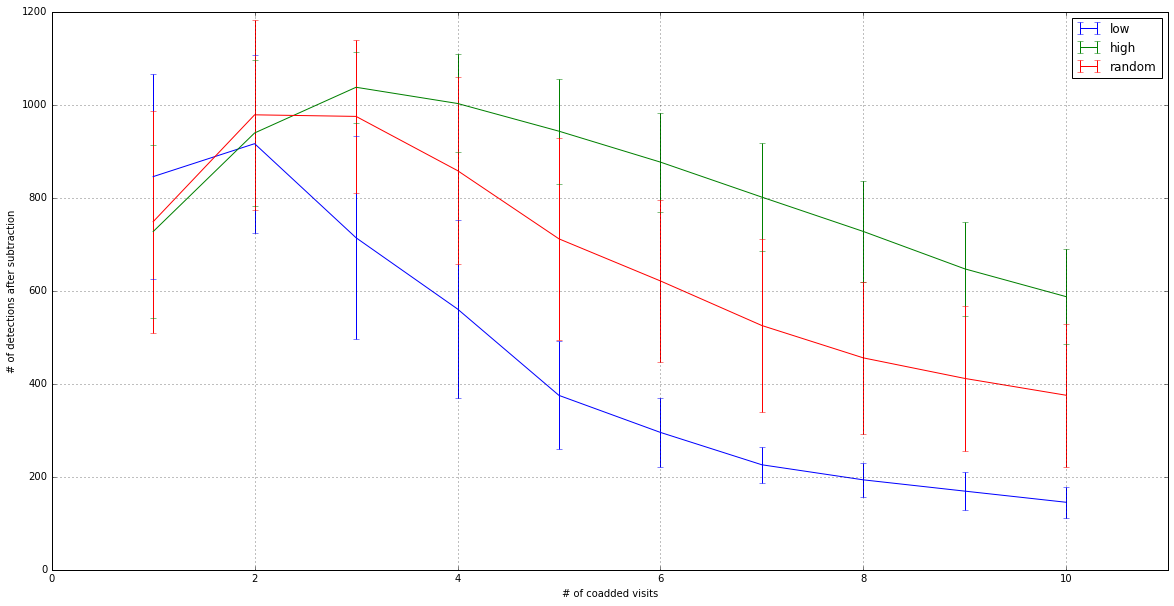

In [38]:
plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[:10], yerr=err[:10], label="low")
plt.errorbar(range(1,11),tot[10:20], yerr=err[10:20], label="high")
plt.errorbar(range(1,11),tot[20:], yerr=err[20:], label="random")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.grid()
plt.show()


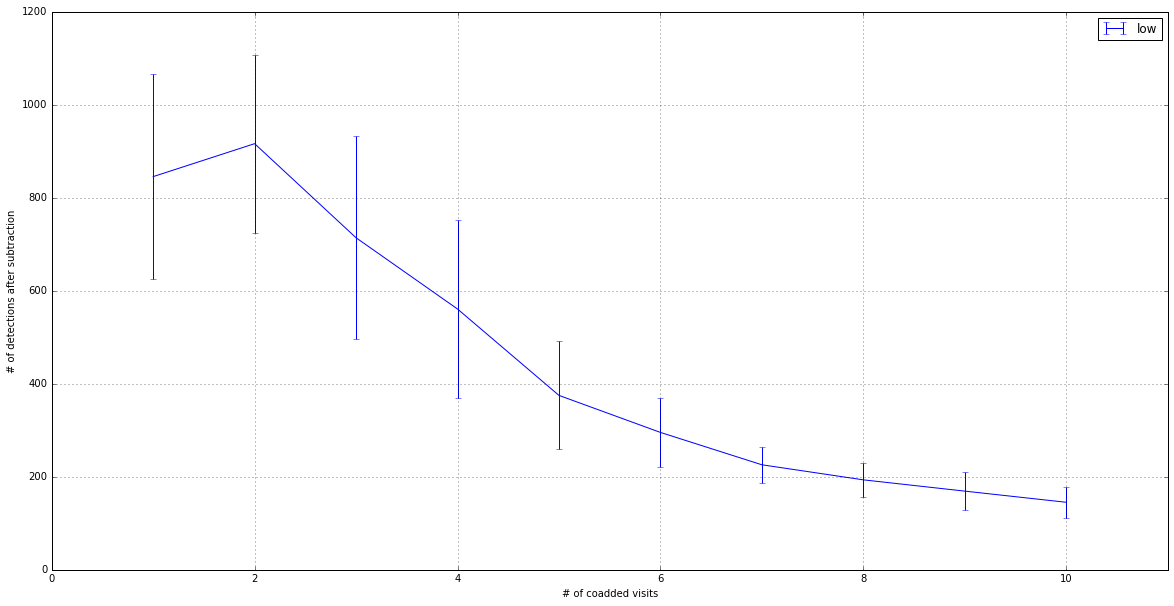

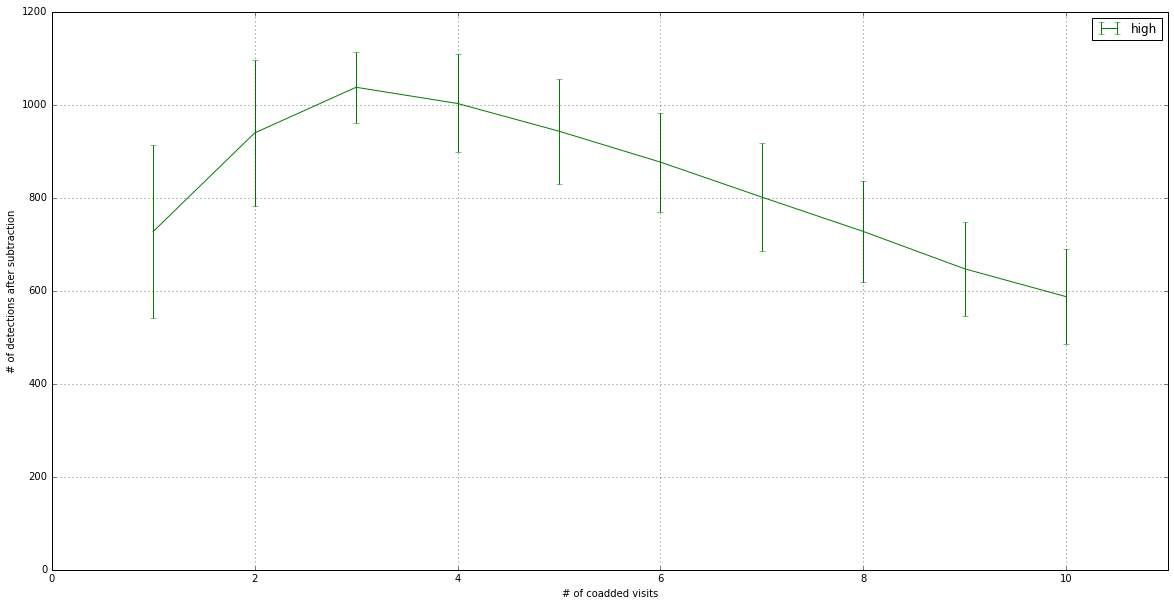

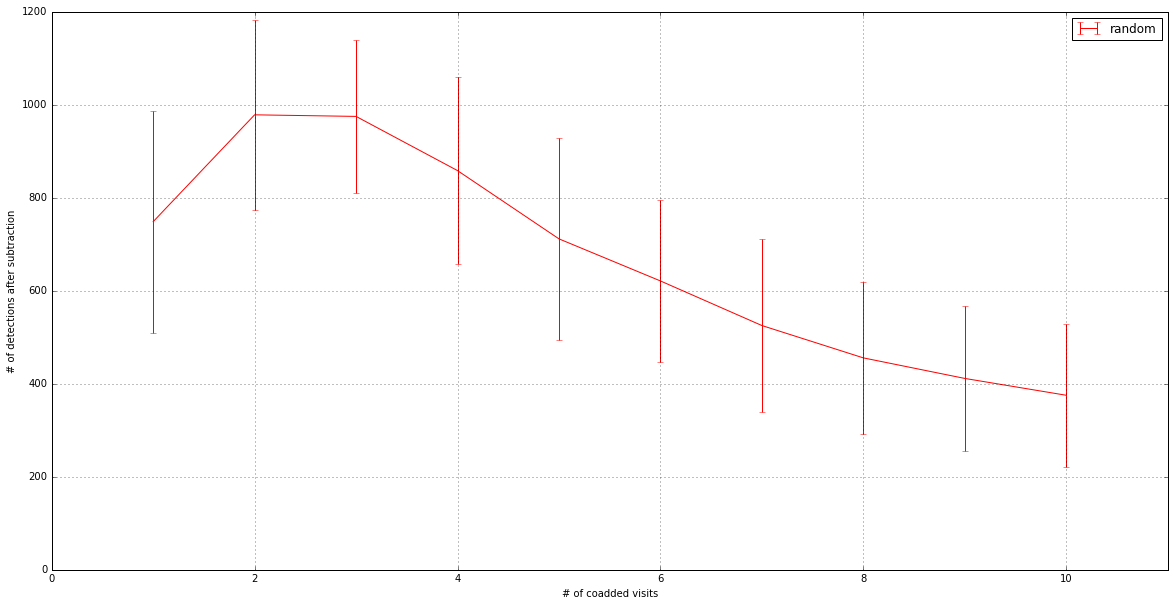

In [39]:
plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[:10], yerr=err[:10], label="low")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.ylim(ymin=0, ymax=1200)
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[10:20], yerr=err[10:20], c="green", label="high")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.ylim(ymin=0, ymax=1200)
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[20:], yerr=err[20:], c="red", label="random")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.ylim(ymin=0, ymax=1200)
plt.grid()
plt.show()

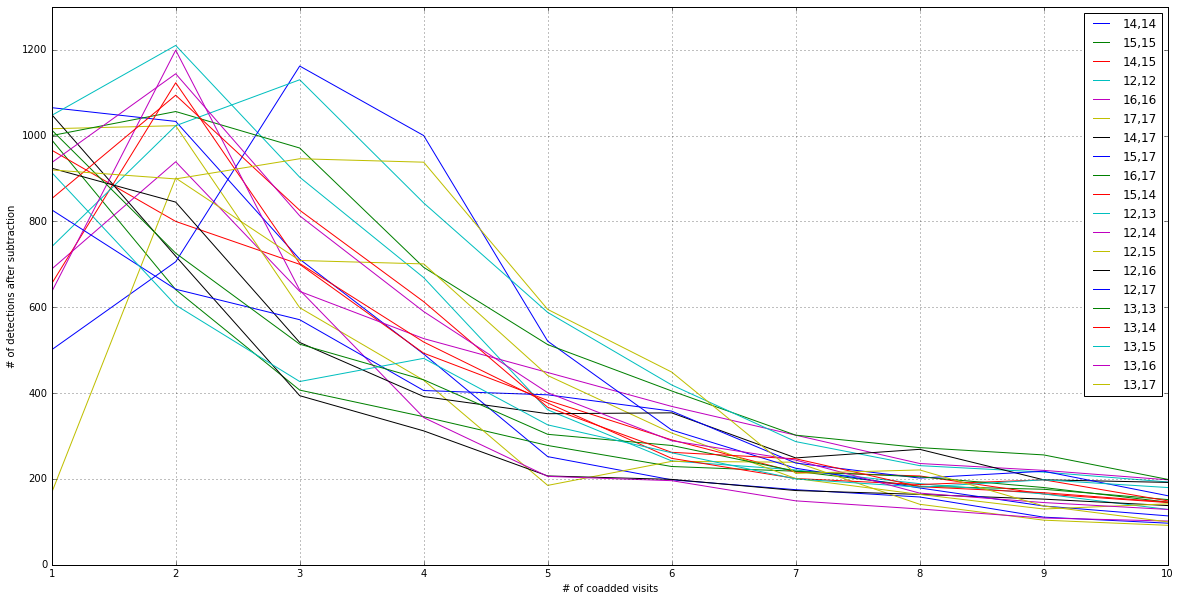

In [40]:

plt.figure(figsize=(20,10))
for i, gl in enumerate(global_lens):
    plt.plot(range(1,11),gl[:10], label=patches[i])
    
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0, ymax=1300)
plt.grid()
plt.show()

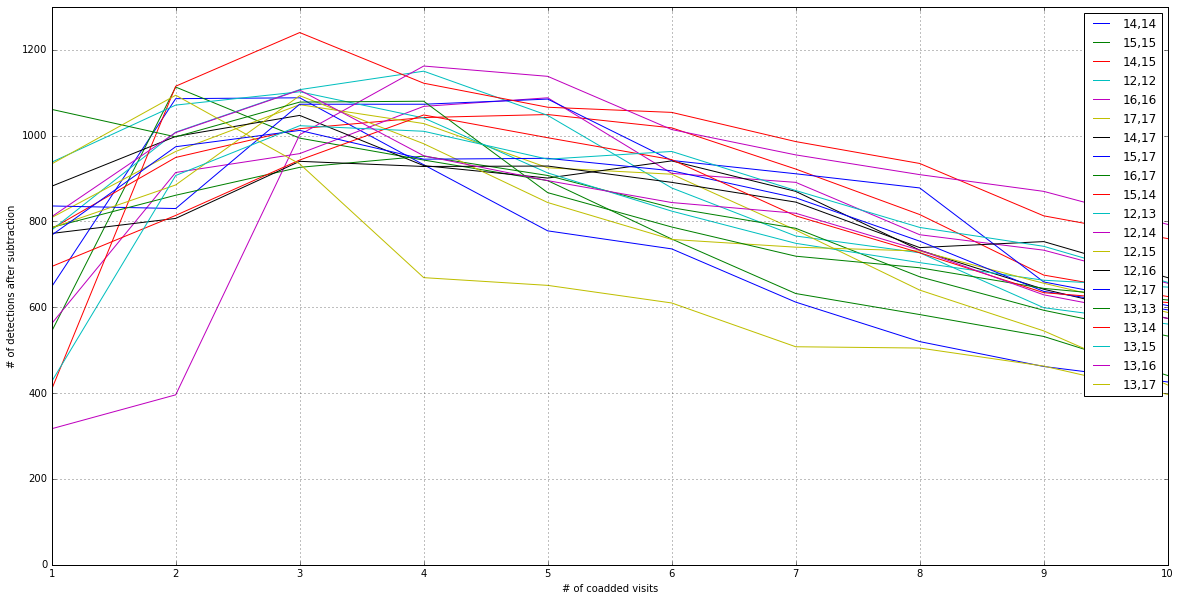

In [41]:
plt.figure(figsize=(20,10))
for i, gl in enumerate(global_lens):
    plt.plot(range(1,11),gl[10:20], label=patches[i])
    
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0, ymax=1300)
plt.grid()
plt.show()

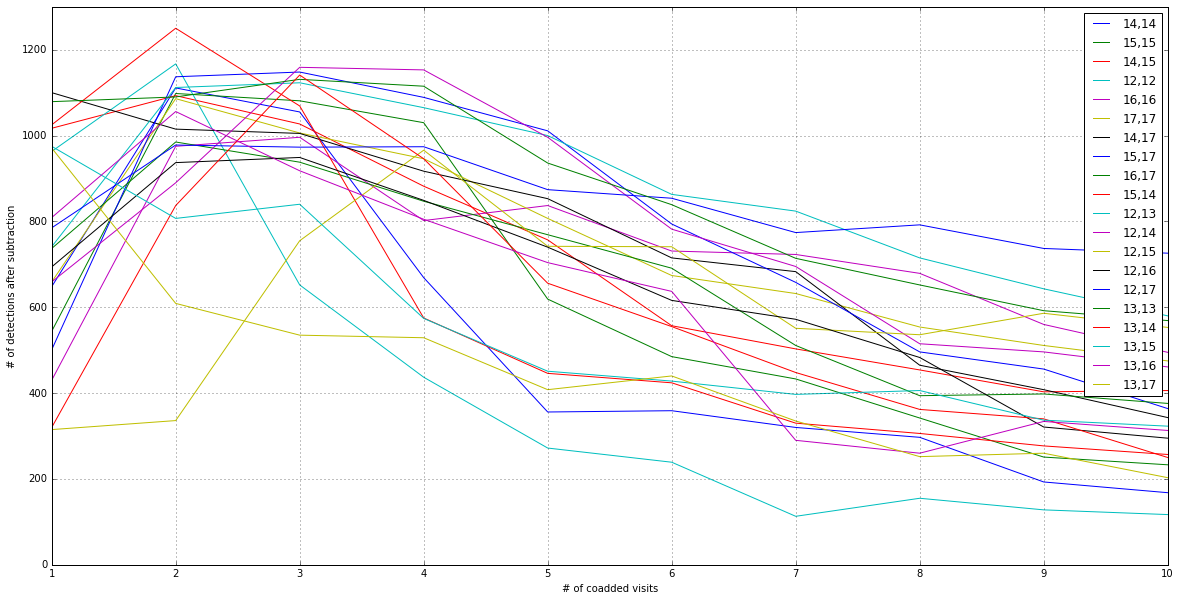

In [42]:
plt.figure(figsize=(20,10))
for i, gl in enumerate(global_lens):
    plt.plot(range(1,11),gl[20:], label=patches[i])
    
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0, ymax=1300)
plt.grid()
plt.show()